 # 1. EXPLORATION & TRAITEMENT DES DONNEES

## 1.1. Import des packages et aperçu du Dataset

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('comptage-velo-donnees-compteurs_010919_311220.csv', sep =';')
df.head()

Identifiant du compteur                    Nom du compteur  \
0                     NaN  97 avenue Denfert Rochereau SO-NE   
1                     NaN  97 avenue Denfert Rochereau SO-NE   
2                     NaN  97 avenue Denfert Rochereau SO-NE   
3                     NaN  97 avenue Denfert Rochereau SO-NE   
4                     NaN  97 avenue Denfert Rochereau SO-NE   

   Identifiant du site de comptage Nom du site de comptage  Comptage horaire  \
0                              NaN                     NaN               4.0   
1                              NaN                     NaN               0.0   
2                              NaN                     NaN               2.0   
3                              NaN                     NaN               1.0   
4                              NaN                     NaN               1.0   

   Date et heure de comptage Date d'installation du site de comptage  \
0  2019-11-01T03:00:00+01:00                                     NaN   
1  2019-11-01T05:00:00+01:00                                     NaN   
2  2019-11-01T09:00:00+01:00                                     NaN   
3  2019-11-01T04:00:00+01:00                                     NaN   
4  2019-11-01T07:00:00+01:00                                     NaN   

  Lien vers photo du site de comptage Coordonnées géographiques  
0                                 NaN                       NaN  
1                                 NaN                       NaN  
2                                 NaN                       NaN  
3                                 NaN                       NaN  
4                                 NaN                       NaN

> En amont - code à disposition - nous avons téléchargé les données du 1er oct 2019 au 30 nov 2020. Puis nous avons rajouté sep 2019 - fourni par Yohan - et déc 2020. Soit une prériode de 16 mois : de septembre 2019 à décembre 2020.

In [2]:
df = df.sort_values(by = 'Date et heure de comptage')
df.head(1)

Identifiant du compteur                  Nom du compteur  \
902770            100047544-SC  77 boulevard Richard Lenoir N-S   

        Identifiant du site de comptage          Nom du site de comptage  \
902770                      100047544.0  77 boulevard Richard Lenoir N-S   

        Comptage horaire  Date et heure de comptage  \
902770               0.0  2019-09-01T03:00:00+02:00   

       Date d'installation du site de comptage  \
902770                              2018-12-05   

                      Lien vers photo du site de comptage  \
902770  https://www.eco-visio.net/Photos/100047544/157...   

       Coordonnées géographiques  
902770        48.860852,2.372279

In [3]:
df.tail(1)

Identifiant du compteur              Nom du compteur  \
943306     100042374-109042374  Voie Georges Pompidou SO-NE   

        Identifiant du site de comptage Nom du site de comptage  \
943306                      100042374.0   Voie Georges Pompidou   

        Comptage horaire  Date et heure de comptage  \
943306               1.0  2020-12-31T23:00:00+01:00   

       Date d'installation du site de comptage  \
943306                              2017-12-15   

                      Lien vers photo du site de comptage  \
943306  https://www.eco-visio.net/Photos/100042374/151...   

       Coordonnées géographiques  
943306           48.8484,2.27586

## 1.2. Affichage des informations du Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1002827 entries, 902770 to 943306
Data columns (total 9 columns):
 #   Column                                   Non-Null Count    Dtype  
---  ------                                   --------------    -----  
 0   Identifiant du compteur                  965675 non-null   object 
 1   Nom du compteur                          1002827 non-null  object 
 2   Identifiant du site de comptage          965675 non-null   float64
 3   Nom du site de comptage                  965675 non-null   object 
 4   Comptage horaire                         1002827 non-null  float64
 5   Date et heure de comptage                1002827 non-null  object 
 6   Date d'installation du site de comptage  965675 non-null   object 
 7   Lien vers photo du site de comptage      965675 non-null   object 
 8   Coordonnées géographiques                965675 non-null   object 
dtypes: float64(2), object(7)
memory usage: 76.5+ MB


> Nous nous retrouvons donc avec un fichier de 1 002 827 lignes x 9 colonnes. La variable cible est le comptage horaire. C’est la seule variable numérique continue. 

> Les autres variables sont de 3 natures :
> 1.	Dates
> ‘Date et heure du comptage’, ‘Date d’installation du site de comptage’ : sont ou doivent être de type Date.
> 2.	Coordonnées GPS des sites
 ‘Coordonnées géographiques’ : de type geo_point_2d.
>3.	Identificatrices
‘Identifiant du site’, ‘Identifiant du compteur’, ‘Nom du site’ = ‘Nom du compteur’, ‘Lien vers photo du site de comptage’ : sont ou doivent être des chaines de caractères.

> Conclusion : seules ‘Date et heure du comptage’ et ‘Coordonnées géographiques’ sont véritablement des variables explicatives, respectivement temporelle et géographique.

In [5]:
# Conversion de la variable 'Identifiant du site de comptage' en string
df['Identifiant du site de comptage'] = df['Identifiant du site de comptage'].astype(str)

##Suppression du ".0" à la fin
df["Identifiant du site de comptage"] = df["Identifiant du site de comptage"].str[0:-2]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1002827 entries, 902770 to 943306
Data columns (total 9 columns):
 #   Column                                   Non-Null Count    Dtype  
---  ------                                   --------------    -----  
 0   Identifiant du compteur                  965675 non-null   object 
 1   Nom du compteur                          1002827 non-null  object 
 2   Identifiant du site de comptage          1002827 non-null  object 
 3   Nom du site de comptage                  965675 non-null   object 
 4   Comptage horaire                         1002827 non-null  float64
 5   Date et heure de comptage                1002827 non-null  object 
 6   Date d'installation du site de comptage  965675 non-null   object 
 7   Lien vers photo du site de comptage      965675 non-null   object 
 8   Coordonnées géographiques                965675 non-null   object 
dtypes: float64(1), object(8)
memory usage: 76.5+ MB


## 1.3. Affichage du nombre de valeurs manquantes sur le Dataframe

In [6]:
df.isna().sum()

Identifiant du compteur                    37152
Nom du compteur                                0
Identifiant du site de comptage                0
Nom du site de comptage                    37152
Comptage horaire                               0
Date et heure de comptage                      0
Date d'installation du site de comptage    37152
Lien vers photo du site de comptage        37152
Coordonnées géographiques                  37152
dtype: int64

> Le Dataframe compte un nombre significatif de valeurs manquantes. Les 6 variables concernées ont le même nombre de valeurs manquantes : 37 152 (soit 3,7 %). Il s'agit probablement des mêmes lignes.

## 1.4. Affichage du nombre de doublons

In [7]:
df.duplicated().sum()

0

> Il n'y a pas de doublon dans le DataFrame.

## 1.5. Etendue des valeurs

In [8]:
df.nunique()

Identifiant du compteur                       99
Nom du compteur                              102
Identifiant du site de comptage               70
Nom du site de comptage                       69
Comptage horaire                            1048
Date et heure de comptage                  11705
Date d'installation du site de comptage       34
Lien vers photo du site de comptage           94
Coordonnées géographiques                     69
dtype: int64

> Il y apparemment 99 compteurs sur 70 sites, mais nous n'avons que 69 coordonnées géographiques différentes. 
> Conclusion : nous travaillerons sur ces 69 sites de comptage.

## 1.6. Distribution des valeurs (variable quantitative)

In [9]:
df['Comptage horaire'].describe().round(2)

count    1002827.00
mean          53.33
std           82.92
min            0.00
25%            4.00
50%           22.00
75%           68.00
max         1275.00
Name: Comptage horaire, dtype: float64

> Il semble y avoir des valeurs extrêmes (3e quartile : 68, dernier : 1275), ce qui expliquerait une moyenne à 53.3 pour une médiane à 22. Nous faisons un boxplot par ‘Identifiant de compteur’. 

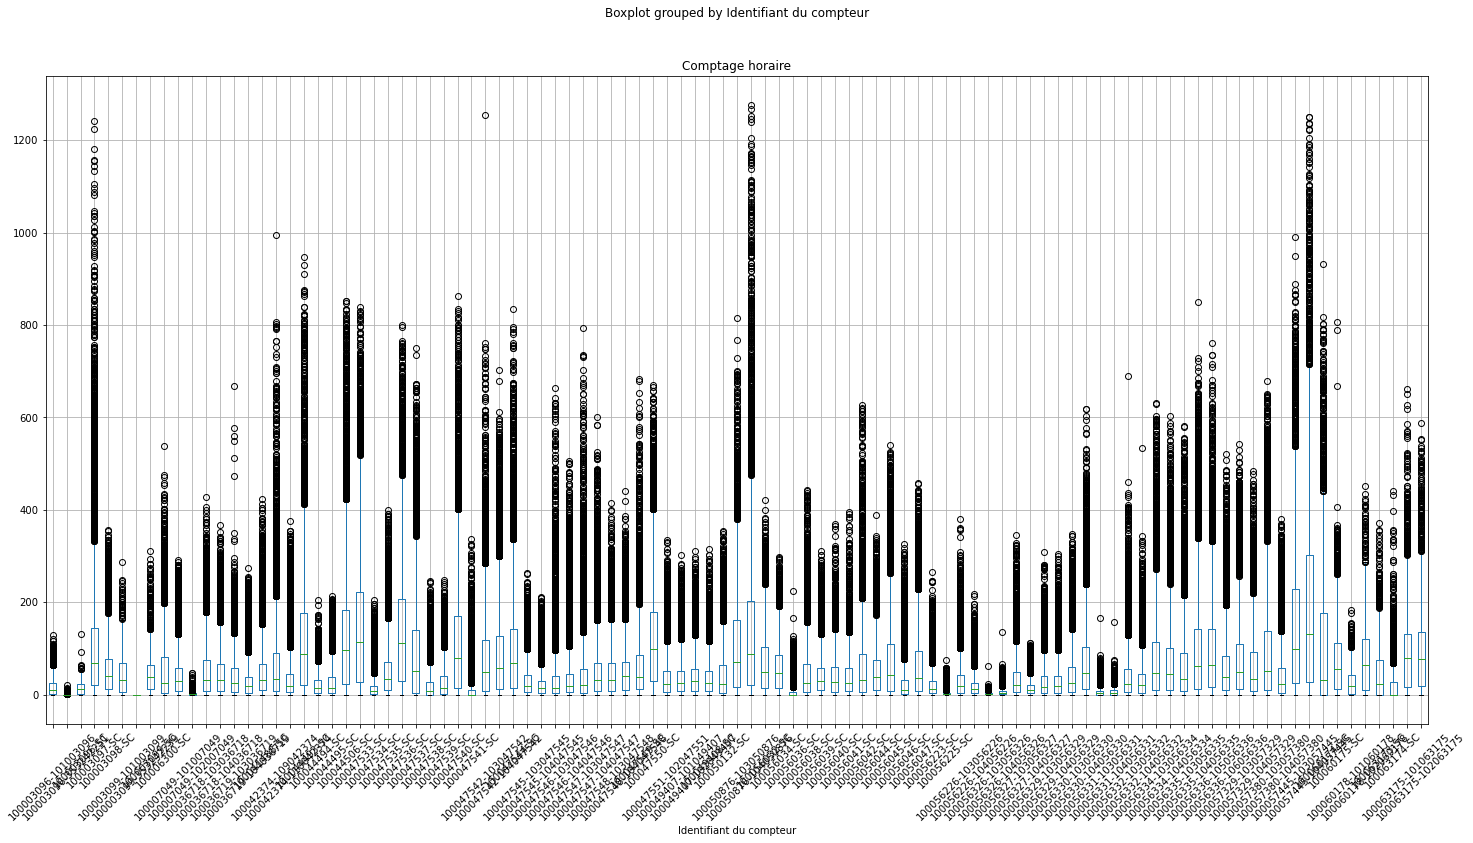

In [10]:
df.boxplot(column = 'Comptage horaire', by = 'Identifiant du compteur', rot = 45, figsize = (24, 12));

> Les valeurs extrêmes sont nombreuses et continues. De plus, un minimum de 0 vélo / heure et un maximum de 1275 (soit 21 vélo / min) ne sont pas aberrants. \
> Conclusion : Nous décidons de tout garder pour ne pas perdre d'information.


## 1.7. Traitement des valeurs manquantes

In [11]:
## Affichage des lignes du df contenant des valeurs manquantes
df_nan = df[df.isna().any(axis = 1) == True]
df_nan.head()

Identifiant du compteur  \
928539                     NaN   
930048                     NaN   
928882                     NaN   
930000                     NaN   
928885                     NaN   

                                       Nom du compteur  \
928539  90 Rue De Sèvres 90 Rue De Sèvres  Vélos NE-SO   
930048  90 Rue De Sèvres 90 Rue De Sèvres  Vélos SO-NE   
928882  90 Rue De Sèvres 90 Rue De Sèvres  Vélos NE-SO   
930000  90 Rue De Sèvres 90 Rue De Sèvres  Vélos SO-NE   
928885  90 Rue De Sèvres 90 Rue De Sèvres  Vélos NE-SO   

       Identifiant du site de comptage Nom du site de comptage  \
928539                               n                     NaN   
930048                               n                     NaN   
928882                               n                     NaN   
930000                               n                     NaN   
928885                               n                     NaN   

        Comptage horaire  Date et heure de comptage  \
928539               0.0  2019-09-01T03:00:00+02:00   
930048               0.0  2019-09-01T03:00:00+02:00   
928882               0.0  2019-09-01T04:00:00+02:00   
930000               0.0  2019-09-01T04:00:00+02:00   
928885               0.0  2019-09-01T05:00:00+02:00   

       Date d'installation du site de comptage  \
928539                                     NaN   
930048                                     NaN   
928882                                     NaN   
930000                                     NaN   
928885                                     NaN   

       Lien vers photo du site de comptage Coordonnées géographiques  
928539                                 NaN                       NaN  
930048                                 NaN                       NaN  
928882                                 NaN                       NaN  
930000                                 NaN                       NaN  
928885                                 NaN                       NaN

In [12]:
## Affichage des informations concernant les lignes du df contenant au moins une valeur manquante
df_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37152 entries, 928539 to 934612
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Identifiant du compteur                  0 non-null      object 
 1   Nom du compteur                          37152 non-null  object 
 2   Identifiant du site de comptage          37152 non-null  object 
 3   Nom du site de comptage                  0 non-null      object 
 4   Comptage horaire                         37152 non-null  float64
 5   Date et heure de comptage                37152 non-null  object 
 6   Date d'installation du site de comptage  0 non-null      object 
 7   Lien vers photo du site de comptage      0 non-null      object 
 8   Coordonnées géographiques                0 non-null      object 
dtypes: float64(1), object(8)
memory usage: 2.8+ MB


> On s'aperçoit que 6 variables sont manquantes sur l'ensemble de ces lignes. Il s'agit de variables qualitatives relatives à l'identification du compteur. Il reste une variable qui nous indique malgré tout de quel compteur il s'agit : la colonne "Nom du Compteur" qui coorespond à son adresse.

In [13]:
## Affichage des valeurs de la colonne "Nom du Compteur" pour les lignes ayant au moins une valeur manquante
df_nan['Nom du compteur'].value_counts()

90 Rue De Sèvres 90 Rue De Sèvres  Vélos SO-NE    9352
90 Rue De Sèvres 90 Rue De Sèvres  Vélos NE-SO    9352
100 rue La Fayette O-E                            9141
97 avenue Denfert Rochereau SO-NE                 9140
100 rue La Fayette O-E 100 rue La Fayette O-E      167
Name: Nom du compteur, dtype: int64

> On s'aperçoit qu'il n'y a que 4 valeurs différentes concernant le nom du compteur pour les lignes ayant des valeurs manquantes. Si d'autres compteurs implantés à la même adresse sont présents dans le reste du dataset, nous pourrions reprendre ces informations d'identification pour remplacer les valeurs manquantes.

In [14]:
# création d'un df qui regroupe les lignes qui n'ont pas de valeurs manquantes
df_not_nan = df[df.isna().any(axis = 1) == False]

# création d'un objet series qui liste les noms de compteurs dans le df créé précédemment
noms_compteurs = df_not_nan['Nom du compteur'].unique()


In [15]:
# Recherche des noms de compteurs sur lesquels on pourrait récupérer les variables manquantes
for nom in noms_compteurs:
    if nom.find('100 rue La Fayette') != -1:
        print(nom)
    if nom.find('97 avenue Denfert Rochereau') != -1:
        print(nom)
    if nom.find('90 Rue De Sèvres') != -1:
        print(nom)

97 avenue Denfert Rochereau SO-NE
100 rue La Fayette O-E
97 avenue Denfert Rochereau SO-NE 97 avenue Denfert Rochereau SO-NE
97 avenue Denfert Rochereau SO-NE 97 avenue Denfert Rochereau SO-NE [Bike]
90 Rue De Sèvres NE-SO
90 Rue De Sèvres SO-NE
100 rue La Fayette O-E 100 rue La Fayette O-E [Bike]
100 rue La Fayette O-E 100 rue La Fayette O-E
100 rue La Fayette O-E 100 rue La Fayette O-E Vélos


> Il existe bien des compteurs dans le dataset avec la même adresse et aucune valeur manquante. Nous pouvons donc récupérer sur ces lignes les informations pour remplacer les valeurs manquantes.

> Pour l'adresse "97 avenue Denfert Rochereau", il existe un nom de compteur identique à celui où nous avons des valeurs manquantes : "97 avenue Denfert Rochereau SO-NE".

> Pour l'adresse "100 rue La Fayette", il existe également un nom de compteur identique à celui où nous avons des valeurs manquantes : "100 rue La Fayette O-E".

> Pour l'adresse "90 Rue De Sèvres", il existe deux noms de compteur quasi identiques à ceux où nous avons des valeurs manquantes : "90 Rue De Sèvres NE-SO" et "90 Rue De Sèvres SO-NE". On peut supposer qu'il sagit des même compteurs.

In [16]:
# affichage des valeurs de remplacement pour l'adresse "97 avenue Denfert Rochereau SO-NE"
val_DR = df_not_nan[df_not_nan['Nom du compteur'] == "97 avenue Denfert Rochereau SO-NE"].head(1)
val_DR

Identifiant du compteur                    Nom du compteur  \
859833            100003096-SC  97 avenue Denfert Rochereau SO-NE   

       Identifiant du site de comptage            Nom du site de comptage  \
859833                       100003096  97 avenue Denfert Rochereau SO-NE   

        Comptage horaire  Date et heure de comptage  \
859833               0.0  2019-09-01T03:00:00+02:00   

       Date d'installation du site de comptage  \
859833                              2012-02-22   

                      Lien vers photo du site de comptage  \
859833  https://www.eco-visio.net/Photos/100003096/157...   

       Coordonnées géographiques  
859833          48.83511,2.33338

In [17]:
# remplacement des valeurs manquantes pour les lignes des compteurs "97 avenue Denfert Rochereau SO-NE"
df.loc[df["Nom du compteur"] == "97 avenue Denfert Rochereau SO-NE", "Identifiant du compteur"] = "100003096-SC"
df.loc[df["Nom du compteur"] == "97 avenue Denfert Rochereau SO-NE", "Identifiant du site de comptage"] = "100003096"
df.loc[df["Nom du compteur"] == "97 avenue Denfert Rochereau SO-NE", "Nom du site de comptage"] = "97 avenue Denfert Rochereau SO-NE"
df.loc[df["Nom du compteur"] == "97 avenue Denfert Rochereau SO-NE", "Date d'installation du site de comptage"] = "2012-02-22"
df.loc[df["Nom du compteur"] == "97 avenue Denfert Rochereau SO-NE", "Lien vers photo du site de comptage"] = "https://www.eco-visio.net/Photos/100003096/15765766519670.jpg"
df.loc[df["Nom du compteur"] == "97 avenue Denfert Rochereau SO-NE", "Coordonnées géographiques"] = "48.83511,2.33338"

In [18]:
# affichage des valeurs de remplacement pour l'adresse "100 rue La Fayette O-E"
val_LF = df_not_nan[df_not_nan['Nom du compteur'] == "100 rue La Fayette O-E"].head(1)
val_LF

Identifiant du compteur         Nom du compteur  \
864215            100003099-SC  100 rue La Fayette O-E   

       Identifiant du site de comptage Nom du site de comptage  \
864215                       100003099  100 rue La Fayette O-E   

        Comptage horaire  Date et heure de comptage  \
864215               7.0  2019-09-01T03:00:00+02:00   

       Date d'installation du site de comptage  \
864215                              2012-02-22   

                      Lien vers photo du site de comptage  \
864215  https://www.eco-visio.net/Photos/100003099/133...   

       Coordonnées géographiques  
864215          48.87746,2.35008

In [19]:
# remplacement des valeurs manquantes pour les lignes des compteurs "100 rue La Fayette O-E"
df.loc[df["Nom du compteur"] == "100 rue La Fayette O-E", "Identifiant du compteur"] = "100003099-SC"
df.loc[df["Nom du compteur"] == "100 rue La Fayette O-E", "Identifiant du site de comptage"] = "100003099"
df.loc[df["Nom du compteur"] == "100 rue La Fayette O-E", "Nom du site de comptage"] = "100 rue La Fayette O-E"
df.loc[df["Nom du compteur"] == "100 rue La Fayette O-E", "Date d'installation du site de comptage"] = "2012-02-22"
df.loc[df["Nom du compteur"] == "100 rue La Fayette O-E", "Lien vers photo du site de comptage"] = "https://www.eco-visio.net/Photos/100003099/13305145634060.jpg"
df.loc[df["Nom du compteur"] == "100 rue La Fayette O-E", "Coordonnées géographiques"] = "48.87746,2.35008"

# remplacement des valeurs manquantes pour les lignes des compteurs "100 rue La Fayette O-E 100 rue La Fayette O-E"
df.loc[df["Nom du compteur"] == "100 rue La Fayette O-E 100 rue La Fayette O-E", "Identifiant du compteur"] = "100003099-SC"
df.loc[df["Nom du compteur"] == "100 rue La Fayette O-E 100 rue La Fayette O-E", "Identifiant du site de comptage"] = "100003099"
df.loc[df["Nom du compteur"] == "100 rue La Fayette O-E 100 rue La Fayette O-E", "Nom du site de comptage"] = "100 rue La Fayette O-E"
df.loc[df["Nom du compteur"] == "100 rue La Fayette O-E 100 rue La Fayette O-E", "Date d'installation du site de comptage"] = "2012-02-22"
df.loc[df["Nom du compteur"] == "100 rue La Fayette O-E 100 rue La Fayette O-E", "Lien vers photo du site de comptage"] = "https://www.eco-visio.net/Photos/100003099/13305145634060.jpg"
df.loc[df["Nom du compteur"] == "100 rue La Fayette O-E 100 rue La Fayette O-E", "Coordonnées géographiques"] = "48.87746,2.35008"

In [20]:
# affichage des valeurs de remplacement pour l'adresse "90 Rue De Sèvres NE-SO"
val_Sev_EO = df_not_nan[df_not_nan['Nom du compteur'] == "90 Rue De Sèvres NE-SO"].head(1)
val_Sev_EO

Identifiant du compteur         Nom du compteur  \
843586     100060178-102060178  90 Rue De Sèvres NE-SO   

       Identifiant du site de comptage Nom du site de comptage  \
843586                       100060178        90 Rue De Sèvres   

        Comptage horaire  Date et heure de comptage  \
843586              88.0  2020-09-24T23:00:00+02:00   

       Date d'installation du site de comptage  \
843586                              2020-07-22   

                      Lien vers photo du site de comptage  \
843586  https://www.eco-visio.net/Photos/100060178/159...   

       Coordonnées géographiques  
843586          48.84638,2.31529

In [21]:
# remplacement des valeurs manquantes pour les lignes des compteurs "90 Rue De Sèvres 90 Rue De Sèvres  Vélos NE-SO"
df.loc[(df["Nom du compteur"] == "90 Rue De Sèvres 90 Rue De Sèvres  Vélos NE-SO"), "Identifiant du compteur"] = "100060178-102060178"
df.loc[(df["Nom du compteur"] == "90 Rue De Sèvres 90 Rue De Sèvres  Vélos NE-SO"), "Identifiant du site de comptage"] = "100060178"
df.loc[(df["Nom du compteur"] == "90 Rue De Sèvres 90 Rue De Sèvres  Vélos NE-SO"), "Nom du site de comptage"] = "90 Rue De Sèvres"
df.loc[(df["Nom du compteur"] == "90 Rue De Sèvres 90 Rue De Sèvres  Vélos NE-SO"), "Date d'installation du site de comptage"] = "2020-07-22"
df.loc[(df["Nom du compteur"] == "90 Rue De Sèvres 90 Rue De Sèvres  Vélos NE-SO"), "Lien vers photo du site de comptage"] = "https://www.eco-visio.net/Photos/100060178/15953475589600.jpg"
df.loc[(df["Nom du compteur"] == "90 Rue De Sèvres 90 Rue De Sèvres  Vélos NE-SO"), "Coordonnées géographiques"] = "48.84638,2.31529"

In [22]:
# affichage des valeurs de remplacement pour l'adresse "90 Rue De Sèvres SO-NE"
val_Sev_OE = df_not_nan[df_not_nan['Nom du compteur'] == "90 Rue De Sèvres SO-NE"].head(1)
val_Sev_OE

Identifiant du compteur         Nom du compteur  \
845208     100060178-101060178  90 Rue De Sèvres SO-NE   

       Identifiant du site de comptage Nom du site de comptage  \
845208                       100060178        90 Rue De Sèvres   

        Comptage horaire  Date et heure de comptage  \
845208               7.0  2020-09-24T23:00:00+02:00   

       Date d'installation du site de comptage  \
845208                              2020-07-22   

                      Lien vers photo du site de comptage  \
845208  https://www.eco-visio.net/Photos/100060178/159...   

       Coordonnées géographiques  
845208          48.84638,2.31529

In [23]:
# remplacement des valeurs manquantes pour les lignes des compteurs "90 Rue De Sèvres 90 Rue De Sèvres  Vélos SO-NE"
df.loc[(df["Nom du compteur"] == "90 Rue De Sèvres 90 Rue De Sèvres  Vélos SO-NE"), "Identifiant du compteur"] = "100060178-101060178"
df.loc[(df["Nom du compteur"] == "90 Rue De Sèvres 90 Rue De Sèvres  Vélos SO-NE"), "Identifiant du site de comptage"] = "100060178"
df.loc[(df["Nom du compteur"] == "90 Rue De Sèvres 90 Rue De Sèvres  Vélos SO-NE"), "Nom du site de comptage"] = "90 Rue De Sèvres"
df.loc[(df["Nom du compteur"] == "90 Rue De Sèvres 90 Rue De Sèvres  Vélos SO-NE"), "Date d'installation du site de comptage"] = "2020-07-22"
df.loc[(df["Nom du compteur"] == "90 Rue De Sèvres 90 Rue De Sèvres  Vélos SO-NE"), "Lien vers photo du site de comptage"] = "https://www.eco-visio.net/Photos/100060178/15953475589600.jpg"
df.loc[(df["Nom du compteur"] == "90 Rue De Sèvres 90 Rue De Sèvres  Vélos SO-NE"), "Coordonnées géographiques"] = "48.84638,2.31529"

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1002827 entries, 902770 to 943306
Data columns (total 9 columns):
 #   Column                                   Non-Null Count    Dtype  
---  ------                                   --------------    -----  
 0   Identifiant du compteur                  1002827 non-null  object 
 1   Nom du compteur                          1002827 non-null  object 
 2   Identifiant du site de comptage          1002827 non-null  object 
 3   Nom du site de comptage                  1002827 non-null  object 
 4   Comptage horaire                         1002827 non-null  float64
 5   Date et heure de comptage                1002827 non-null  object 
 6   Date d'installation du site de comptage  1002827 non-null  object 
 7   Lien vers photo du site de comptage      1002827 non-null  object 
 8   Coordonnées géographiques                1002827 non-null  object 
dtypes: float64(1), object(8)
memory usage: 76.5+ MB


In [25]:
df.isna().sum()

Identifiant du compteur                    0
Nom du compteur                            0
Identifiant du site de comptage            0
Nom du site de comptage                    0
Comptage horaire                           0
Date et heure de comptage                  0
Date d'installation du site de comptage    0
Lien vers photo du site de comptage        0
Coordonnées géographiques                  0
dtype: int64

> Conclusion : il n'y a désormais plus de valeurs manquantes dans le DataFrame.

In [26]:
df.duplicated().sum()

0

> Le remplacement des valeurs manquantes n'a pas créé de doublons

## 1.8. Traitement de la variable 'Date et heure de comptage'

In [27]:
df.head()

Identifiant du compteur                    Nom du compteur  \
902770            100047544-SC    77 boulevard Richard Lenoir N-S   
921873     100049407-101049407  152 boulevard du Montparnasse O-E   
890513            100047536-SC     102 boulevard de Magenta SE-NO   
885231            100044506-SC        72 boulevard Voltaire NO-SE   
878825     100042374-109042374        Voie Georges Pompidou SO-NE   

       Identifiant du site de comptage          Nom du site de comptage  \
902770                       100047544  77 boulevard Richard Lenoir N-S   
921873                       100049407    152 boulevard du Montparnasse   
890513                       100047536   102 boulevard de Magenta SE-NO   
885231                       100044506      72 boulevard Voltaire NO-SE   
878825                       100042374            Voie Georges Pompidou   

        Comptage horaire  Date et heure de comptage  \
902770               0.0  2019-09-01T03:00:00+02:00   
921873               2.0  2019-09-01T03:00:00+02:00   
890513              29.0  2019-09-01T03:00:00+02:00   
885231              28.0  2019-09-01T03:00:00+02:00   
878825               5.0  2019-09-01T03:00:00+02:00   

       Date d'installation du site de comptage  \
902770                              2018-12-05   
921873                              2018-12-07   
890513                              2018-11-29   
885231                              2018-06-27   
878825                              2017-12-15   

                      Lien vers photo du site de comptage  \
902770  https://www.eco-visio.net/Photos/100047544/157...   
921873  https://www.eco-visio.net/Photos/100049407/154...   
890513  https://www.eco-visio.net/Photos/100047536/157...   
885231  https://www.eco-visio.net/Photos/100044506/153...   
878825  https://www.eco-visio.net/Photos/100042374/151...   

       Coordonnées géographiques  
902770        48.860852,2.372279  
921873        48.840801,2.333233  
890513        48.877726,2.354926  
885231          48.86155,2.37407  
878825           48.8484,2.27586

### Conversion en datetime et création des colonnes 'Année', 'Mois', 'Jour', 'Semaine', 'Jour de la semaine' et 'Heure'

In [28]:
df["date_comptage"] = df["Date et heure de comptage"].str[:10]
df["heure_comptage"] = df["Date et heure de comptage"].str[11:19]
df["Date et heure de comptage"] = df["date_comptage"] + " " + df["heure_comptage"]                                                   
df["Date et heure de comptage"] = pd.to_datetime(df["Date et heure de comptage"])
    
df['Date'] = df['Date et heure de comptage'].dt.date
df['Année'] = df['Date et heure de comptage'].dt.year
df['Mois'] = df['Date et heure de comptage'].dt.month
df['Jour'] = df['Date et heure de comptage'].dt.day
df['Semaine'] = df['Date et heure de comptage'].dt.week
df['Jour_de_la_semaine'] = df['Date et heure de comptage'].dt.weekday
df['Heure'] = df['Date et heure de comptage'].dt.hour

df = df.drop(columns = ["date_comptage", "heure_comptage"])

df.head()

<ipython-input-28-48fa2d30c9dd>:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['Semaine'] = df['Date et heure de comptage'].dt.week


Identifiant du compteur                    Nom du compteur  \
902770            100047544-SC    77 boulevard Richard Lenoir N-S   
921873     100049407-101049407  152 boulevard du Montparnasse O-E   
890513            100047536-SC     102 boulevard de Magenta SE-NO   
885231            100044506-SC        72 boulevard Voltaire NO-SE   
878825     100042374-109042374        Voie Georges Pompidou SO-NE   

       Identifiant du site de comptage          Nom du site de comptage  \
902770                       100047544  77 boulevard Richard Lenoir N-S   
921873                       100049407    152 boulevard du Montparnasse   
890513                       100047536   102 boulevard de Magenta SE-NO   
885231                       100044506      72 boulevard Voltaire NO-SE   
878825                       100042374            Voie Georges Pompidou   

        Comptage horaire Date et heure de comptage  \
902770               0.0       2019-09-01 03:00:00   
921873               2.0       2019-09-01 03:00:00   
890513              29.0       2019-09-01 03:00:00   
885231              28.0       2019-09-01 03:00:00   
878825               5.0       2019-09-01 03:00:00   

       Date d'installation du site de comptage  \
902770                              2018-12-05   
921873                              2018-12-07   
890513                              2018-11-29   
885231                              2018-06-27   
878825                              2017-12-15   

                      Lien vers photo du site de comptage  \
902770  https://www.eco-visio.net/Photos/100047544/157...   
921873  https://www.eco-visio.net/Photos/100049407/154...   
890513  https://www.eco-visio.net/Photos/100047536/157...   
885231  https://www.eco-visio.net/Photos/100044506/153...   
878825  https://www.eco-visio.net/Photos/100042374/151...   

       Coordonnées géographiques        Date  Année  Mois  Jour  Semaine  \
902770        48.860852,2.372279  2019-09-01   2019     9     1       35   
921873        48.840801,2.333233  2019-09-01   2019     9     1       35   
890513        48.877726,2.354926  2019-09-01   2019     9     1       35   
885231          48.86155,2.37407  2019-09-01   2019     9     1       35   
878825           48.8484,2.27586  2019-09-01   2019     9     1       35   

        Jour_de_la_semaine  Heure  
902770                   6      3  
921873                   6      3  
890513                   6      3  
885231                   6      3  
878825                   6      3

## 1.9. Dépendances statistiques entre les varaibles

> Dans ce dataset, il n'y a pas de relations de dépendance à explorer entre les variables explicatives. En revanche, on peut étudier les relations de dépendance entre le trafic (Comptage horaire = variable cible) et certaines variables catégorielles : le mois, le jour de la semaine, l'heure et le lieu (Coordonnées géographiques). On se doute déjà qu'elles sont fortement corrélées.

### Test ANOVA entre la variable cible et les variables catégorielles

In [29]:
# ANOVA entre le trafic (Comptage horaire) et le mois

df = df.rename({'Comptage horaire' : 'Comptage_horaire'}, axis = 1)

import statsmodels.api 
result = statsmodels.formula.api.ols('Comptage_horaire ~ Mois', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table

# La p-value (PR(>F)) est inférieure à 5%, donc on rejette l'hypothèse selon laquelle
# le mois n'influe pas sur le trafic.

df        sum_sq       mean_sq            F  PR(>F)
Mois            1.0  1.022186e+07  1.022186e+07  1489.032571     0.0
Residual  1002825.0  6.884157e+09  6.864764e+03          NaN     NaN

In [30]:
# ANOVA entre le trafic (Comptage horaire) et le jour de la semaine
df = df.rename({'Comptage horaire' : 'Comptage_horaire'}, axis = 1)
import statsmodels.api 
result = statsmodels.formula.api.ols('Comptage_horaire ~ Jour_de_la_semaine', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table

# La p-value (PR(>F)) est inférieure à 5%, donc on rejette l'hypothèse selon laquelle
# le jour de la semaine n'influe pas sur le trafic.

df        sum_sq       mean_sq            F  PR(>F)
Jour_de_la_semaine        1.0  4.811243e+07  4.811243e+07  7047.395773     0.0
Residual            1002825.0  6.846266e+09  6.826980e+03          NaN     NaN

In [31]:
# ANOVA entre le trafic (Comptage horaire) et l'heure

import statsmodels.api 
result = statsmodels.formula.api.ols('Comptage_horaire ~ Heure', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table

# La p-value (PR(>F)) est inférieure à 5%, donc on rejette l'hypothèse selon laquelle
# l'heure n'influe pas sur le trafic.

df        sum_sq       mean_sq            F  PR(>F)
Heure           1.0  4.314261e+08  4.314261e+08  66942.29702     0.0
Residual  1002825.0  6.462952e+09  6.444746e+03          NaN     NaN

In [32]:
# ANOVA entre le trafic (Comptage horaire) et le lieu

df = df.rename({'Coordonnées géographiques' : 'Coordonnées_géographiques'}, axis = 1)

import statsmodels.api 
result = statsmodels.formula.api.ols('Comptage_horaire ~ Coordonnées_géographiques', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table

df = df.rename({'Comptage_horaire' : 'Comptage horaire'}, axis = 1)
df = df.rename({'Coordonnées_géographiques' : 'Coordonnées géographiques'}, axis = 1)
# La p-value (PR(>F)) est inférieure à 5%, donc on rejette l'hypothèse selon laquelle
# le lieu n'influe pas sur le trafic.

> Conclusion : Toutes les p_values sont égales à zéro. Probablement parce que les variables choisies, temporelles et géographiques, sont extrêmement liées à la cible.

## 1.10. Ajout de variables extérieures

In [33]:
# la colonne Date est de type str, on la transforme en type DateTime.
df['Date'] = pd.to_datetime(df['Date'])
# pour manipuler plus facilement les dates, on passe la colonne Date en index
df = df.set_index(['Date'])

### 1.10.1. 'Grève'

In [34]:
# on crée la variable Grève, remplie de 0 (= pas de grève)
df['Grève'] = 0
# pour la période du 05/12/2019 au 10/01/2020, on remplace par 1(= grève)
df.loc['2019-12-05':'2020-01-19', 'Grève'] = 1

### 1.10.2.'Covid'

In [35]:
#on crée la variable 'Covid', remplie de 0 (= pas de pandémie)
df['Covid'] = 0
# pour la période du 17/03/2020 (1er jour du 1er confinement) au 31/12/2020 (fin de notre df),
# on remplace par 1(= pandémie)
df.loc['2020-03-17':'2020-12-31', 'Covid'] = 1

### 1.10.3. 'Confinement'

In [36]:
# on crée la variable Confinement, remplie de 0 (= pas de confinement)
df['Confinement'] = 0
# pour la période du 17/03/2020 au 10/05/2020, on remplace par 1(= 1er confinement)
df.loc['2020-03-17':'2020-05-10', 'Confinement'] = 1
# pour la période du 30/10/2020 au 15/12/2020, on remplace par 2(= 2e confinement)
df.loc['2020-10-30':'2020-12-15', 'Confinement'] = 2

### 1.10.4. 'Jours fériés'

In [37]:
# on crée la variable Jour_férié, remplie de 0 (= pas un jour férié)
df['Jour_férié'] = 0
# pour chaque jour férié, on remplace par 1(= jour férié)
df.loc['2019-11-01', 'Jour_férié'] = 1
df.loc['2019-11-11', 'Jour_férié'] = 1
df.loc['2019-12-25', 'Jour_férié'] = 1
df.loc['2020-01-01', 'Jour_férié'] = 1
df.loc['2020-04-13', 'Jour_férié'] = 1
df.loc['2020-05-01', 'Jour_férié'] = 1
df.loc['2020-05-08', 'Jour_férié'] = 1
df.loc['2020-05-21', 'Jour_férié'] = 1
df.loc['2020-06-01', 'Jour_férié'] = 1
df.loc['2020-07-14', 'Jour_férié'] = 1
df.loc['2020-08-15', 'Jour_férié'] = 1
df.loc['2020-11-01', 'Jour_férié'] = 1
df.loc['2020-11-11', 'Jour_férié'] = 1
df.loc['2020-12-25', 'Jour_férié'] = 1

### 1.10.5. 'Vacances'

In [38]:
# on crée la variable Vacances, remplie de 0 (= pas un jour de vacances)
df['Vacances'] = 0
# pour chaque vacances, on remplace par 1(= vacances)
df.loc['2019-10-19':'2019-11-03', 'Vacances'] = 1
df.loc['2019-12-21':'2020-01-05', 'Vacances'] = 1
df.loc['2020-10-19':'2020-11-03', 'Vacances'] = 1
df.loc['2020-02-08':'2020-02-23', 'Vacances'] = 1
df.loc['2020-04-04':'2020-04-19', 'Vacances'] = 1
df.loc['2020-05-21':'2020-05-24', 'Vacances'] = 1
df.loc['2020-07-04':'2020-08-31', 'Vacances'] = 1
df.loc['2020-10-17':'2020-11-01', 'Vacances'] = 1
df.loc['2020-12-19':'2020-12-31', 'Vacances'] = 1

In [39]:
# puis on crée des variables pour chaque type de vacances :
df['vac_noel'] = 0
df.loc['2019-12-21':'2020-01-05', 'vac_noel'] = 1
df.loc['2020-12-19':'2020-12-31', 'vac_noel'] = 1

df['vac_fevrier'] = 0
df.loc['2020-02-08':'2020-02-23', 'vac_fevrier'] = 1

df['vac_printemps'] = 0
df.loc['2020-04-04':'2020-04-19', 'vac_printemps'] = 1 

df['vac_ascension'] = 0
df.loc['2020-05-21':'2020-05-24', 'vac_ascension'] = 1

df['vac_juillet'] = 0
df.loc['2020-07-04':'2020-07-31', 'vac_juillet'] = 1

df['vac_aout'] = 0
df.loc['2020-08-01':'2020-08-31', 'vac_aout'] = 1

df['vac_toussaint'] = 0
df.loc['2020-10-17':'2020-11-01', 'vac_toussaint'] = 1

In [40]:
# Vérifications 
#df.loc['2020-01-01'] # Grève : 1, Covid : 0, Confinement : 0, Jour_férié : 1, Vancances : 1
#df.loc['2020-04-12'] # Grève : 0, Covid : 1, Confinement : 1, Jour_férié : 0, Vancances : 1
#df.loc['2020-11-15'] # Grève : 0, Covid : 1, Confinement : 2, Jour_férié : 0, Vancances : 0

### 1.10.6.  'Pluie'

In [41]:
#PLUIE

# on crée la variable Pluie remplie de 0 
df['Pluie'] = 0

# 0 pour les jours avec pas ou peu de pluie (< 10 mm/jour)
# 1 pour les jours de pluie modérée (entre 10 et 15 mm/jour)
# 2 pour les jours avec fortes pluies / orages (> 15 mm/jour)
df.loc['2020-01-27', 'Pluie'] = 1
df.loc['2020-01-28', 'Pluie'] = 1
df.loc['2020-02-01', 'Pluie'] = 2
df.loc['2020-02-02', 'Pluie'] = 2
df.loc['2020-02-03', 'Pluie'] = 1
df.loc['2020-02-04', 'Pluie'] = 1
df.loc['2020-02-10', 'Pluie'] = 1
df.loc['2020-02-11', 'Pluie'] = 1
df.loc['2020-02-13', 'Pluie'] = 1
df.loc['2020-02-26', 'Pluie'] = 1
df.loc['2020-02-27', 'Pluie'] = 1
df.loc['2020-03-01', 'Pluie'] = 2
df.loc['2020-03-02', 'Pluie'] = 1
df.loc['2020-03-05', 'Pluie'] = 2
df.loc['2020-05-05', 'Pluie'] = 1
df.loc['2020-08-30', 'Pluie'] = 2
df.loc['2020-09-27', 'Pluie'] = 2
df.loc['2020-10-01', 'Pluie'] = 2
df.loc['2020-10-02', 'Pluie'] = 2
df.loc['2020-10-05', 'Pluie'] = 2
df.loc['2020-10-25', 'Pluie'] = 1

In [42]:
df.loc['2020-12-03', 'Pluie'] = 1
df.loc['2020-12-21', 'Pluie'] = 1
df.loc['2020-12-22', 'Pluie'] = 2
df.loc['2020-12-27', 'Pluie'] = 1
df.loc['2020-12-28', 'Pluie'] = 2

> Remarque : nous n’avons pas trouvé de base de données libre de droits reprenant les conditions météo à Paris pour notre période. D’où le choix de ces indicateurs, renseignés à la main. Idem pour les températures : nous ne focalisons que sur les extrêmes. Quand il fait très froid pour Paris (< 4°) ou très chaud (> 23°).

### 1.10.7.  'Froid'

In [43]:
# On crée la variable Froid, remplie de 0 
df['Froid'] = 0

# 1 pour les journées où la température moyenne est sous les 4 degrés
df.loc['2020-01-01', 'Froid'] = 1
df.loc['2020-01-06', 'Froid'] = 1
df.loc['2020-01-19':'2020-01-25', 'Froid'] = 1
df.loc['2020-02-13', 'Froid'] = 1
df.loc['2020-02-28', 'Froid'] = 1
df.loc['2020-03-01', 'Froid'] = 1
df.loc['2020-03-03', 'Froid'] = 1
df.loc['2020-03-23', 'Froid'] = 1
df.loc['2020-03-30', 'Froid'] = 1
df.loc['2020-03-31', 'Froid'] = 1
df.loc['2020-10-27', 'Froid'] = 1
df.loc['2020-11-30', 'Froid'] = 1

In [44]:
df.loc['2020-12-08', 'Froid'] = 1
df.loc['2020-12-09', 'Froid'] = 1
df.loc['2020-12-10', 'Froid'] = 1
df.loc['2020-12-13', 'Froid'] = 1
df.loc['2020-12-25', 'Froid'] = 1
df.loc['2020-12-26', 'Froid'] = 1
df.loc['2020-12-28':'2020-12-31', 'Froid'] = 1

### 1.10.8.  'Chaud'

In [45]:
# On crée la variable Chaud, remplie de 0 
df['Chaud'] = 0

# 1 pour les journées où la température moyenne est supérieure à 23 degres et avec du soleil 
df.loc['2019-10-19':'2019-11-03', 'Chaud'] = 1

df.loc['2020-04-23', 'Chaud'] = 1
df.loc['2020-04-26', 'Chaud'] = 1
df.loc['2020-05-20', 'Chaud'] = 1
df.loc['2020-06-01':'2020-06-02', 'Chaud'] = 1
df.loc['2020-06-22':'2020-06-26', 'Chaud'] = 1
df.loc['2020-07-07':'2020-07-09', 'Chaud'] = 1
df.loc['2020-07-12', 'Chaud'] = 1
df.loc['2020-07-13', 'Chaud'] = 1
df.loc['2020-07-20', 'Chaud'] = 1
df.loc['2020-07-21', 'Chaud'] = 1
df.loc['2020-07-23', 'Chaud'] = 1
df.loc['2020-07-27':'2020-07-31', 'Chaud'] = 1
df.loc['2020-08-02', 'Chaud'] = 1
df.loc['2020-08-04':'2020-08-08', 'Chaud'] = 1
df.loc['2020-08-10':'2020-08-11', 'Chaud'] = 1
df.loc['2020-08-15', 'Chaud'] = 1
df.loc['2020-08-18':'2020-08-22', 'Chaud'] = 1
df.loc['2020-08-25', 'Chaud'] = 1
df.loc['2020-08-27', 'Chaud'] = 1
df.loc['2020-09-02', 'Chaud'] = 1
df.loc['2020-09-04', 'Chaud'] = 1
df.loc['2020-09-13':'2020-09-18', 'Chaud'] = 1
df.loc['2020-09-20':'2020-09-22', 'Chaud'] = 1

In [46]:
# on réinitialise l'index
df = df.reset_index()

# 2. DATA VISUALISATION

## 2.1. Cartographie des sites de comptage

In [47]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# Création d'une colonne "lat" et "long" pour séparer la latitude et la longitude dans 2 colonnes différentes
lat_long = df["Coordonnées géographiques"].str.split(",", expand=True)
df["lat"] = lat_long[0].astype('float')
df["long"] = lat_long[1].astype('float')

# conversion du nombre de comptage en "int" pour faciliter la lecture des DataViz'
df["Comptage horaire"] = df["Comptage horaire"].astype(int)

# création d'un nouveau df qui servira à la cartographie
plan_df = df.groupby(['Identifiant du site de comptage', 'Nom du site de comptage', 'long', 'lat', 'Lien vers photo du site de comptage'], as_index = False).agg({'Comptage horaire':'mean'})

# arrondi à l'unité du nombre de comptage moyen pour faciliter l'affichage
plan_df['Comptage horaire'] = plan_df['Comptage horaire'].round(0)
plan_df['Comptage horaire'] = plan_df['Comptage horaire'].astype(int)

In [49]:
# Certains identifiants de comptage apparaissent en double dans leDataFrame plan_df :
plan_df[plan_df["Identifiant du site de comptage"].duplicated() == True]

Identifiant du site de comptage                   Nom du site de comptage  \
1                        100003096         97 avenue Denfert Rochereau SO-NE   
6                        100006300                135 avenue Daumesnil SE-NO   
9                        100036718                  39 quai François Mauriac   
11                       100036719               18 quai de l'hotel de ville   
14                       100042374                     Voie Georges Pompidou   
16                       100044493               67 boulevard Voltaire SE-NO   
19                       100044495         7 avenue de la Grande Armée NO-SE   
21                       100044506               72 boulevard Voltaire NO-SE   
25                       100047535                  Pont du Garigliano NO-SE   
31                       100047540          72 boulevard Richard Lenoir  S-N   
33                       100047541                       Pont National SO-NE   
41                       100047549                      Pont National  NE-SO   
44                       100047551                  Pont du Garigliano SE-NO   
50                       100056032                87 avenue de Flandre NE-SO   
53                       100056036      2 avenue de la Porte de Bagnolet O-E   
62                       100056046                    Pont des Invalides S-N   
65                       100056223                    Pont des Invalides N-S   
67                       100056225        3 avenue de la Porte D'Orléans S-N   
71                       100056327  Face au 4 avenue de la porte de Bagnolet   
73                       100056329                    Pont Charles De Gaulle   
75                       100056330                       36 quai de Grenelle   
77                       100056331                    Face au 40 quai D'Issy   
79                       100056332                             Pont de Bercy   
82                       100056335                              Quai d'Orsay   
92                       100063174                   69 Boulevard Ornano N-S   

        long        lat                Lien vers photo du site de comptage  \
1   2.333380  48.835110  https://www.eco-visio.net/Photos/100003096/Y21...   
6   2.383378  48.843435  https://www.eco-visio.net/Photos/100006300/158...   
9   2.377000  48.834360  https://www.eco-visio.net/Photos/100036718/159...   
11  2.357020  48.853720  https://www.eco-visio.net/Photos/100036719/157...   
14  2.275860  48.848400  https://www.eco-visio.net/Photos/100042374/157...   
16  2.373760  48.861490  https://www.eco-visio.net/Photos/100044493/157...   
19  2.292150  48.874510  https://www.eco-visio.net/Photos/100044495/157...   
21  2.374070  48.861550  https://www.eco-visio.net/Photos/100044506/159...   
25  2.267330  48.840150  https://www.eco-visio.net/Photos/100047535/159...   
31  2.373050  48.860770  https://www.eco-visio.net/Photos/100047540/159...   
33  2.384090  48.826580  https://www.eco-visio.net/Photos/100047541/159...   
41  2.384650  48.826820  https://www.eco-visio.net/Photos/100047549/159...   
44  2.266940  48.839920  https://www.eco-visio.net/Photos/100047551/159...   
50  2.374720  48.889260  https://www.eco-visio.net/Photos/100056032/157...   
53  2.409320  48.864510  https://www.eco-visio.net/Photos/100056036/159...   
62  2.310610  48.862820  https://www.eco-visio.net/Photos/100056046/157...   
65  2.310345  48.862840  https://www.eco-visio.net/Photos/100056223/157...   
67  2.325370  48.821080  https://www.eco-visio.net/Photos/100056225/157...   
71  2.409690  48.864610  https://www.eco-visio.net/Photos/100056327/157...   
73  2.368110  48.842230  https://www.eco-visio.net/Photos/100056329/159...   
75  2.285080  48.852090  https://www.eco-visio.net/Photos/100056330/159...   
77  2.265420  48.834210  https://www.eco-visio.net/Photos/100056331/157...   
79  2.375870  48.838480  https://www.eco-visio.net/Photos/100056332/159...   
82  2.311790  48.862880  https://www.eco-visio.net

In [50]:
# Les doublons sont générés par les url de photos. Certains identifiants en ont 2 différentes. 

# Remplacement de la 2e url par la 1re :

#liste des identifiants concernés par la modification :
identifiants_doubl = plan_df[plan_df["Identifiant du site de comptage"].duplicated() == True]["Identifiant du site de comptage"].unique()

for i in identifiants_doubl:
    photo1 = plan_df[plan_df["Identifiant du site de comptage"] == i]["Lien vers photo du site de comptage"].unique()[0]
    photo2 = plan_df[plan_df["Identifiant du site de comptage"] == i]["Lien vers photo du site de comptage"].unique()[1]
    plan_df = plan_df.replace(to_replace = photo2, value = photo1)

plan_df = plan_df.groupby(['Identifiant du site de comptage', 'Nom du site de comptage', 'long', 'lat', 'Lien vers photo du site de comptage'], as_index = False).agg({'Comptage horaire':'mean'})

> Pour compléter cette simple observation des différents sites de comptage, nous avons choisi d’y ajouter une classification en testant un modèle de clustering, l’algorithme des k-moyennes (K-Means).  Cette méthode nous permet de regrouper les sites entre eux pour visualiser s’il existe des similitudes entre les différents sites de comptage selon leur position géographique (mesurée par la latitude et la longitude) et le nombre moyen de comptages observés sur la période. Après l’avoir testé avec différents nombres de clusters (argument « n_clusters » de la fonction « kmeans »), l’algorithme semble identifier 3 groupes de sites de comptages selon l’importance du trafic et dans une moindre mesure selon leur situation géographique. Ces 3 groupes sont représentés par 3 couleurs différentes sur la carte.

In [51]:
# Clustering avec le modèle K-Means
from sklearn.cluster import KMeans

#Création d'un DF avec les coordonnées géographiques et le comptage horaire moyen pour chaque site de comptage
df_cluster = df.groupby('Identifiant du site de comptage', as_index = False).agg({'Comptage horaire':'mean',
                                                                                 'lat':'mean',
                                                                                 'long':'mean'})
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_cluster[["Comptage horaire", "lat", "long"]])

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Ajouter les labels au DF "df_cluster"
labels = pd.DataFrame(labels)
df_cluster = df_cluster.join(labels)
df_cluster["groupe"] = df_cluster[0]
df_cluster = df_cluster.drop(0, axis = 1)

# Fusionner le DF "df_cluster" avec le précédent DF servira à la cartographie
plan_df = plan_df.join(df_cluster["groupe"])

In [52]:
# affichage des sites de comptage sur la carte en utilisant la librairie Folium
import folium
carte = folium.Map(location = [48.86, 2.341886], zoom_start = 12, min_zoom=12)

for nom, comptage, latitude, longitude, image, groupe in zip(plan_df["Nom du site de comptage"],
                                                     plan_df["Comptage horaire"],
                                                     plan_df["lat"],
                                                     plan_df["long"],
                                                     plan_df["Lien vers photo du site de comptage"],plan_df["groupe"]):
    if groupe == 0:
        couleur = "#d9152a"
    elif groupe == 1:
        couleur = "#368fe5"
    else:
        couleur = "#129012"
    
    
    pp = "<strong>" + nom + "</strong>" + "<br>Comptage horaire : " + str(comptage) + "<br><img src='" + image + "', width=100%>"
    folium.CircleMarker(location=[latitude, longitude],
                        radius=comptage/10,
                        popup = folium.Popup(pp, max_width = 300),
                        tooltip= "<strong>" + nom + "</strong>",
                        color=couleur,
                        fill_color=couleur,
                        fill_opacity=0.3
                       ).add_to(carte)
carte


>Les sites de comptage sont représentés par les cercles bleus, verts et rouges. Leur taille est proportionnelle à la moyenne des comptages horaires. La répartition des couleurs a été décidée par un  modèle de Clustering.  Il a bien classé les sites de comptage en 3 groupes, selon l’importance du trafic (‘Comptage horaire’).

>Remarques sur la répartition des sites de comptages :\
•	Dans certains cas, où la piste cyclable se situe de part et d'autre d'un boulevard, 2 sites de comptage ont été créés au lieu de 2 compteurs pour un seul site. Nous reprécisons ici que notre analyse portera sur les 69 sites de comptages (à sens unique ou à double sens) et non pas sur chaque compteur.\
•	Points forts : il y en a un peu partout dans Paris. Les quais de Seine et l'axe Nord-Sud (Gare du Nord/Gare de l'Est - Châtelet - Odéon - Alésia) sont particulièrement bien équipés.\
•	Points faibles : à l’échelle de chaque quartier le maillage est faible (3,5 sites par arrondissement).  Certains trajets très empruntés sont peu ou pas couverts, notamment sur les axes Est-Ouest : Porte de Vincennes - Nation - Bastille - Saint-Paul et Porte de Bagnolet - Père-Lachaise - République - Saint-Lazare. 

>Première analyse :\
Trois gros points de passage se dégagent à première vue : l'hyper-centre de Paris, le secteur des gares du Nord et de l'Est, et enfin le 11e arrondissement (Popincourt et Père-Lachaise). Les quais de Seine se démarquent aussi par leur trafic soutenu. Plus on s'éloigne du centre, moins les sites sont fréquentés.

## 2.1.1. Cartographie : différences jour/nuit

In [53]:
#ANALYSE DE JOUR (de 6h à 22h)

jour = df[(df['Heure'] >= 6) & (df['Heure'] < 22)]

# création d'un nouveau df qui servira à la cartographie
plan_df_jour = jour.groupby(['Identifiant du site de comptage', 'Nom du site de comptage', 'long', 'lat', 'Lien vers photo du site de comptage'], as_index = False).agg({'Comptage horaire':'mean'})

# arrondi à l'unité du nombre de comptage moyen pour faciliter l'affichage
plan_df_jour['Comptage horaire'] = plan_df_jour['Comptage horaire'].round(0)
plan_df_jour['Comptage horaire'] = plan_df_jour['Comptage horaire'].astype(int)

In [54]:
# Certains identifiants de comptage apparaissent en double dans leDataFrame plan_df :
plan_df_jour[plan_df_jour["Identifiant du site de comptage"].duplicated() == True]

Identifiant du site de comptage                   Nom du site de comptage  \
1                        100003096         97 avenue Denfert Rochereau SO-NE   
6                        100006300                135 avenue Daumesnil SE-NO   
9                        100036718                  39 quai François Mauriac   
11                       100036719               18 quai de l'hotel de ville   
14                       100042374                     Voie Georges Pompidou   
16                       100044493               67 boulevard Voltaire SE-NO   
19                       100044495         7 avenue de la Grande Armée NO-SE   
21                       100044506               72 boulevard Voltaire NO-SE   
25                       100047535                  Pont du Garigliano NO-SE   
31                       100047540          72 boulevard Richard Lenoir  S-N   
33                       100047541                       Pont National SO-NE   
41                       100047549                      Pont National  NE-SO   
44                       100047551                  Pont du Garigliano SE-NO   
50                       100056032                87 avenue de Flandre NE-SO   
53                       100056036      2 avenue de la Porte de Bagnolet O-E   
62                       100056046                    Pont des Invalides S-N   
65                       100056223                    Pont des Invalides N-S   
67                       100056225        3 avenue de la Porte D'Orléans S-N   
71                       100056327  Face au 4 avenue de la porte de Bagnolet   
73                       100056329                    Pont Charles De Gaulle   
75                       100056330                       36 quai de Grenelle   
77                       100056331                    Face au 40 quai D'Issy   
79                       100056332                             Pont de Bercy   
82                       100056335                              Quai d'Orsay   
92                       100063174                   69 Boulevard Ornano N-S   

        long        lat                Lien vers photo du site de comptage  \
1   2.333380  48.835110  https://www.eco-visio.net/Photos/100003096/Y21...   
6   2.383378  48.843435  https://www.eco-visio.net/Photos/100006300/158...   
9   2.377000  48.834360  https://www.eco-visio.net/Photos/100036718/159...   
11  2.357020  48.853720  https://www.eco-visio.net/Photos/100036719/157...   
14  2.275860  48.848400  https://www.eco-visio.net/Photos/100042374/157...   
16  2.373760  48.861490  https://www.eco-visio.net/Photos/100044493/157...   
19  2.292150  48.874510  https://www.eco-visio.net/Photos/100044495/157...   
21  2.374070  48.861550  https://www.eco-visio.net/Photos/100044506/159...   
25  2.267330  48.840150  https://www.eco-visio.net/Photos/100047535/159...   
31  2.373050  48.860770  https://www.eco-visio.net/Photos/100047540/159...   
33  2.384090  48.826580  https://www.eco-visio.net/Photos/100047541/159...   
41  2.384650  48.826820  https://www.eco-visio.net/Photos/100047549/159...   
44  2.266940  48.839920  https://www.eco-visio.net/Photos/100047551/159...   
50  2.374720  48.889260  https://www.eco-visio.net/Photos/100056032/157...   
53  2.409320  48.864510  https://www.eco-visio.net/Photos/100056036/159...   
62  2.310610  48.862820  https://www.eco-visio.net/Photos/100056046/157...   
65  2.310345  48.862840  https://www.eco-visio.net/Photos/100056223/157...   
67  2.325370  48.821080  https://www.eco-visio.net/Photos/100056225/157...   
71  2.409690  48.864610  https://www.eco-visio.net/Photos/100056327/157...   
73  2.368110  48.842230  https://www.eco-visio.net/Photos/100056329/159...   
75  2.285080  48.852090  https://www.eco-visio.net/Photos/100056330/159...   
77  2.265420  48.834210  https://www.eco-visio.net/Photos/100056331/157...   
79  2.375870  48.838480  https://www.eco-visio.net/Photos/100056332/159...   
82  2.311790  48.862880  https://www.eco-visio.net

In [55]:
# Les doublons sont générés par les url de photos. Certains identifiants en ont 2 différentes. 

# Remplacement de la 2e url par la 1re :

#liste des identifiants concernés par la modification :
identifiants_doubl = plan_df_jour[plan_df_jour["Identifiant du site de comptage"].duplicated() == True]["Identifiant du site de comptage"].unique()

for i in identifiants_doubl:
    photo1 = plan_df_jour[plan_df_jour["Identifiant du site de comptage"] == i]["Lien vers photo du site de comptage"].unique()[0]
    photo2 = plan_df_jour[plan_df_jour["Identifiant du site de comptage"] == i]["Lien vers photo du site de comptage"].unique()[1]
    plan_df_jour = plan_df_jour.replace(to_replace = photo2, value = photo1)

plan_df_jour = plan_df_jour.groupby(['Identifiant du site de comptage', 'Nom du site de comptage', 'long', 'lat', 'Lien vers photo du site de comptage'], as_index = False).agg({'Comptage horaire':'mean'})

In [56]:
# affichage des sites de comptage sur la carte en utilisant la librairie Folium
import folium
carte = folium.Map(location = [48.86, 2.341886], zoom_start = 12, min_zoom=12)

for nom, comptage, latitude, longitude, image in zip(plan_df_jour["Nom du site de comptage"],
                                                     plan_df_jour["Comptage horaire"],
                                                     plan_df_jour["lat"],
                                                     plan_df_jour["long"],
                                                     plan_df_jour["Lien vers photo du site de comptage"]):
    pp = "<strong>" + nom + "</strong>" + "<br>Comptage horaire : " + str(comptage) + "<br><img src='" + image + "', width=100%>"
    folium.CircleMarker(location=[latitude, longitude],
                        radius=comptage/10,
                        popup = folium.Popup(pp, max_width = 300),
                        tooltip= "<strong>" + nom + "</strong>",
                        color="#32CD32",
                        fill_color="#90EE90",
                        fill_opacity=0.3
                       ).add_to(carte)
carte 


> En journée, les secteurs les plus fréquentés restent le centre de Paris (des Halles à Odéon), puis le secteur des gares du Nord et de l’Est et enfin à l'est le 11ème (Popincourt et Père-Lachaise).

In [57]:
#On considère la nuit de 22h à 6 heures du matin (donc h>=22 ou <6)
# En reprenant les codes de la partie cartographie globale, on créé 2 dataFrames : plan_df_jour & plan_df_nuit
#ANALYSE DE NUIT 

nuit = df[(df['Heure'] >= 22) | (df['Heure'] < 6)]

# création d'un nouveau df qui servira à la cartographie
plan_df_nuit = nuit.groupby(['Identifiant du site de comptage', 'Nom du site de comptage', 'long', 'lat', 'Lien vers photo du site de comptage'], as_index = False).agg({'Comptage horaire':'mean'})

# arrondi à l'unité du nombre de comptage moyen pour faciliter l'affichage
plan_df_nuit['Comptage horaire'] = plan_df_nuit['Comptage horaire'].round(0)
plan_df_nuit['Comptage horaire'] = plan_df_nuit['Comptage horaire'].astype(int)

In [58]:
# Certains identifiants de comptage apparaissent en double dans leDataFrame plan_df :
plan_df_nuit[plan_df_nuit["Identifiant du site de comptage"].duplicated() == True]

Identifiant du site de comptage                   Nom du site de comptage  \
1                        100003096         97 avenue Denfert Rochereau SO-NE   
6                        100006300                135 avenue Daumesnil SE-NO   
9                        100036718                  39 quai François Mauriac   
11                       100036719               18 quai de l'hotel de ville   
14                       100042374                     Voie Georges Pompidou   
16                       100044493               67 boulevard Voltaire SE-NO   
19                       100044495         7 avenue de la Grande Armée NO-SE   
21                       100044506               72 boulevard Voltaire NO-SE   
25                       100047535                  Pont du Garigliano NO-SE   
31                       100047540          72 boulevard Richard Lenoir  S-N   
33                       100047541                       Pont National SO-NE   
41                       100047549                      Pont National  NE-SO   
44                       100047551                  Pont du Garigliano SE-NO   
50                       100056032                87 avenue de Flandre NE-SO   
53                       100056036      2 avenue de la Porte de Bagnolet O-E   
62                       100056046                    Pont des Invalides S-N   
65                       100056223                    Pont des Invalides N-S   
67                       100056225        3 avenue de la Porte D'Orléans S-N   
71                       100056327  Face au 4 avenue de la porte de Bagnolet   
73                       100056329                    Pont Charles De Gaulle   
75                       100056330                       36 quai de Grenelle   
77                       100056331                    Face au 40 quai D'Issy   
79                       100056332                             Pont de Bercy   
82                       100056335                              Quai d'Orsay   
92                       100063174                   69 Boulevard Ornano N-S   

        long        lat                Lien vers photo du site de comptage  \
1   2.333380  48.835110  https://www.eco-visio.net/Photos/100003096/Y21...   
6   2.383378  48.843435  https://www.eco-visio.net/Photos/100006300/158...   
9   2.377000  48.834360  https://www.eco-visio.net/Photos/100036718/159...   
11  2.357020  48.853720  https://www.eco-visio.net/Photos/100036719/157...   
14  2.275860  48.848400  https://www.eco-visio.net/Photos/100042374/157...   
16  2.373760  48.861490  https://www.eco-visio.net/Photos/100044493/157...   
19  2.292150  48.874510  https://www.eco-visio.net/Photos/100044495/157...   
21  2.374070  48.861550  https://www.eco-visio.net/Photos/100044506/159...   
25  2.267330  48.840150  https://www.eco-visio.net/Photos/100047535/159...   
31  2.373050  48.860770  https://www.eco-visio.net/Photos/100047540/159...   
33  2.384090  48.826580  https://www.eco-visio.net/Photos/100047541/159...   
41  2.384650  48.826820  https://www.eco-visio.net/Photos/100047549/159...   
44  2.266940  48.839920  https://www.eco-visio.net/Photos/100047551/159...   
50  2.374720  48.889260  https://www.eco-visio.net/Photos/100056032/157...   
53  2.409320  48.864510  https://www.eco-visio.net/Photos/100056036/159...   
62  2.310610  48.862820  https://www.eco-visio.net/Photos/100056046/157...   
65  2.310345  48.862840  https://www.eco-visio.net/Photos/100056223/157...   
67  2.325370  48.821080  https://www.eco-visio.net/Photos/100056225/157...   
71  2.409690  48.864610  https://www.eco-visio.net/Photos/100056327/157...   
73  2.368110  48.842230  https://www.eco-visio.net/Photos/100056329/159...   
75  2.285080  48.852090  https://www.eco-visio.net/Photos/100056330/159...   
77  2.265420  48.834210  https://www.eco-visio.net/Photos/100056331/157...   
79  2.375870  48.838480  https://www.eco-visio.net/Photos/100056332/159...   
82  2.311790  48.862880  https://www.eco-visio.net

In [59]:
# Les doublons sont générés par les url de photos. Certains identifiants en ont 2 différentes. 

# Remplacement de la 2e url par la 1re :

#liste des identifiants concernés par la modification :
identifiants_doubl = plan_df_nuit[plan_df_nuit["Identifiant du site de comptage"].duplicated() == True]["Identifiant du site de comptage"].unique()

for i in identifiants_doubl:
    photo1 = plan_df_nuit[plan_df_nuit["Identifiant du site de comptage"] == i]["Lien vers photo du site de comptage"].unique()[0]
    photo2 = plan_df_nuit[plan_df_nuit["Identifiant du site de comptage"] == i]["Lien vers photo du site de comptage"].unique()[1]
    plan_df_nuit = plan_df_nuit.replace(to_replace = photo2, value = photo1)

plan_df_nuit = plan_df_nuit.groupby(['Identifiant du site de comptage', 'Nom du site de comptage', 'long', 'lat', 'Lien vers photo du site de comptage'], as_index = False).agg({'Comptage horaire':'mean'})

In [60]:
# affichage des sites de comptage sur la carte en utilisant la librairie Folium
import folium
carte = folium.Map(location = [48.86, 2.341886], zoom_start = 12, min_zoom=12)

for nom, comptage, latitude, longitude, image in zip(plan_df_nuit["Nom du site de comptage"],
                                                     plan_df_nuit["Comptage horaire"],
                                                     plan_df_nuit["lat"],
                                                     plan_df_nuit["long"],
                                                     plan_df_nuit["Lien vers photo du site de comptage"]):
    pp = "<strong>" + nom + "</strong>" + "<br>Comptage horaire : " + str(comptage) + "<br><img src='" + image + "', width=100%>"
    folium.CircleMarker(location=[latitude, longitude],
                        radius=comptage/10,
                        popup = folium.Popup(pp, max_width = 300),
                        tooltip= "<strong>" + nom + "</strong>",
                        color="#d9152a",
                        fill_color="#FFFFE0",
                        fill_opacity=0.3
                       ).add_to(carte)
carte 

> En toute logique, il y a beaucoup moins de vélos circulant la nuit.
> A la différence de la journée, la nuit les points de passage principaux sont exclusivement rive droite avec toujours Les Halles, les gares du Nord et de l’Est, et le 11e. Ce sont en effet les quartiers les plus denses en lieux de sorties, le reste de Paris étant plus résidentiel.\
\
> Intéressons-nous maintenant aux sites les plus et moins fréquentés.

## 2.2. Classement des sites selon l'intensité du trafic

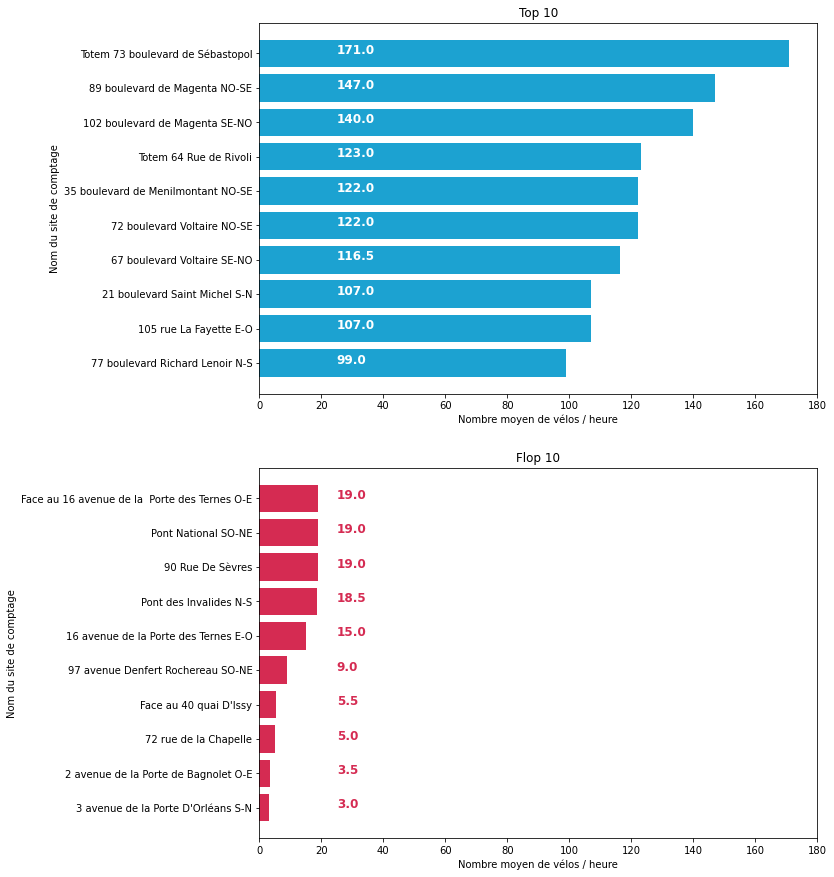

In [61]:
df_top = plan_df[['Nom du site de comptage', 'Comptage horaire']].sort_values(by='Comptage horaire', ascending = True).tail(10).reset_index()
df_flop = plan_df[['Nom du site de comptage', 'Comptage horaire']].sort_values(by='Comptage horaire', ascending = True).head(10).reset_index()

plt.figure(figsize = (10, 15))

plt.subplot(2, 1, 1)
plt.barh(df_top['Nom du site de comptage'], df_top['Comptage horaire'], color="#1ca2d1")
plt.xlim(0, 180)
plt.ylabel('Nom du site de comptage')
plt.xlabel('Nombre moyen de vélos / heure')
plt.title("Top 10")
plt.text(25, 9-0.01, df_top['Comptage horaire'][9].round(1), fontsize=12, color="white", weight="bold")
plt.text(25, 8-0.01, df_top['Comptage horaire'][8].round(1), fontsize=12, color="white", weight="bold")
plt.text(25, 7-0.01, df_top['Comptage horaire'][7].round(1), fontsize=12, color="white", weight="bold")
plt.text(25, 6-0.01, df_top['Comptage horaire'][6].round(1), fontsize=12, color="white", weight="bold")
plt.text(25, 5-0.01, df_top['Comptage horaire'][5].round(1), fontsize=12, color="white", weight="bold")
plt.text(25, 4-0.01, df_top['Comptage horaire'][4].round(1), fontsize=12, color="white", weight="bold")
plt.text(25, 3-0.01, df_top['Comptage horaire'][3].round(1), fontsize=12, color="white", weight="bold")
plt.text(25, 2-0.01, df_top['Comptage horaire'][2].round(1), fontsize=12, color="white", weight="bold")
plt.text(25, 1-0.01, df_top['Comptage horaire'][1].round(1), fontsize=12, color="white", weight="bold")
plt.text(25, 0-0.01, df_top['Comptage horaire'][0].round(1), fontsize=12, color="white", weight="bold")

plt.subplot(2, 1, 2)
plt.barh(df_flop['Nom du site de comptage'], df_flop['Comptage horaire'], color="#d52b52")
plt.xlim(0, 180)
plt.ylabel('Nom du site de comptage')
plt.xlabel('Nombre moyen de vélos / heure')
plt.title("Flop 10")
plt.text(25, 9-0.01, df_flop['Comptage horaire'][9].round(1), fontsize=12, color="#d52b52", weight="bold")
plt.text(25, 8-0.01, df_flop['Comptage horaire'][8].round(1), fontsize=12, color="#d52b52", weight="bold")
plt.text(25, 7-0.01, df_flop['Comptage horaire'][7].round(1), fontsize=12, color="#d52b52", weight="bold")
plt.text(25, 6-0.01, df_flop['Comptage horaire'][6].round(1), fontsize=12, color="#d52b52", weight="bold")
plt.text(25, 5-0.01, df_flop['Comptage horaire'][5].round(1), fontsize=12, color="#d52b52", weight="bold")
plt.text(25, 4-0.01, df_flop['Comptage horaire'][4].round(1), fontsize=12, color="#d52b52", weight="bold")
plt.text(25, 3-0.01, df_flop['Comptage horaire'][3].round(1), fontsize=12, color="#d52b52", weight="bold")
plt.text(25, 2-0.01, df_flop['Comptage horaire'][2].round(1), fontsize=12, color="#d52b52", weight="bold")
plt.text(25, 1-0.01, df_flop['Comptage horaire'][1].round(1), fontsize=12, color="#d52b52", weight="bold")
plt.text(25, 0-0.01, df_flop['Comptage horaire'][0].round(1), fontsize=12, color="#d52b52", weight="bold")
plt.show;

>Le site du boulevard Sébastopol (à double sens) semble le plus fréquenté avec 175 vélos / heure en moyenne. Mais les 2 sites suivants correspondent en fait aux 2 voies à sens unique de part et d’autre du boulevard de Magenta, qui cumule donc 289 vélos / heure. L’écart avec le point de passage le moins fréquenté - 4 vélos / heure en moyenne à Porte d’Orléans - est énorme. Il y donc une grande disparité en fonction des lieux.
\
>Dans le reste du classement, on retrouve sans surprise les sites les plus fréquentés cités précédemment et les moins fréquentés plutôt en périphérie.
\
\
Regardons maintenant l’évolution dans le temps.

## 2.3. Evolution du trafic cycliste à Paris entre le 01/09/2020 et le 31/12/2020

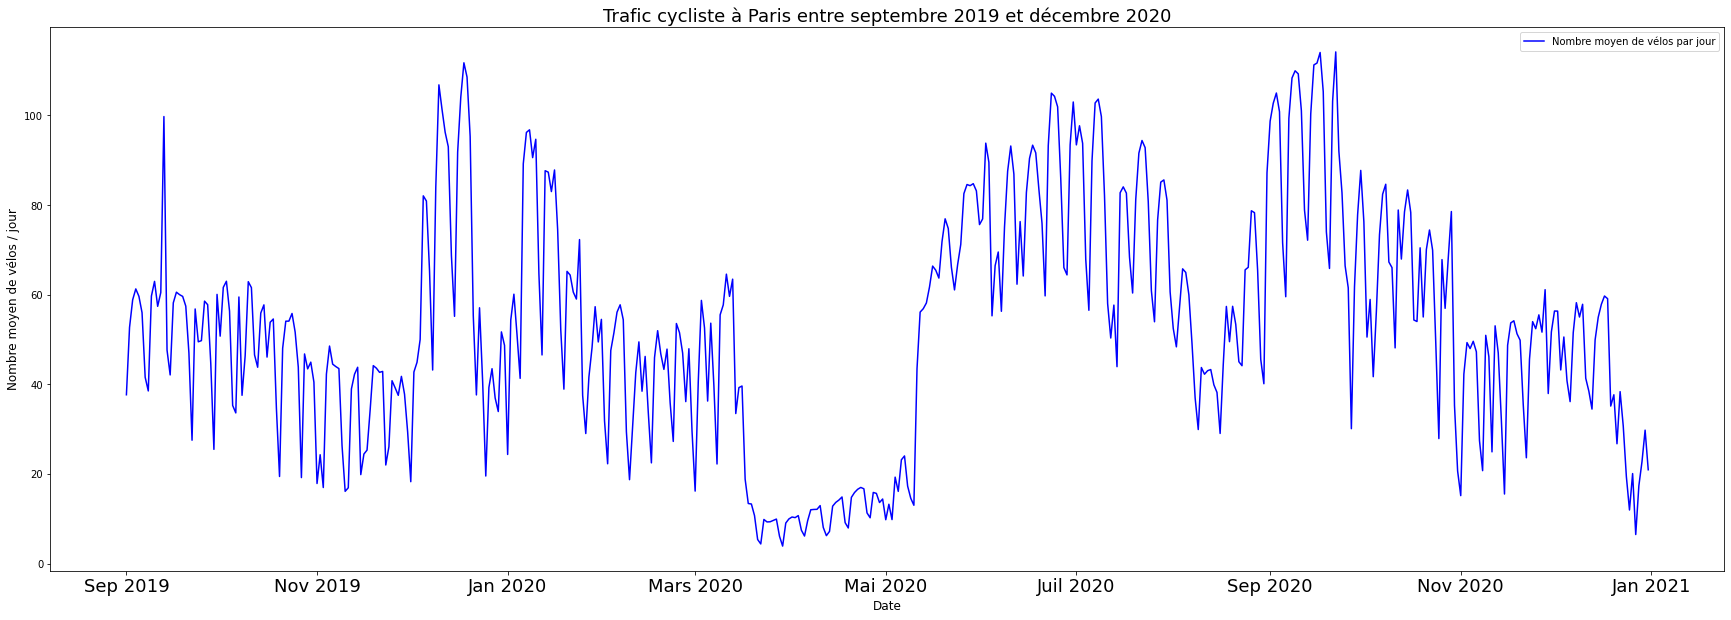

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

dates = df.groupby('Date')['Comptage horaire'].mean()

plt.figure(figsize = (30, 10))
plt.plot_date(dates.index, dates, 'b-', label = "Nombre moyen de vélos par jour")
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Nombre moyen de vélos / jour', fontsize = 12)
plt.title('Trafic cycliste à Paris entre septembre 2019 et décembre 2020', fontsize = 18)
plt.xticks(rotation = 0, fontsize = 18)
plt.xticks(['2019-09', '2019-11', '2020-01', '2020-03', '2020-05', '2020-07', '2020-09', '2020-11', '2021-01' ], ['Sep 2019', 'Nov 2019', 'Jan 2020', 'Mars 2020', 'Mai 2020', 'Juil 2020', 'Sep 2020', 'Nov 2020', 'Jan 2021'])
plt.legend()
plt.show;

>On observe un pic le 22 septembre 2019, lors de la Journée mondiale sans voiture. Pendant l’automne, le trafic baisse progressivement, le froid et la pluie rebutant les usagers.\
\
>La grande grève des transports débutée en décembre 2019 inverse la tendance. Le trafic monte en flèche, dépassant même le pic de la Journée sans voiture. Seules les vacances de Noël cassent, provisoirement, la courbe. Lorsque les transports publics reprennent fin janvier, le trafic diminue, mais reste légèrement supérieur au mois précédent la grève. Il remonte ensuite à l’approche du printemps. \
\
>Lors du 1er confinement mi-mars le trafic s'effondre. Mi-mai, avec le déconfinement et les beaux jours, il reprend de plus belle. On observe un creux au mois d'août, dû aux vacances et à l'absence de touristes cette année. \
\
>A la rentrée, le trafic cycliste à Paris atteint des sommets, plus hauts encore que ceux de la grève ! Il faut dire que le mois de septembre 2020 a été le plus chaud jamais enregistré en France. Et la crise sanitaire est passée par là. Peur des transports publics, création de 50 km de pistes cyclables par la Mairie, sans compter les aides de l'Etat pour l'achat ou la réparation de vélos... Bon nombre de parisiens ont adopté la petite reine comme moyen de transport quotidien. Il suffit de se promener dans Paris pour le constater.\
\
>En octobre, le trafic diminue, mais reste largement supérieur à l’automne 2019. A la fin du mois, c’est le deuxième confinement, moins sévère que le premier. Puis viennent les vacances de Noël sous couvre-feu. Le trafic s’effondre de nouveau.\
\
Regardons cette évolution de plus près.

## 2.4. Trafic mensuel & comparaison automne 2019 / 2020

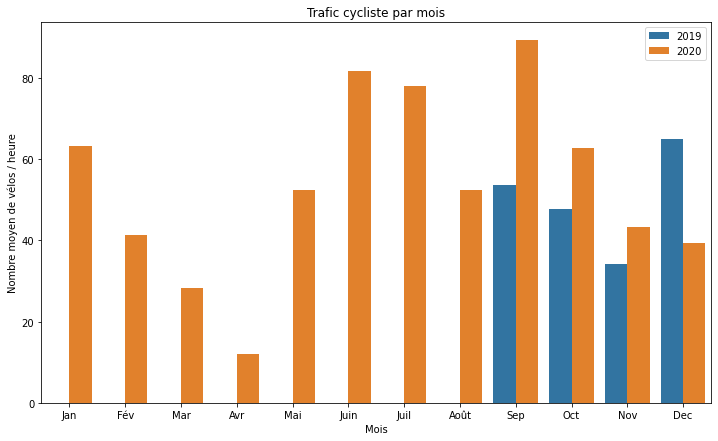

In [63]:
df_mois = df.groupby(['Mois', 'Année'], as_index = False)['Comptage horaire'].mean()

plt.figure(figsize = (12, 7))
sns.barplot(x = 'Mois', y = 'Comptage horaire' , hue = 'Année', data = df_mois)
plt.xticks(range(0, 12), ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel('Nombre moyen de vélos / heure')
plt.title('Trafic cycliste par mois')
plt.legend();

> La hausse du nombre de vélos circulant à Paris est flagrante entre les automnes 2019 et 2020, avec + 50% en septembre ! Seul le mois de décembre 2019, au plus fort de la grève, dépasse celui de 2020, plombé par le deuxième confinement et le couvre-feu. \
\
>Pour le reste de l’année 2020, on observe l’effet positif de la grève en janvier, du déconfinement en mai et du beau temps jusqu’en septembre. Les impacts négatifs sont dûs aux vacances en août et aux deux confinements de mars et novembre.\
\
> Continuons de zoomer pour observer le trafic lors d'une semaine.

## 2.5. Trafic hebdomadaire

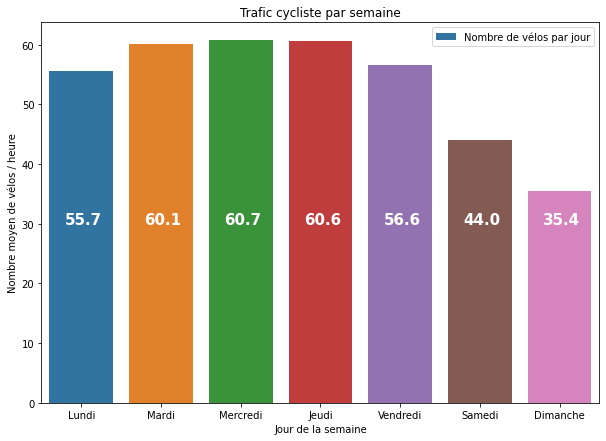

In [64]:
jours = df.groupby('Jour_de_la_semaine')['Comptage horaire'].mean()

plt.figure(figsize = (10, 7))
sns.barplot(x=jours.index, y=jours, label = "Nombre de vélos par jour")
plt.xlabel('Jour de la semaine')
plt.ylabel('Nombre moyen de vélos / heure')
plt.xticks(range(7), ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche'])
plt.title('Trafic cycliste par semaine')
plt.text(-0.21, 30, jours[0].round(1), fontsize=15, color="white", weight="bold")
plt.text(0.79, 30, jours[1].round(1), fontsize=15, color="white", weight="bold")
plt.text(1.79, 30, jours[2].round(1), fontsize=15, color="white", weight="bold")
plt.text(2.79, 30, jours[3].round(1), fontsize=15, color="white", weight="bold")
plt.text(3.79, 30, jours[4].round(1), fontsize=15, color="white", weight="bold")
plt.text(4.79, 30, jours[5].round(1), fontsize=15, color="white", weight="bold")
plt.text(5.79, 30, jours[6].round(1), fontsize=15, color="white", weight="bold")
plt.legend();

> On voyait bien sur le premier graphique la distribution périodique en dents de scie. Cela se confirme ici avec une information supplémentaire : les vélos circulent moins le week-end que la semaine. Le vélo à Paris n'est donc pas un simple loisir, il est principalement un moyen de transport quotidien. 60 vélos / heure en moyenne circulent en milieu de semaine contre 35 le dimanche.\
\
> Regardons plus en détail la répartition entre les jours de semaine et le week-end.

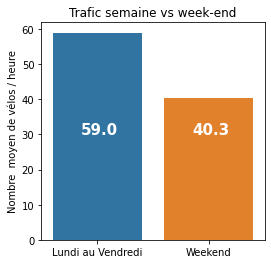

In [65]:
# on crée la variable Week_end, remplie de 0 (= pas un weekend)
df['Weekend'] = 0
df.loc[df['Jour_de_la_semaine'] == 5, 'Weekend'] = 1
df.loc[df['Jour_de_la_semaine'] == 6, 'Weekend'] = 1

#On regarde les week end sur l'année 2020
week_df = df.loc[df['Année'] == 2020]
week_df = week_df.groupby(['Mois','Jour','Weekend'], as_index = False).agg({'Comptage horaire':'mean'})

week_df = week_df.groupby(['Weekend'], as_index = False).agg({'Comptage horaire':'mean'})

plt.figure(figsize = (4, 4))
sns.barplot(x=week_df.Weekend, y=week_df['Comptage horaire'])
plt.ylabel('Nombre  moyen de vélos / heure')
plt.xticks(range(2), ['Lundi au Vendredi', 'Weekend'])
plt.text(-0.15, 30, week_df['Comptage horaire'][0].round(1), fontsize=15, color="white", weight="bold")
plt.text(0.85, 30, week_df['Comptage horaire'][1].round(1), fontsize=15, color="white", weight="bold")
plt.xlabel(" ")
plt.title('Trafic semaine vs week-end');

> Le trafic baisse de 32% le week-end. 

In [66]:
#On vient regarder plus en détail le samedi et le dimanche : 
# on crée la variable sam_dim, remplie de 0 (= pas un weekend)
df['sam_dim'] = 0
df.loc[df['Jour_de_la_semaine'] == 5, 'sam_dim'] = 1
df.loc[df['Jour_de_la_semaine'] == 6, 'sam_dim'] = 2

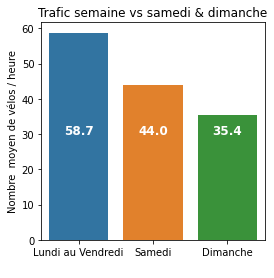

In [67]:
week_df3 = df.groupby(['sam_dim'], as_index = False).agg({'Comptage horaire':'mean'})

plt.figure(figsize = (4, 4))
sns.barplot(x=week_df3.sam_dim, y=week_df3['Comptage horaire'])
plt.ylabel('Nombre  moyen de vélos / heure')
plt.xticks(range(3), ['Lundi au Vendredi', 'Samedi', 'Dimanche'])
plt.text(-0.2, 30, week_df3['Comptage horaire'][0].round(1), fontsize=12, color="white", weight="bold")
plt.text(0.8, 30, week_df3['Comptage horaire'][1].round(1), fontsize=12, color="white", weight="bold")
plt.text(1.8, 30, week_df3['Comptage horaire'][2].round(1), fontsize=12, color="white", weight="bold")
plt.xlabel(" ")
plt.title('Trafic semaine vs samedi & dimanche');

> Le trafic baisse d’un tiers le week-end : - 25% le samedi et - 40% le dimanche.
>
> Qu'en est-il du trafic quotidien ?

## 2.7. Trafic quotidien

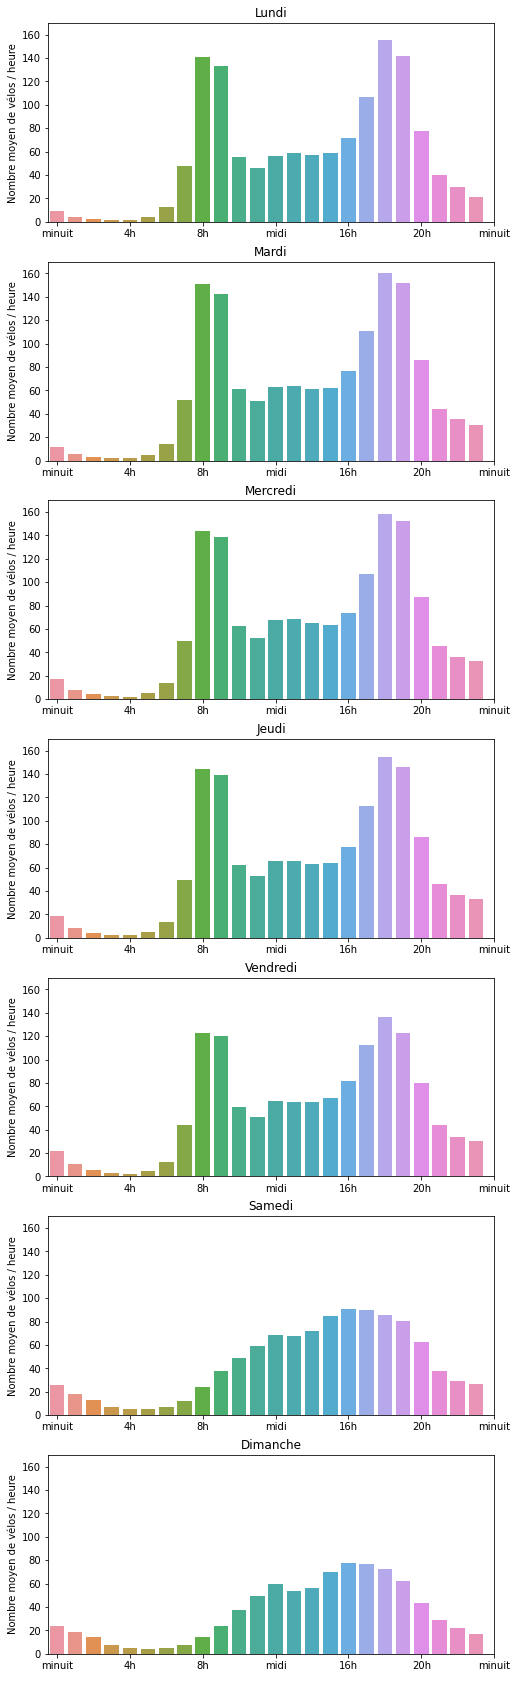

In [68]:
heures_df = df.groupby(['Heure','Jour_de_la_semaine'], as_index = False).agg({'Comptage horaire':'mean'})

plt.figure(figsize = (8, 30))
num = 0
titres = ['Lundi', 'Mardi','Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']

for i in heures_df['Jour_de_la_semaine'].unique():
    num += 1    
    plt.subplot(7, 1, num)
    sns.barplot(x = 'Heure', y = 'Comptage horaire', data = heures_df[heures_df['Jour_de_la_semaine'] == i])
    plt.ylabel('Nombre moyen de vélos / heure')
    plt.ylim(0, 170)
    plt.xticks([0, 4, 8, 12, 16, 20, 24], ['minuit', '4h', '8h', 'midi', '16h', '20h', 'minuit'])
    plt.xlabel(" ")
    plt.title(titres[num - 1]);

> En semaine, on observe 2 pics aux heures de pointe : entre 8 et 9h, puis entre 17 et 19h. Le week-end, la courbe est beaucoup plus lissée avec une progression régulière jusqu'à 17h, puis une diminution dans la soirée.\
\
> Une année ordinaire est rythmée par les vacances scolaires, les jours fériés ou encore par la pluie et le beau temps. Quelle est l’influence de ces facteurs récurrents ? Commençons par les vacances.


## 2.8. Influence des facteurs récurrents

### 2.8.1. Influence des vacances scolaires sur le trafic (en 2020)

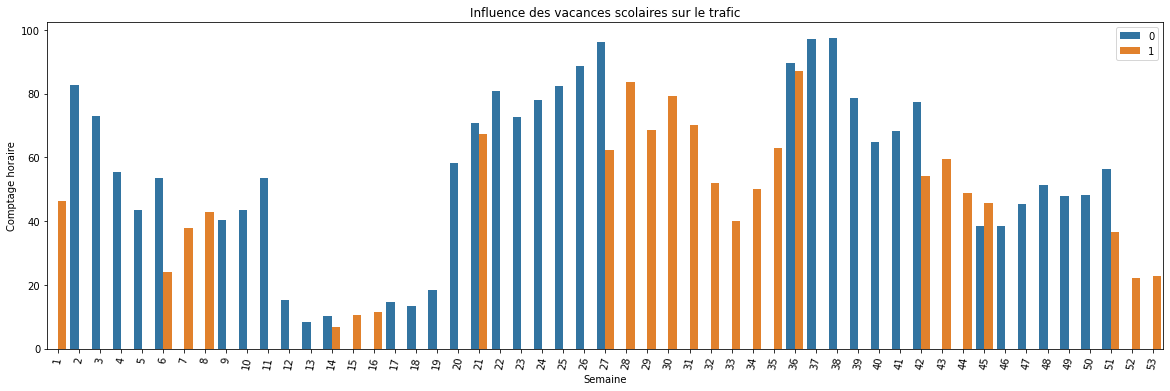

In [69]:
# VACANCES SCOLAIRES
#On regarde les vacances scolaires de 2020

vacances2020_df = df[df.Année == 2020].groupby(['Semaine', 'Vacances'], as_index = False).agg({'Comptage horaire':'mean'})
vacances2020_df.head()

plt.figure(figsize = (20,6))
sns.barplot(x = 'Semaine', y = 'Comptage horaire', data = vacances2020_df, hue = 'Vacances')
plt.legend()
plt.title("Influence des vacances scolaires sur le trafic") 
plt.xticks(rotation = 80);

> Le trafic semble diminuer pendant les vacances scolaires, mais pas toujours dans les mêmes proportions. Regardons de plus près l’effet de chaque type de vacances.

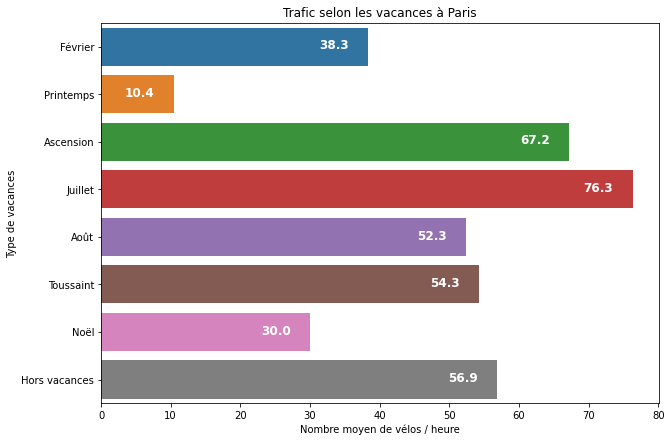

In [70]:
vac_df2 = df.loc[df['Année'] == 2020]
vac_df2 = vac_df2.groupby(['vac_fevrier','vac_printemps','vac_ascension', 'vac_juillet','vac_aout','vac_toussaint','vac_noel' ], as_index = False).agg({'Comptage horaire':'mean'})
vac_df2 = vac_df2.sort_values(by=["vac_fevrier", "vac_printemps", "vac_ascension","vac_juillet","vac_aout","vac_toussaint","vac_noel"], ascending=False)
vac_df2 = vac_df2.reset_index()

plt.figure(figsize = (10, 7))
sns.barplot(x=vac_df2['Comptage horaire'], y=vac_df2.index, orient = 'h')
plt.xlabel('Nombre moyen de vélos / heure')
plt.ylabel('Type de vacances')
plt.yticks(range(8), ['Février','Printemps', 'Ascension', 'Juillet', 'Août', 'Toussaint', 'Noël','Hors vacances'])
plt.title('Trafic selon les vacances à Paris');
plt.text(vac_df2['Comptage horaire'][0]-7, 0.05, vac_df2['Comptage horaire'][0].round(1), fontsize=12, color="white", weight="bold")
plt.text(vac_df2['Comptage horaire'][1]-7, 1+0.05, vac_df2['Comptage horaire'][1].round(1), fontsize=12, color="white", weight="bold")
plt.text(vac_df2['Comptage horaire'][2]-7, 2+0.05, vac_df2['Comptage horaire'][2].round(1), fontsize=12, color="white", weight="bold")
plt.text(vac_df2['Comptage horaire'][3]-7, 3+0.05, vac_df2['Comptage horaire'][3].round(1), fontsize=12, color="white", weight="bold")
plt.text(vac_df2['Comptage horaire'][4]-7, 4+0.05, vac_df2['Comptage horaire'][4].round(1), fontsize=12, color="white", weight="bold")
plt.text(vac_df2['Comptage horaire'][5]-7, 5+0.05, vac_df2['Comptage horaire'][5].round(1), fontsize=12, color="white", weight="bold")
plt.text(vac_df2['Comptage horaire'][6]-7, 6+0.05, vac_df2['Comptage horaire'][6].round(1), fontsize=12, color="white", weight="bold")
plt.text(vac_df2['Comptage horaire'][7]-7, 7+0.05, vac_df2['Comptage horaire'][7].round(1), fontsize=12, color="white", weight="bold");

> Il n’y a que les vacances de Noël qui font drastiquement baisser le trafic de 57%. Les vacances de février l'amputent de 33%. La Toussaint et août influent peu. Le trafic augmente même lors des vacances de juillet et de l'Ascension 2020. Nous ne considérons pas les vacances de printemps, qui ont eu lieu lors du premier confinement.

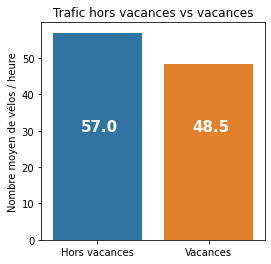

In [71]:
vac_df3 = df.loc[df['Année'] == 2020]
vac_df3 = vac_df3.groupby(['Vacances' ], as_index = False).agg({'Comptage horaire':'mean'})

plt.figure(figsize = (4, 4))
sns.barplot(x=vac_df3.index, y=vac_df3['Comptage horaire'])
plt.ylabel('Nombre moyen de vélos / heure')
plt.xticks(range(2), ['Hors vacances', 'Vacances'])
plt.title('Trafic hors vacances vs vacances')
plt.text(-0.15, 30, vac_df3['Comptage horaire'][0].round(1), fontsize=15, color="white", weight="bold")
plt.text(0.85, 30, vac_df3['Comptage horaire'][1].round(1), fontsize=15, color="white", weight="bold");

> Et les jours fériés, comment impactent-ils le trafic ? Zoomons sur la période avril-août, là où il y en a le plus.

### 2.8.2. Influence des jours fériés

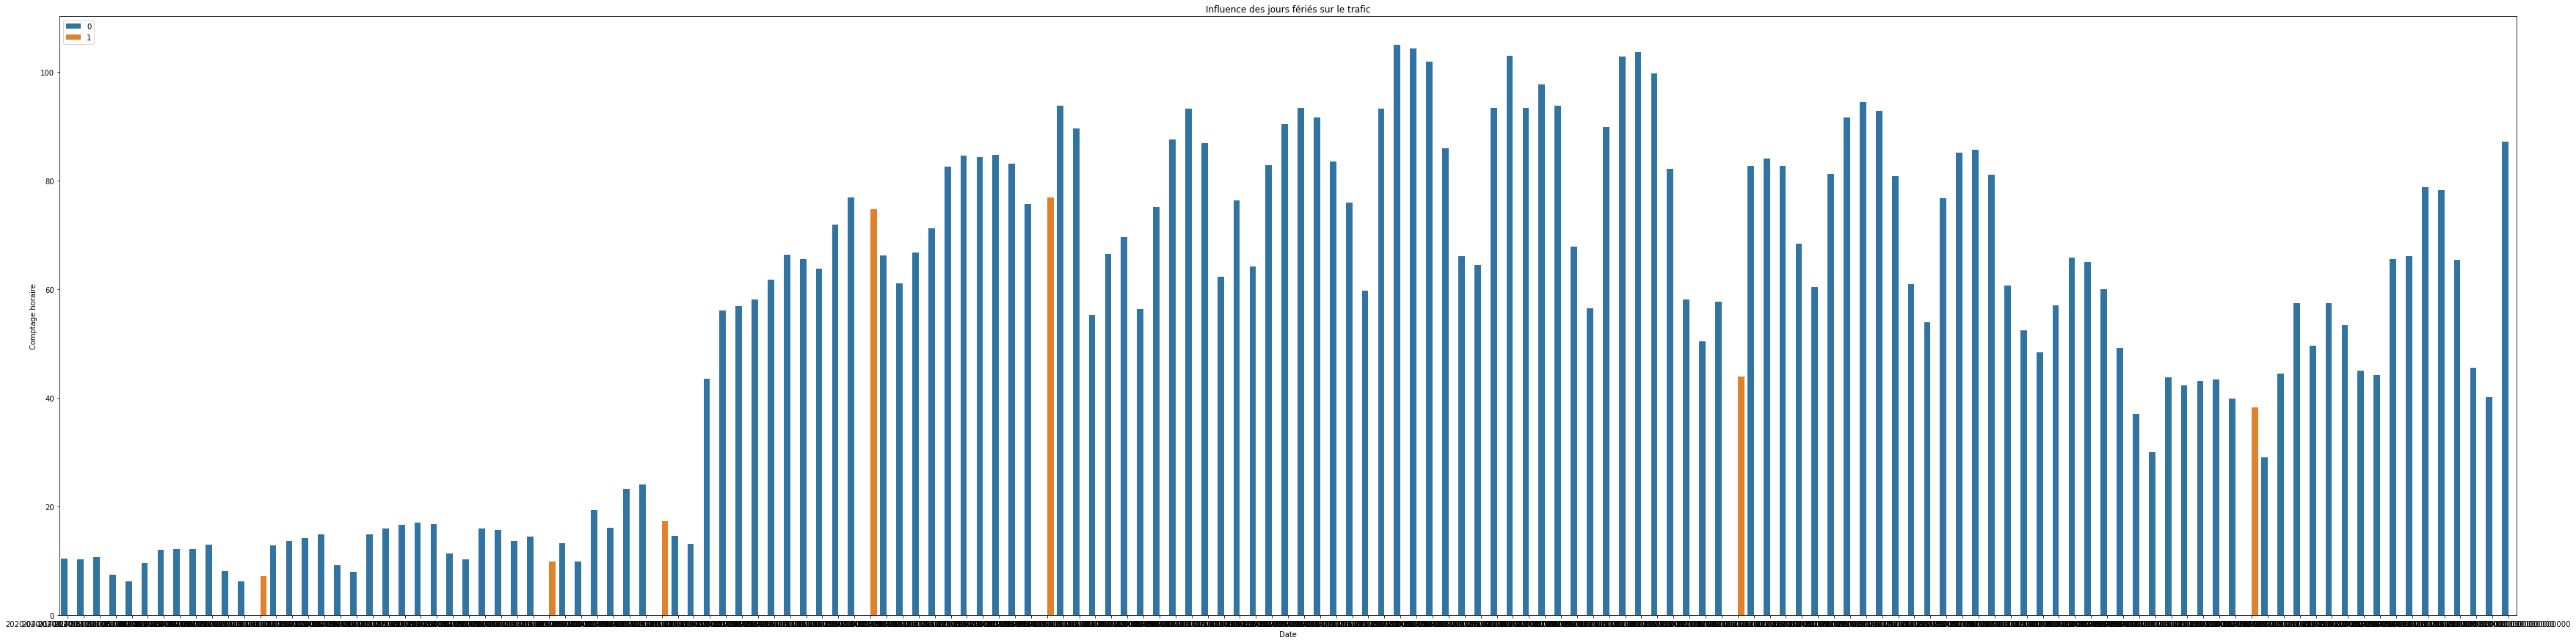

In [72]:
#JOURS FERIÉS
# On zoome sur la période avril-aout, là où il y a le plus de jours fériés
ferie_df = df.loc[(df['Année'] == 2020) & ((df['Mois'] > 3) & (df['Mois'] < 9))]
ferie_df = ferie_df.groupby(['Date','Jour_férié'], as_index = False).agg({'Comptage horaire':'mean'})

plt.figure(figsize = (60, 15))
sns.barplot(x = 'Date', y = 'Comptage horaire', data = ferie_df, hue = 'Jour_férié')
plt.legend()
plt.title("Influence des jours fériés sur le trafic")
plt.legend();

#ferie_df2 = df.loc[(df['Année'] == 2020) & (df['Mois'] > 6)]
#ferie_df2 = ferie_df2.groupby(['Date','Jour_férié'], as_index = False).agg({'Comptage horaire':'mean'})

#plt.figure(figsize = (60, 15))
#sns.barplot(x = 'Date', y = 'Comptage horaire', data = ferie_df2, hue = 'Jour_férié')
#plt.legend();

> L’effet des jours fériés n’a pas l’air systématique, mais avril et mai se sont déroulés sous confinement, cela a peut-être joué. Comparons les comptages sur les 16 mois du jeu de données.

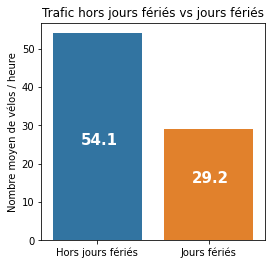

In [73]:
# on calcule la différence sur toute la période, ça dilue l'effet Covid 

ferie_df2 = df.groupby(['Jour_férié'], as_index = False).agg({'Comptage horaire':'mean'})

plt.figure(figsize = (4, 4))
sns.barplot(x=ferie_df2.index, y=ferie_df2['Comptage horaire'])
plt.xlabel('Jour feriés')
plt.ylabel('Nombre moyen de vélos / heure')
plt.xticks(range(2), ['Hors jours fériés', 'Jours fériés'])
plt.title('Trafic hors jours fériés vs jours fériés')
plt.xlabel(" ")
plt.text(-0.15, 25, ferie_df2['Comptage horaire'][0].round(1), fontsize=15, color="white", weight="bold")
plt.text(0.85, 15, ferie_df2['Comptage horaire'][1].round(1), fontsize=15, color="white", weight="bold");

> En effet, sur toute la période, les jours fériés font baisser le trafic horaire de  54%.\
\
> Pour la dernière analyse des facteurs ordinaires, observons l’effet de la météo.

## 2.8.3. Influence des facteurs météo

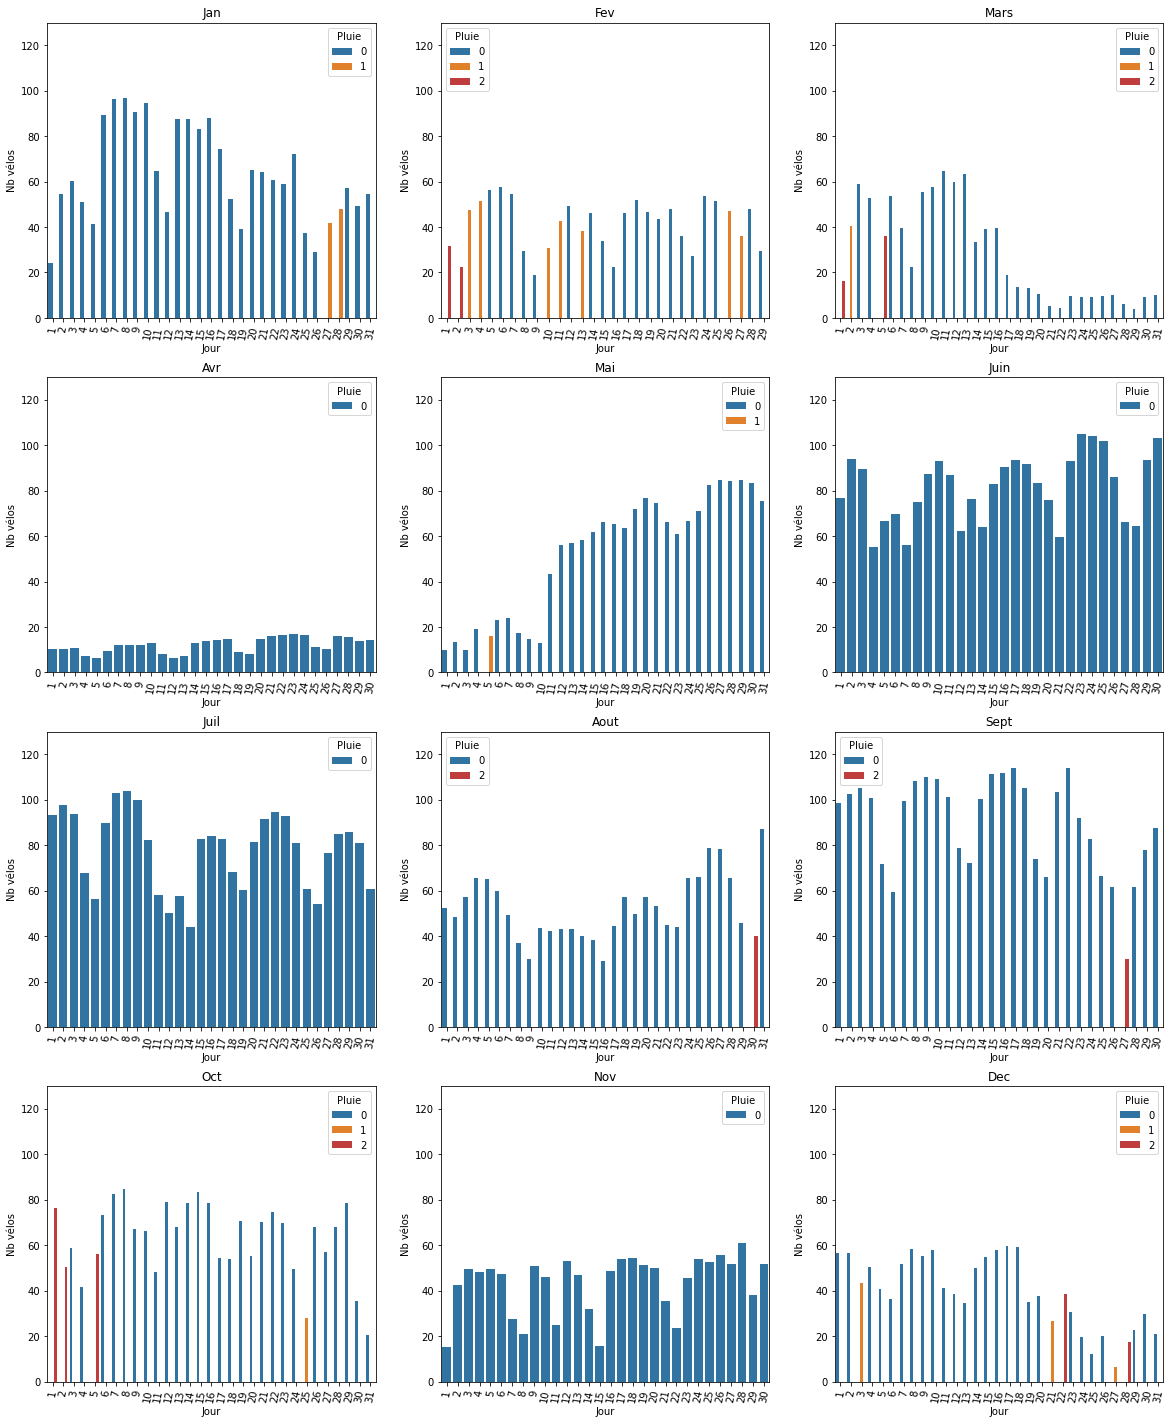

In [74]:
#PLUIE

#On regarde la periode 2020
pluie_df = df.loc[df['Année'] == 2020]
pluie_df = pluie_df.groupby(['Mois','Jour','Pluie'], as_index = False).agg({'Comptage horaire':'mean'})

plt.figure(figsize = (20, 25))
num = 0

titres = ['Jan', 'Fev','Mars', 'Avr', 'Mai', 'Juin', 'Juil', 'Aout', 'Sept', 'Oct', 'Nov', 'Dec']
palette ={ 0 : "C0", 1 : "C1", 2 : "C3"}
#On crée un graphique par mois:
for i in  pluie_df['Mois'].unique():
    num += 1    
    plt.subplot(4, 3, num)
    sns.barplot(x='Jour', y='Comptage horaire',hue = 'Pluie',palette = palette, data = pluie_df[pluie_df['Mois'] == i])
    plt.ylabel('Nb vélos')
    plt.ylim(0, 130)
    plt.xticks(rotation = 80)
    plt.title(titres[num - 1])

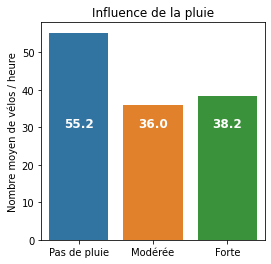

In [75]:
pluie_df2 = df.loc[df['Année'] == 2020]
pluie_df2 = pluie_df2.groupby(['Pluie'], as_index = False).agg({'Comptage horaire':'mean'})


plt.figure(figsize = (4, 4))
sns.barplot(x=pluie_df2.index, y=pluie_df2['Comptage horaire'])
plt.ylabel('Nombre moyen de vélos / heure')
plt.xticks(range(3), ['Pas de pluie', 'Modérée', 'Forte'])
plt.title('Influence de la pluie')
plt.text(-0.2, 30, pluie_df2['Comptage horaire'][0].round(1), fontsize=12, color="white", weight="bold")
plt.text(0.8, 30, pluie_df2['Comptage horaire'][1].round(1), fontsize=12, color="white", weight="bold")
plt.text(1.8, 30, pluie_df2['Comptage horaire'][2].round(1), fontsize=12, color="white", weight="bold");

> La pluie fait baisser le nombre de vélos par heure d’un tiers. En revanche, qu’elle soit forte ou modérée ne semble pas jouer. Ceux qui sont prêts à affronter la pluie le font coûte que coûte !

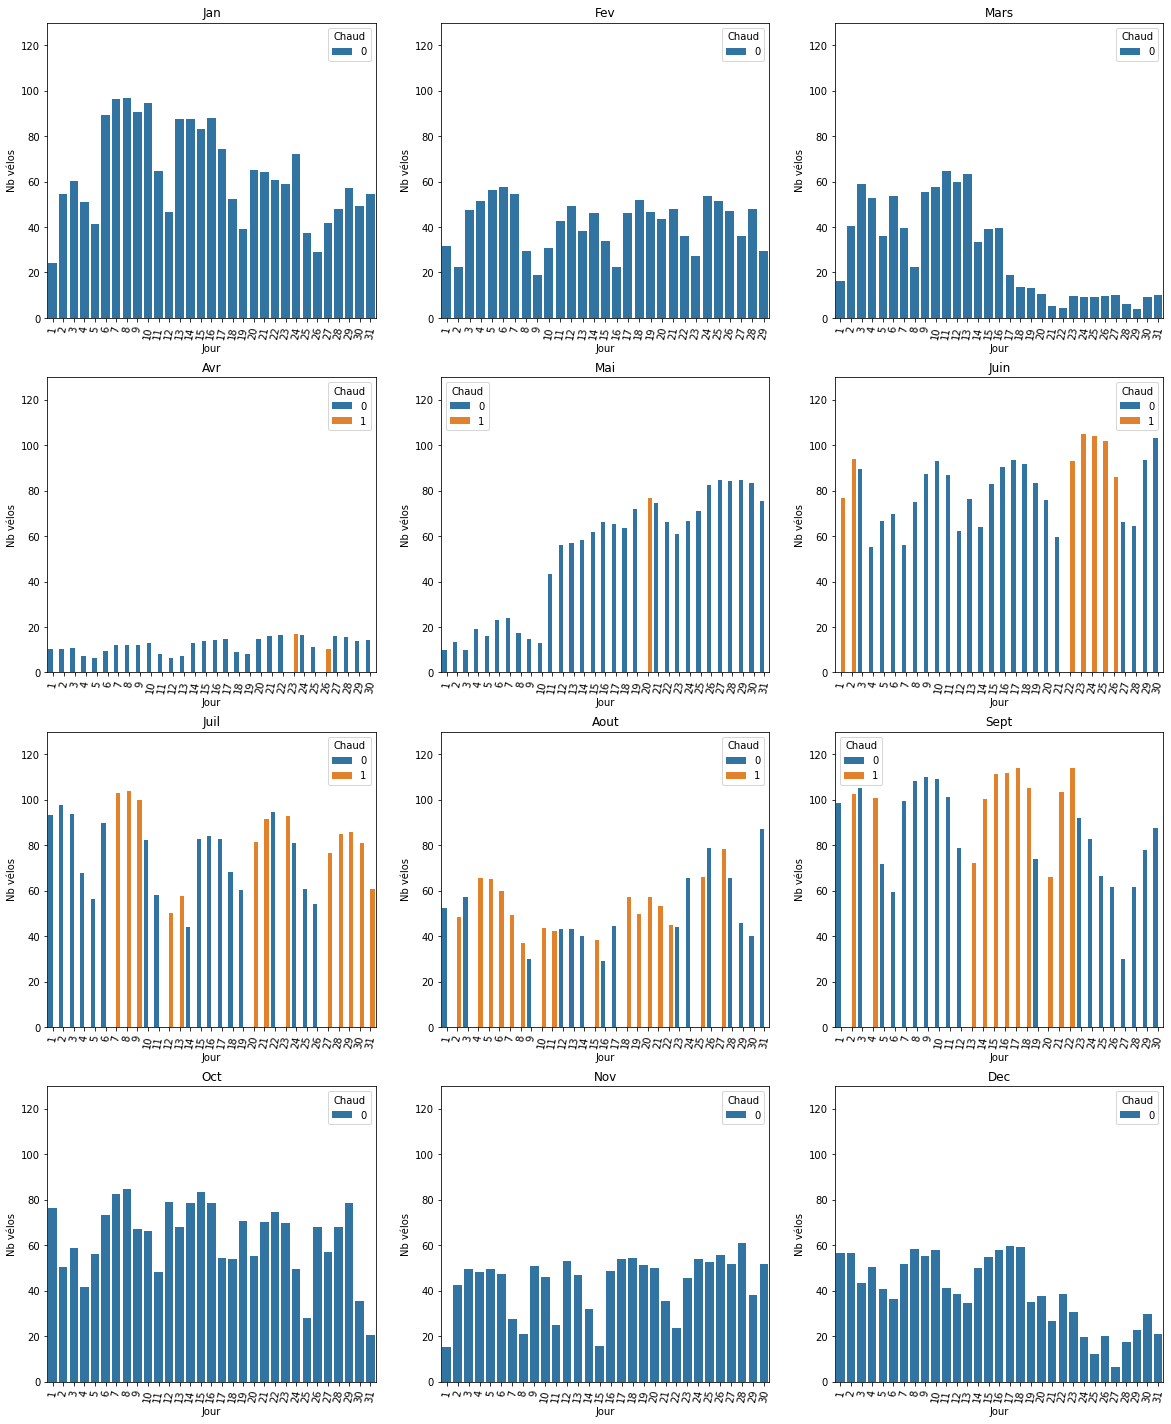

In [76]:
#BEAU TEMPS : >23° et soleil

#On regarde la periode 2020
chaud_df = df.loc[df['Année'] == 2020]
chaud_df = chaud_df.groupby(['Mois','Jour','Chaud'], as_index = False).agg({'Comptage horaire':'mean'})

plt.figure(figsize = (20, 25))
num = 0

titres = ['Jan', 'Fev','Mars', 'Avr', 'Mai', 'Juin', 'Juil', 'Aout', 'Sept', 'Oct', 'Nov', 'Dec']
palette ={ 0 : "C0", 1 : "C1"}
#On crée un graphique par mois:
for i in  chaud_df['Mois'].unique():
    num += 1    
    plt.subplot(4, 3, num)
    sns.barplot(x='Jour', y='Comptage horaire',hue = 'Chaud',palette = palette, data = chaud_df[chaud_df['Mois'] == i])
    plt.ylabel('Nb vélos')
    plt.ylim(0, 130)
    plt.xticks(rotation = 80)
    plt.title(titres[num - 1])

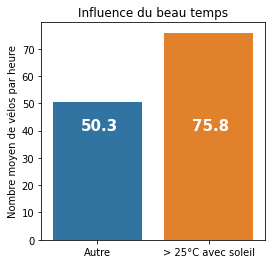

In [77]:
chaud_df2 = df.loc[df['Année'] == 2020]
chaud_df2 = chaud_df2.groupby(['Chaud'], as_index = False).agg({'Comptage horaire':'mean'})

plt.figure(figsize = (4, 4))
sns.barplot(x=chaud_df2.index, y=chaud_df2['Comptage horaire'])
plt.ylabel('Nombre moyen de vélos par heure')
plt.xticks(range(2), ['Autre', '> 25°C avec soleil'])
plt.title('Influence du beau temps')
plt.text(-0.15, 40, chaud_df2['Comptage horaire'][0].round(1), fontsize=15, color="white", weight="bold")
plt.text(0.85, 40, chaud_df2['Comptage horaire'][1].round(1), fontsize=15, color="white", weight="bold");

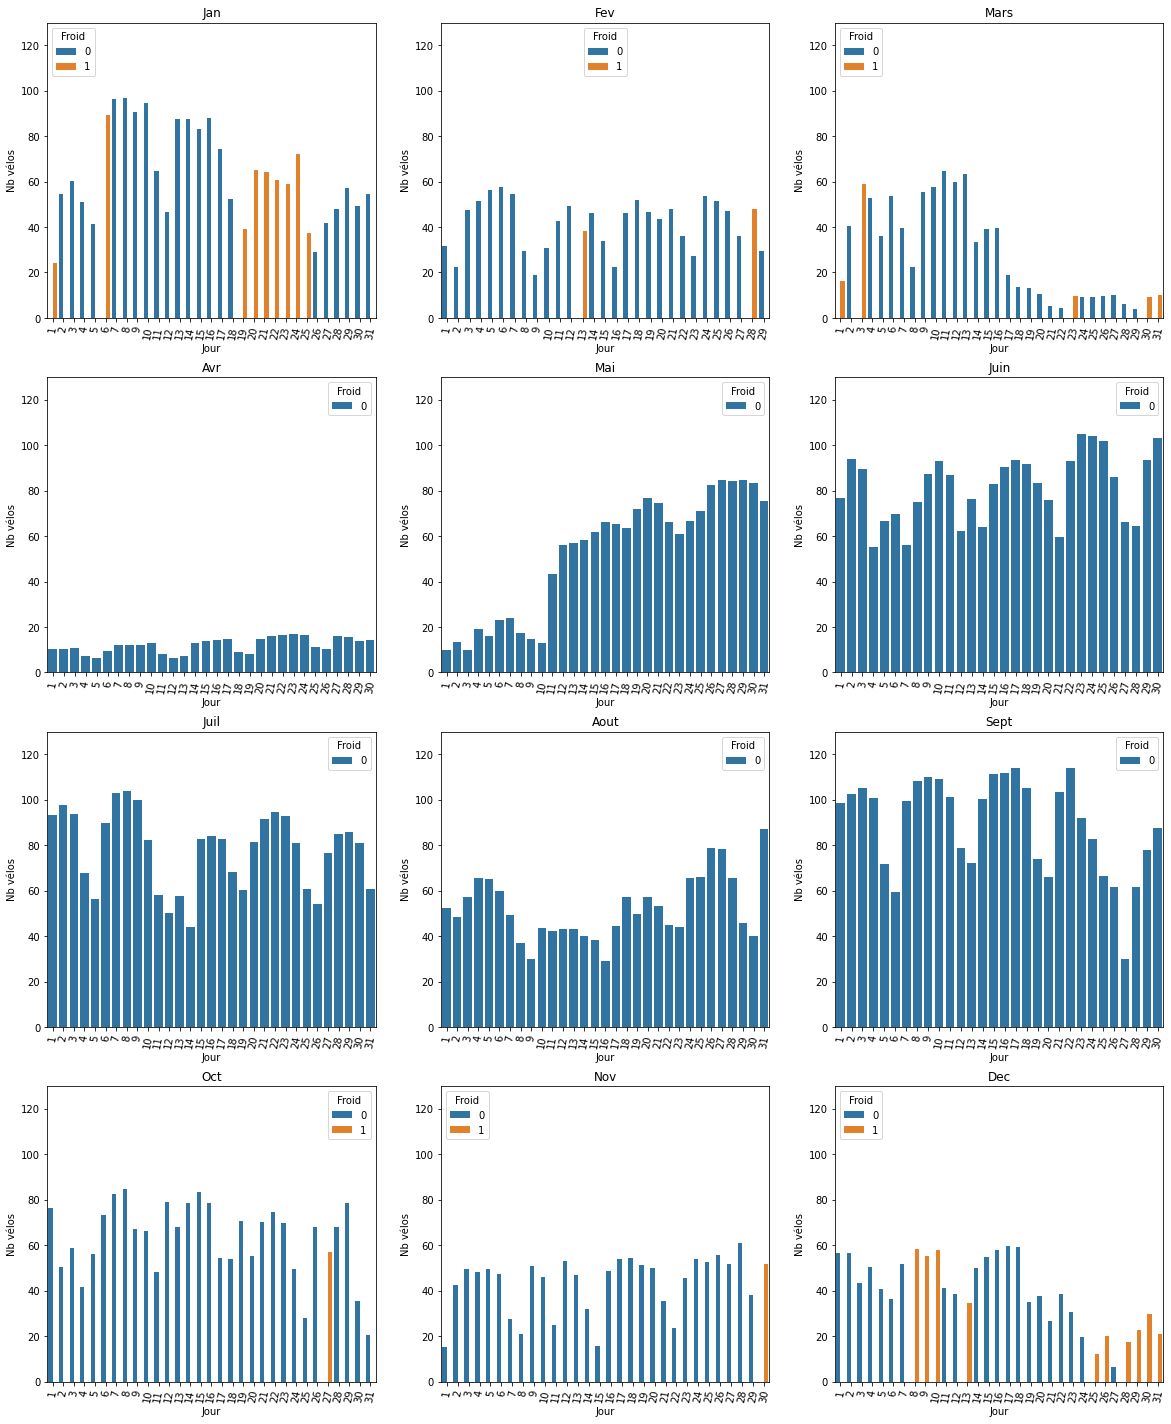

In [78]:
#Froid

#On regarde la periode 2020
froid_df = df.loc[df['Année'] == 2020]
froid_df = froid_df.groupby(['Mois','Jour','Froid'], as_index = False).agg({'Comptage horaire':'mean'})

plt.figure(figsize = (20, 25))
num = 0

titres = ['Jan', 'Fev','Mars', 'Avr', 'Mai', 'Juin', 'Juil', 'Aout', 'Sept', 'Oct', 'Nov', 'Dec']
palette ={ 0 : "C0", 1 : "C1"}
#On crée un graphique par mois:
for i in  chaud_df['Mois'].unique():
    num += 1    
    plt.subplot(4, 3, num)
    sns.barplot(x='Jour', y='Comptage horaire',hue = 'Froid',palette = palette, data = froid_df[froid_df['Mois'] == i])
    plt.ylabel('Nb vélos')
    plt.ylim(0, 130)
    plt.xticks(rotation = 80)
    plt.title(titres[num - 1])

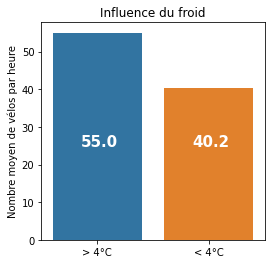

In [79]:
froid_df2 = df.loc[df['Année'] == 2020]
froid_df2 = froid_df2.groupby(['Froid'], as_index = False).agg({'Comptage horaire':'mean'})

plt.figure(figsize = (4, 4))
sns.barplot(x=froid_df2.index, y=froid_df2['Comptage horaire'])
plt.ylabel('Nombre moyen de vélos par heure')
plt.xticks(range(2), ['> 4°C', '< 4°C'])
plt.title('Influence du froid')
plt.text(-0.15, 25, froid_df2['Comptage horaire'][0].round(1), fontsize=15, color="white", weight="bold")
plt.text(0.85, 25, froid_df2['Comptage horaire'][1].round(1), fontsize=15, color="white", weight="bold");

> Un thermomètre qui descend sous les 4 degrés refroidira 28% des cyclistes, tandis que le beau temps en fera sortir 50% de plus.

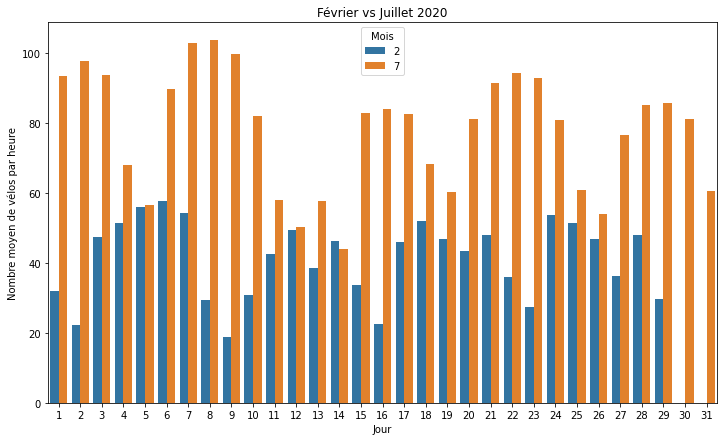

In [80]:
# on crée la variable Fev_juill, remplie
fev= df.loc[df['Mois'] == 2]
juill= df.loc[df['Mois'] == 7]
fev_juill = pd.concat([fev, juill], axis = 0)
fev_juill = fev_juill.loc[fev_juill['Année'] == 2020]

fev_juill_df = fev_juill.groupby(['Jour','Mois'], as_index = False).agg({'Comptage horaire':'mean'})


plt.figure(figsize = (12, 7))

sns.barplot(x='Jour', y='Comptage horaire', hue = 'Mois', data = fev_juill_df)
plt.ylabel('Nombre moyen de vélos par heure')
plt.xticks(rotation = 0)
plt.title('Février vs Juillet 2020');

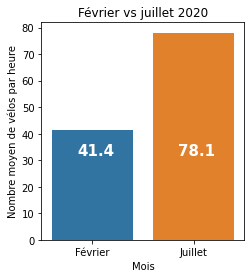

In [81]:
plt.figure(figsize = (8, 4))
fev_juill_df2 = fev_juill.groupby(['Mois'], as_index = False).agg({'Comptage horaire':'mean'})

plt.subplot(1,2,1)
sns.barplot(x='Mois', y='Comptage horaire', data = fev_juill_df2)
plt.ylabel('Nombre moyen de vélos par heure')

plt.xticks(np.arange(2), ('Février', 'Juillet'))
plt.title('Février vs juillet 2020')
plt.text(-0.15, 32, fev_juill_df2['Comptage horaire'][0].round(1), fontsize=15, color="white", weight="bold")
plt.text(0.85, 32, fev_juill_df2['Comptage horaire'][1].round(1), fontsize=15, color="white", weight="bold");

> En moyenne, deux fois plus de vélos ont circulé en juillet qu’en février. Nous ne pouvons pas exclure qu’il y ait aussi eu un effet Covid entre les deux.\
\
>En dehors de ces variations ordinaires, la période écoulée a vu des événements hors du commun, comme la longue grève des transports ou la crise du Covid. Quel a été leur impact sur le trafic cycliste ?

## 2.8. Influence des facteurs exceptionnels

### 2.8.1. La grève des transports (hiver 2019/2020)

> Longue de 2 mois, elle marque un tournant dans l’usage du vélo à Paris. Qu’il pleuve, qu’il vente ou qu’il neige, les parisiens ont ressorti leur vélo. Pour distinguer l’effet de la grève de celui de la crise sanitaire, nous étudions d’abord la période 1er septembre 2019 - 15 mars 2020 (veille du premier confinement).

/Users/cynthialaboureau/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


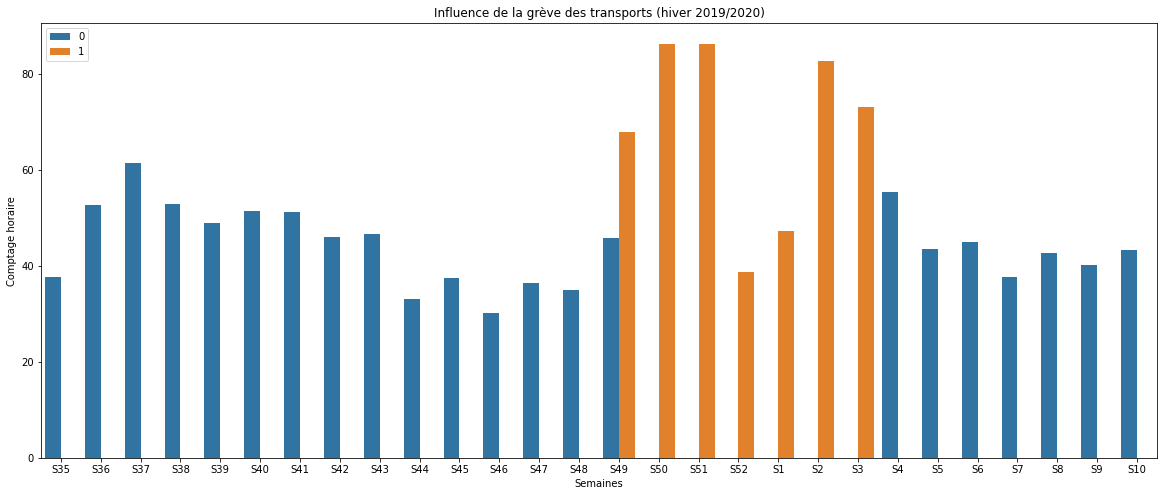

In [82]:
# GREVE DE TRANSPORT

greve_df = df[(df.Année == 2019) | ((df.Semaine < 11) & (df.Année == 2020))].groupby(['Semaine', 'Grève'], as_index = False).agg({'Comptage horaire':'mean'})
index_list = (greve_df.index).tolist()
greve_df["an"] = 0

#Répartion des semaines par année
for i in index_list:
    if greve_df.loc[i]["Semaine"] > 10:
        greve_df["an"].loc[i] = 2019
    elif greve_df.loc[i]["Semaine"] <= 10:
        greve_df["an"].loc[i] = 2020
        
greve_df = greve_df.sort_values(by=["an", "Semaine"]).reset_index()
greve_df["Semaine"] = "S" + greve_df["Semaine"].map(str)
liste_semaine = greve_df["Semaine"].tolist()


plt.figure(figsize = (20,8))
sns.barplot(x = liste_semaine, y = 'Comptage horaire', data = greve_df, hue = 'Grève')
plt.legend()
plt.title("Influence de la grève des transports (hiver 2019/2020)")
plt.xlabel("Semaines");

> L’impact de l’arrêt des transports en commun a été quasiment immédiat avec un trafic cycliste qui a quasiment doublé du jour au lendemain. Les vacances de Noël, dont nous avons vu l’impact très fort, ont fait baisser la moyenne pendant deux semaines.

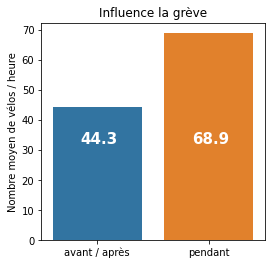

In [83]:
greve_df2 = greve_df.groupby(['Grève'], as_index = False).agg({'Comptage horaire':'mean'})

plt.figure(figsize = (4, 4))
sns.barplot(x = greve_df2.index, y = greve_df2['Comptage horaire'])
plt.ylabel('Nombre moyen de vélos / heure')
plt.xticks(range(2), ['avant / après', 'pendant'])
plt.title('Influence la grève')
plt.text(-0.15, 32, greve_df2['Comptage horaire'][0].round(1), fontsize=15, color="white", weight="bold")
plt.text(0.85, 32, greve_df2['Comptage horaire'][1].round(1), fontsize=15, color="white", weight="bold");

> Pendant la grève, le trafic a bondi de 50%, passant de 44 vélos / heure en moyenne à 66.\
\
> Venons en enfin à l’évènement majeur de 2020 : la crise sanitaire liée à la Covid. Quel a été son impact sur l’usage du vélo à Paris ?

### 2.8.2. Influence de la Covid

> Pour distinguer les effets de l’une et de l’autre, nous étudierons ici uniquement la période post-grève, à partir de fin janvier.

<ipython-input-84-1a89f40e34e8>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['Semaine'] = df['Date et heure de comptage'].dt.week


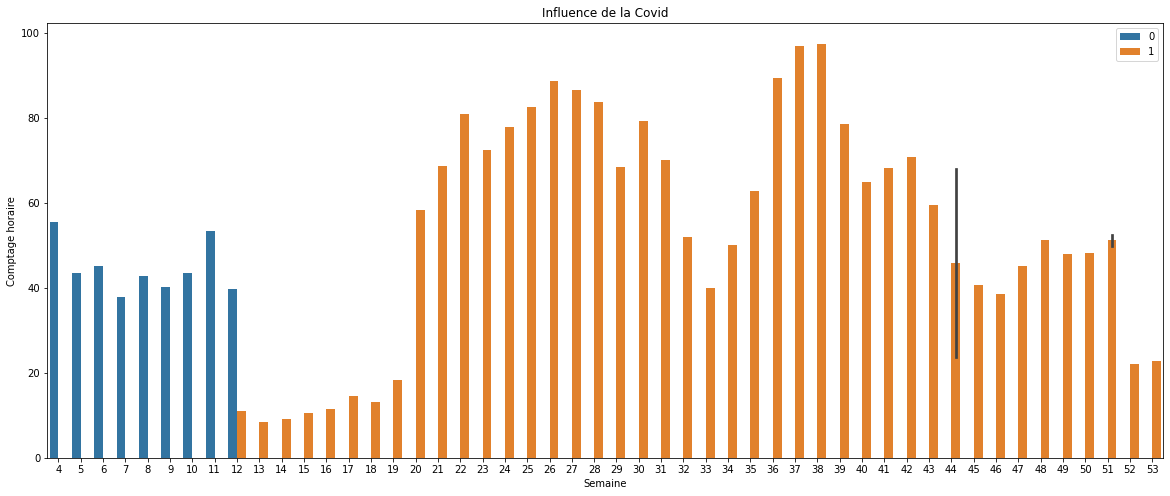

In [84]:
#PERIODE COVID 
df['Semaine'] = df['Date et heure de comptage'].dt.week

covid_df = df[(df.Semaine >=4) & (df.Année == 2020)].groupby(['Semaine', 'Covid', 'Confinement'], as_index = False).agg({'Comptage horaire':'mean'})
covid_df

plt.figure(figsize = (20,8))
sns.barplot(x = 'Semaine', y ='Comptage horaire', data = covid_df, hue = 'Covid')
plt.legend()
plt.title("Influence de la Covid") 
plt.xticks(rotation = 0)
plt.show();

> Comme nous l’avons vu précédemment, le trafic chute brutalement lors du premier confinement, avant de rebondir et d’atteindre des sommets durant l’été 2020. \
\
> Regardons les chiffres avant et pendant la pandémie. Nous avons exclu la période de grève (décembre 2019 / janvier 2020).

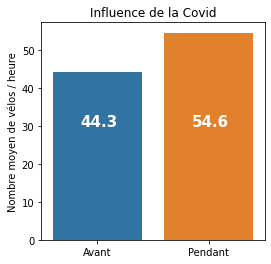

In [85]:
covid_df2 = df[((df.Semaine < 49) & (df.Année == 2019)) | ((df.Semaine >= 4) & (df.Année == 2020))]
covid_df2 = covid_df2.groupby(['Covid'], as_index = False).agg({'Comptage horaire':'mean'})

plt.figure(figsize = (4, 4))
sns.barplot(x = covid_df2.index, y = covid_df2['Comptage horaire'])
plt.ylabel('Nombre moyen de vélos / heure')
plt.xticks(range(2), ['Avant', 'Pendant'])
plt.title('Influence de la Covid')
plt.text(-0.15, 30, covid_df2['Comptage horaire'][0].round(1), fontsize=15, color="white", weight="bold")
plt.text(0.85, 30, covid_df2['Comptage horaire'][1].round(1), fontsize=15, color="white", weight="bold");

> Après le début de la pandémie, le trafic moyen a augmenté de 24%. Pourtant il y a eu 3 mois ½ de confinement sur cette période. Quel a été leur effet ?

<ipython-input-86-9424614a32a4>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['Semaine'] = df['Date et heure de comptage'].dt.week


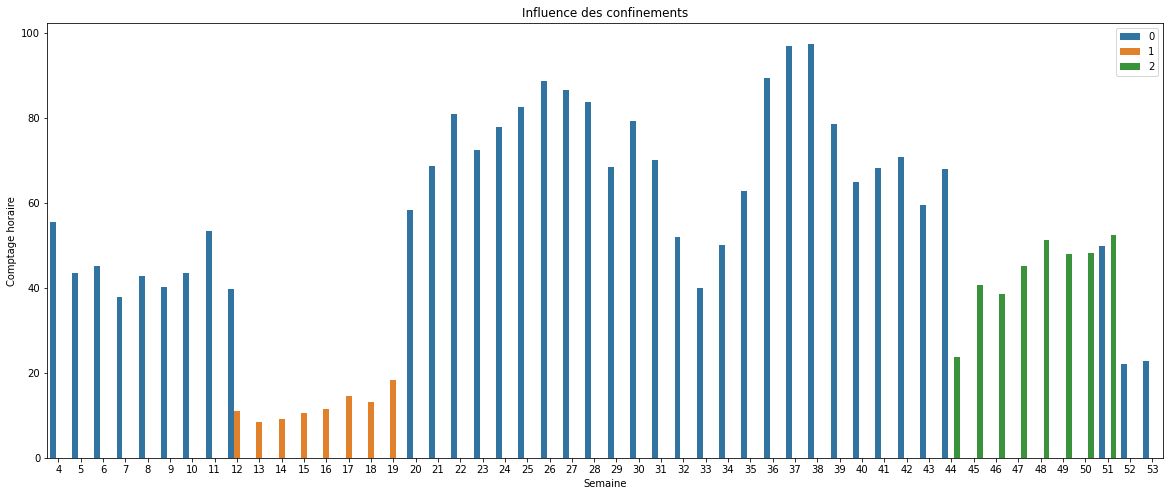

In [86]:
#DECONFINEMENT 
df['Semaine'] = df['Date et heure de comptage'].dt.week

covid_df = df[(df.Semaine >=4) & (df.Année == 2020)].groupby(['Semaine', 'Covid', 'Confinement'], as_index = False).agg({'Comptage horaire':'mean'})
covid_df

plt.figure(figsize = (20,8))
sns.barplot(x = 'Semaine', y ='Comptage horaire', data = covid_df, hue = 'Confinement')
plt.legend()
plt.title("Influence des confinements") 
plt.xticks(rotation = 0)
plt.show();

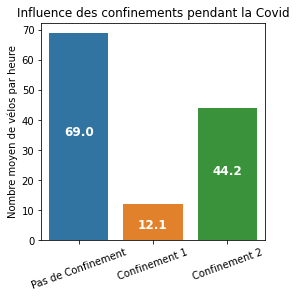

In [87]:
confinement_df2 = df[(df.Semaine >= 12) & (df.Année == 2020)].groupby(['Confinement'], as_index = False).agg({'Comptage horaire':'mean'})

plt.figure(figsize = (4, 4))
sns.barplot(x=confinement_df2.index, y=confinement_df2['Comptage horaire'])

plt.ylabel('Nombre moyen de vélos par heure')
plt.xticks(range(3), ['Pas de Confinement', 'Confinement 1', 'Confinement 2'], rotation = 20)
plt.title('Influence des confinements pendant la Covid')
plt.text(-0.2, 35, confinement_df2['Comptage horaire'][0].round(1), fontsize=12, color="white", weight="bold")
plt.text(0.8, 4, confinement_df2['Comptage horaire'][1].round(1), fontsize=12, color="white", weight="bold")
plt.text(1.8, 22, confinement_df2['Comptage horaire'][2].round(1), fontsize=12, color="white", weight="bold");

> Les deux confinements n’ont pas du tout eu le même effet. Lors du premier confinement, le trafic moyen a chuté de 83% contre 34% pour le deuxième. En effet, celui-ci était moins sévère, avec les écoles ouvertes, mais aussi moins respecté.

## 2.9. BILAN

> Sur cette période de 16 mois (septembre 2019 à décembre 2020), riche en rebondissements, voici les chiffres à retenir sur l’évolution du trafic cycliste à Paris.
>
> Ce qui provoque une hausse :
>- La grève des transports : + 50 %
>- Le beau temps : + 48 %
>- La pandémie : + 24 %
>
>
> Ce qui provoque une baisse :
>- Un confinement strict : - 83 %
>- Les vacances de Noël : - 57 % (- 33 % pour celles de février)
>- Un jour férié : - 54 %
>- Un week-end :  - 40% le dimanche, - 25% le samedi
>- Un confinement peu strict : - 34 % 
>- La pluie : - 33 %
>- Des températures inférieures à 4° : - 28 %
>
> En conclusion, sur cette période le facteur le plus pérenne est la crise du Covid avec pour effet un bon de 24%, en moyenne, du trafic cycliste à Paris. Il est dû à la convergence de plusieurs phénomènes : 
>
> - Les nouvelles règles sanitaires ont imposé d’éviter au maximum les transports en commun. 
> - A partir de mi-mai (1er déconfinement), la Mairie de Paris a créé ou réaménagé une cinquantaine de kilomètres de pistes cyclables “temporaires” encore en place à la date de ce rapport. Les efforts ont porté en particulier sur les axes Nord/Sud (ligne 4) et Est/Ouest (ligne 1). La mesure la plus exceptionnelle a été l’interdiction pour les voitures de circuler sur la rue de Rivoli, pourtant axe majeur du trafic routier à Paris.
> - De nombreuses aides de l’Etat pour faire réparer ou acheter un vélo, notamment électrique.
>
> Nous aimerions à présent étudier l’impact que cela a pu avoir sur le nombre, voire le type, d’accidents impliquant des cyclistes. Nous avons à cette fin trouvé un jeu de données complémentaire.

# 3. BASE DE DONNEES ACCIDENTS 2019

> Les dernières données à jour et libres de droits portent sur l’année 2019. Comme il y a eu une forte augmentation du trafic en décembre 2019 avec la grève des transports, il est intéressant d’étudier les liens trafic / accidents de cyclistes à Paris sur la période septembre - décembre 2019.

## 3.1. EXPLORATION ET TRAITEMENT DES DONNEES

In [88]:
#lecture des 4 tables nécessaires à l'analyse
df_car = pd.read_csv('caracteristiques-2019.csv', sep =';')
df_ve = pd.read_csv('vehicules-2019.csv', sep =';')
df_lieux = pd.read_csv('lieux-2019.csv', sep =';')
df_usag = pd.read_csv('usagers-2019.csv', sep =';')

#création'un df accidents
df_acc = df_ve.merge(df_car, how = 'left', on = 'Num_Acc')
df_acc = df_acc.merge(df_lieux, how = 'left', on = 'Num_Acc')
df_acc = df_acc.merge(df_usag, how = 'left', on = 'Num_Acc')

#Affichage des colonnes du dataset
df_acc.columns

Index(['Num_Acc', 'id_vehicule_x', 'num_veh_x', 'senc', 'catv', 'obs', 'obsm',
       'choc', 'manv', 'motor', 'occutc', 'jour', 'mois', 'an', 'hrmn', 'lum',
       'dep', 'com', 'agg', 'int', 'atm', 'col', 'adr', 'lat', 'long', 'catr',
       'voie', 'v1', 'v2', 'circ', 'nbv', 'vosp', 'prof', 'pr', 'pr1', 'plan',
       'lartpc', 'larrout', 'surf', 'infra', 'situ', 'vma', 'id_vehicule_y',
       'num_veh_y', 'place', 'catu', 'grav', 'sexe', 'an_nais', 'trajet',
       'secu1', 'secu2', 'secu3', 'locp', 'actp', 'etatp'],
      dtype='object')

In [89]:
#sélection des colonnes
df_acc = df_acc[["Num_Acc",
                 "catv",
                 "situ",
                 "adr",
                 "jour",
                 "mois",
                 "an",
                 "dep",
                 "lat",
                 "long",
                 "hrmn",
                 "atm",
                 "grav",
                 "sexe",
                 "an_nais",
                 "trajet"]]

#filtre sur Paris
df_acc = df_acc[df_acc['dep'] == "75"]

#filtre la période sept 2019 à déc 2019 pour pouvoir croise à nos analyse trafic
df_acc = df_acc[df_acc['an'] == 2019]
df_acc = df_acc[df_acc['mois'] >= 9]

#filtre sur les accidents impliquant un vélo
df_acc = df_acc[df_acc["catv"] == 1]

#Vérification présence de valeurs manquantes
df_acc.isna().sum()

Num_Acc    0
catv       0
situ       0
adr        0
jour       0
mois       0
an         0
dep        0
lat        0
long       0
hrmn       0
atm        0
grav       0
sexe       0
an_nais    0
trajet     0
dtype: int64

In [90]:
#Vérification présence de doublons
df_car.duplicated().sum()

0

In [91]:
df_acc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 644 entries, 1933 to 253267
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Num_Acc  644 non-null    int64 
 1   catv     644 non-null    int64 
 2   situ     644 non-null    int64 
 3   adr      644 non-null    object
 4   jour     644 non-null    int64 
 5   mois     644 non-null    int64 
 6   an       644 non-null    int64 
 7   dep      644 non-null    object
 8   lat      644 non-null    object
 9   long     644 non-null    object
 10  hrmn     644 non-null    object
 11  atm      644 non-null    int64 
 12  grav     644 non-null    int64 
 13  sexe     644 non-null    int64 
 14  an_nais  644 non-null    int64 
 15  trajet   644 non-null    int64 
dtypes: int64(11), object(5)
memory usage: 85.5+ KB


In [92]:
#Conversion des données géographiques au format "float"
df_acc.long = df_acc.long.str.replace(',' , '.')
df_acc.long = df_acc.long.apply(float)

df_acc.lat = df_acc.lat.str.replace(',' , '.')
df_acc.lat = df_acc.lat.apply(float)

#Conversion des données catégorielles au format "object"
df_acc["sexe"] = df_acc["sexe"].astype(object)
df_acc["atm"] = df_acc["atm"].astype(object)
df_acc["grav"] = df_acc["grav"].astype(object)
df_acc["trajet"] = df_acc["trajet"].astype(object)

#Création d'une colonne age
df_acc["age"] = 2019 - df_acc["an_nais"]

## 3.2. DATA VISUALISATION

### 3.2.1 Analyse des accidents impliquant des vélos à Paris entre septembre et décembre 2019

#### 3.2.1.1. Par sexe

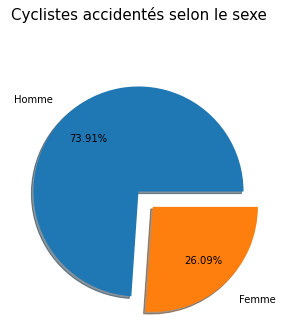

In [93]:
plt.figure(figsize=(16, 6))

#graphe sexe
plt.subplot(1,3,1)
plt.title("Cyclistes accidentés selon le sexe\n\n", fontsize=15)
df_sex = df_acc.groupby('sexe', as_index = False).agg({'sexe':'count'})
plt.pie(x = df_sex.sexe,
        labels = ['Homme', 'Femme'],
        explode = [0, 0.2],
        autopct = lambda x : str(round(x, 2)) + '%',
        pctdistance = 0.7,
        labeldistance = 1.2,
        shadow = True);

> 3/4 des accidentés à vélo sont des hommes contre 1/4 de femmes. Cette proportion est à ramener à la proportion d’hommes et de femmes roulant à vélo. Il serait intéressant de comparer la gravité des accidents en fonction du sexe : 

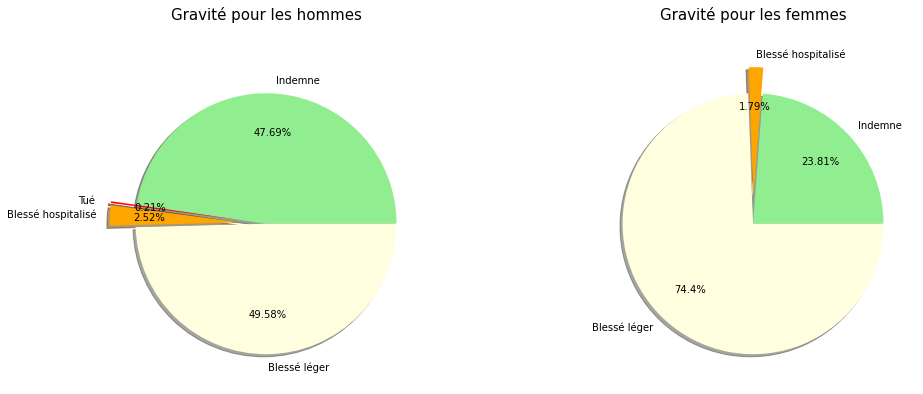

In [94]:
plt.figure(figsize=(16, 6))

#graphe hommes et gravité
plt.subplot(1,2,1)
plt.title("Gravité pour les hommes\n\n", fontsize=15)
df_hom = df_acc[df_acc['sexe'] == 1]
df_hom = df_hom.groupby('grav', as_index = False).agg({'grav':'count'})
plt.pie(x = df_hom.grav,
        labels = ['Indemne ', 'Tué ', 'Blessé hospitalisé', 'Blessé léger'],
        explode = [0, 0.2, 0.2, 0],
        autopct = lambda x : str(round(x, 2)) + '%',
        pctdistance = 0.7,
        labeldistance = 1.1,
        shadow = True,
        colors = ("lightgreen", "red", "orange", "lightyellow"))

#graphe femmes et gravité
plt.subplot(1,2,2)
plt.title("Gravité pour les femmes\n\n", fontsize=15)
df_fem = df_acc[df_acc['sexe'] == 2]
df_fem = df_fem.groupby('grav', as_index = False).agg({'grav':'count'})
plt.pie(x = df_fem.grav,
        labels = ['Indemne ', 'Blessé hospitalisé', 'Blessé léger'],
        explode = [0, 0.2, 0],
        autopct = lambda x : str(round(x, 2)) + '%',
        pctdistance = 0.7,
        labeldistance = 1.1,
        shadow = True,
       colors = ("lightgreen", "orange", "lightyellow"));

> Pour les hommes, il y a environ la moitié des d’accidents sans blessure et une autre moitié avec  blessures légères. Pour les femmes, c’est plutôt 1/4 d’accidents sans blessure et 3/4 avec des blessures légères. Pour les deux, la proportion d'accidents entraînant une hospitalisation est assez faible, d’environ 2%. Sur la période (4 mois), il n’y a eu qu’un seul mort, un homme.

#### 3.2.1.2. Par âge

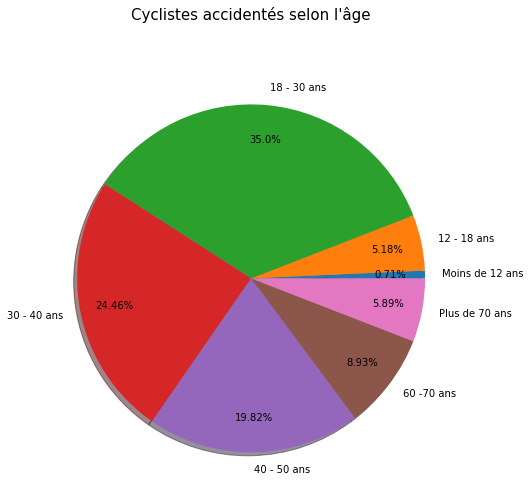

In [95]:
#graphe age
plt.figure(figsize=(8, 8))
#plt.subplot(3,2,2)
plt.title("Cyclistes accidentés selon l'âge\n\n", fontsize=15)
df_age = df_acc.groupby('age', as_index = False).agg({'Num_Acc':'count'})
bins = pd.IntervalIndex.from_tuples([(0, 12), (12, 18), (18, 30), (30, 40), (40, 50), (60,70), (70,150)])
df_age["cat_age"] = pd.cut(df_age["age"], bins)
df_age = df_age.groupby('cat_age', as_index = False).agg({'Num_Acc':'sum'})
plt.pie(x = df_age.Num_Acc,
        labels = ['Moins de 12 ans',
                  '12 - 18 ans',
                  '18 - 30 ans',
                  '30 - 40 ans',
                  '40 - 50 ans',
                  '60 -70 ans',
                  'Plus de 70 ans'],
        explode = [0, 0, 0, 0, 0, 0, 0],
        autopct = lambda x : str(round(x, 2)) + '%',
        pctdistance = 0.8,
        labeldistance = 1.1,
        shadow = True);

>Sans surprise la majorité des accidentés ont entre 18 et 30, ce qui correspond à la tranche d’âge qui roule le plus à vélo. Puis le nombre décroît avec l’âge (et l’utilisation).

#### 3.2.1.3. Selon la nature du trajet

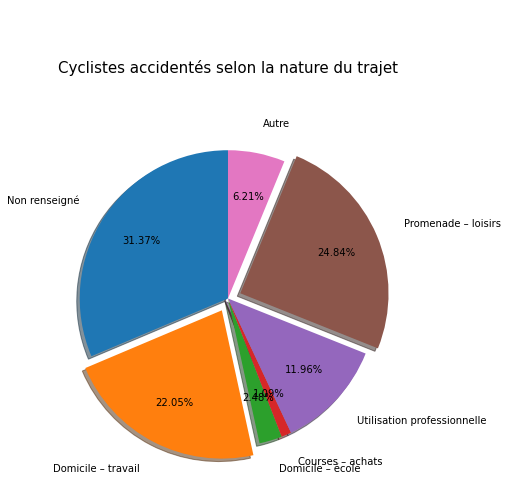

In [96]:
plt.figure(figsize=(32, 15))
#graphe trajet

plt.subplot(2,3,4)
plt.title("\n\n\nCyclistes accidentés selon la nature du trajet\n\n", fontsize=15)
df_traj = df_acc.groupby('trajet', as_index = False).agg({'trajet':'count'})
df_traj.replace(-1, 0)
plt.pie(x = df_traj.trajet,
        labels = ['Non renseigné',
                  'Domicile – travail',
                  'Domicile – école',
                  'Courses – achats ',
                  'Utilisation professionnelle',
                  'Promenade – loisirs',
                  'Autre'],
        explode = [0, 0.09, 0, 0, 0, 0.09, 0],
        autopct = lambda x : str(round(x, 2)) + '%',
        pctdistance = 0.7,
        labeldistance = 1.2,
        shadow = True,
       startangle = 90);

>Avec 1/3 des trajets non renseigné, difficile de conclure, même si les trajets Promenade/loisirs et Domicile-travail semblent largement en tête.

#### 3.2.1.4. Par type de voie

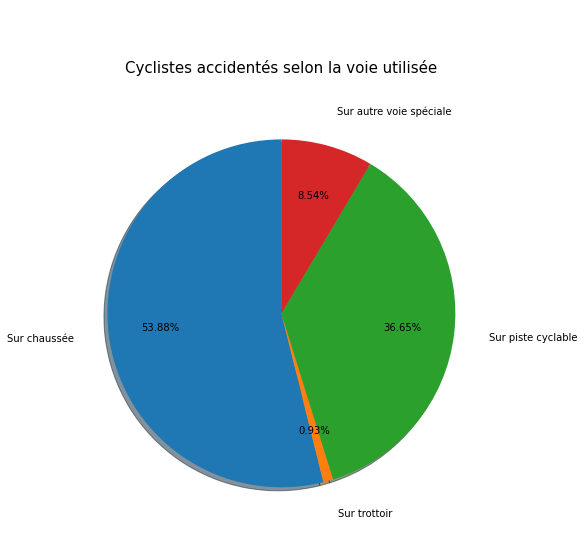

In [97]:
#graphe situation
plt.figure(figsize=(8, 8))
#plt.subplot(2,3,5)
plt.title("\n\n\nCyclistes accidentés selon la voie utilisée\n", fontsize=15)
df_situ = df_acc.groupby('situ', as_index = False).agg({'situ':'count'})
df_situ.replace(-1, 0)
plt.pie(x = df_situ.situ,
        labels = ['Sur chaussée',
                  'Sur trottoir',
                  'Sur piste cyclable',
                  'Sur autre voie spéciale'],
        explode = [0, 0, 0, 0],
        autopct = lambda x : str(round(x, 2)) + '%',
        pctdistance = 0.7,
        labeldistance = 1.2,
        shadow = True,
       startangle = 90);

>Une grosse moitié des accidents a lieu sur la chaussée contre 1/3 sur des pistes cyclables. Ces dernières limiteraient donc les accidents.

#### 3.2.1.5. Selon les conditions météo

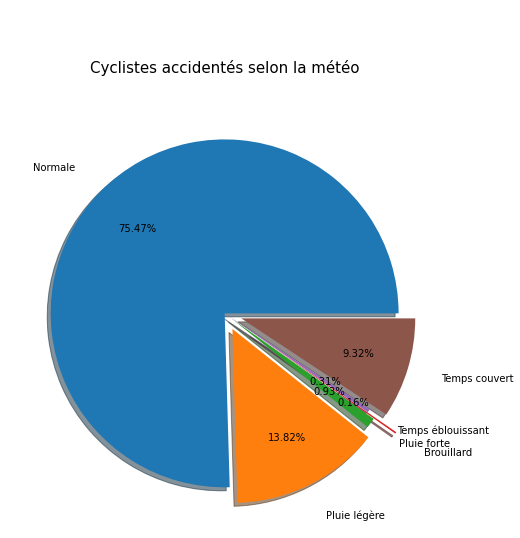

In [183]:
#graphe météo
plt.figure(figsize=(8, 8))
#plt.subplot(2,3,6)
plt.title("\n\n\nCyclistes accidentés selon la météo\n", fontsize=15)
df_atm = df_acc.groupby('atm', as_index = False).agg({'atm':'count'})

plt.pie(x = df_atm.atm,
        labels = ['Normale',
                  'Pluie légère',
                  'Pluie forte',
                  'Brouillard',
                  'Temps éblouissant',
                  'Temps couvert'],
        explode = [0, 0.1, 0.05, 0.2, 0, 0.1],
        autopct = lambda x : str(round(x, 2)) + '%',
        pctdistance = 0.7,
        labeldistance = 1.2,
        shadow = True);

>Les 3/4 des accidents ont lieu sous une météo normale. Le 1/4 restant a lieu sous la pluie ou par temps couvert.

### 3.3 Bilan cartographique

In [99]:
# création d'un nouveau df qui servira à cartographier les accidents impliquant un vélo
plan_acc = df_acc.groupby(['long', 'lat', 'situ', 'adr', 'grav'], as_index = False).agg({'Num_Acc':'count'})
plan_acc["Num_Acc"] = plan_acc["Num_Acc"].astype(int)

In [100]:
# création d'un nouveau df qui servira à cartographier les sites de comptages
# en fonction de leur trafic pour la période de sept 2019 à déc 2019

plan_df_2019 = df[df["Année"] == 2019].groupby(['Identifiant du site de comptage', 
                                                'Nom du site de comptage',
                                                'long',
                                                'lat',
                                                'Lien vers photo du site de comptage'],
                                                as_index = False).agg({'Comptage horaire':'mean'})

# arrondi à l'unité du nombre de comptage moyen pour faciliter l'affichage
plan_df_2019['Comptage horaire'] = plan_df['Comptage horaire'].round(0)
plan_df_2019['Comptage horaire'] = plan_df['Comptage horaire'].astype(int)

In [101]:
# Suppression des doublons sur les url photos

# Remplacement de la 2e url par la 1re :

#liste des identifiants concernés par la modification :
identifiants_doubl = plan_df_2019[plan_df_2019["Identifiant du site de comptage"].duplicated() == True]["Identifiant du site de comptage"].unique()

for i in identifiants_doubl:
    photo1 = plan_df_2019[plan_df_2019["Identifiant du site de comptage"] == i]["Lien vers photo du site de comptage"].unique()[0]
    photo2 = plan_df_2019[plan_df_2019["Identifiant du site de comptage"] == i]["Lien vers photo du site de comptage"].unique()[1]
    plan_df_2019 = plan_df_2019.replace(to_replace = photo2, value = photo1)

plan_df_2019 = plan_df.groupby(['Identifiant du site de comptage', 'Nom du site de comptage', 'long', 'lat', 'Lien vers photo du site de comptage'], as_index = False).agg({'Comptage horaire':'mean'})

In [102]:
# affichage des sites de comptage et des accidents impliquant un vélo sur la carte

carte = folium.Map(location = [48.86, 2.341886], zoom_start = 12, min_zoom=12)

#Affichages des accidents
for latitude, longitude, grav, adr, situ in zip(plan_acc["lat"],
                                                plan_acc["long"],
                                                plan_acc["grav"],
                                                plan_acc["adr"],
                                                plan_acc["situ"]):

    
    if grav == 1:
        couleur = "green"
    elif grav == 4:
        couleur = "green"
    elif grav == 3:
        couleur = "orange"
    elif grav == 2:
        couleur = "red"
    
    
    if situ == 5:
        fc = "#e4de5d"
        rad = 4
    else :
        fc = None
        rad = 2.5

    
        
    folium.CircleMarker(location=[latitude, longitude],
                        radius= rad,
                        color=fc,
                        fill_color=couleur,
                        fill_opacity=1,
                        tooltip= "<strong>" + adr + "</strong>"
                       ).add_to(carte)
carte


#Affichage des sites de comptage
for nom, comptage, latitude, longitude, image in zip(plan_df["Nom du site de comptage"],
                                                     plan_df["Comptage horaire"],
                                                     plan_df["lat"],
                                                     plan_df["long"],
                                                     plan_df["Lien vers photo du site de comptage"]):
    pp = "<strong>" + nom + "</strong>" + "<br>Comptage horaire : " + str(comptage) + "<br><img src='" + image + "', width=100%>"
    folium.CircleMarker(location=[latitude, longitude],
                        radius=comptage/8,
                        popup = folium.Popup(pp, max_width = 300),
                        tooltip= "<strong>" + nom + "</strong>",
                        color="#368fe5",
                        fill_color="#368fe5",
                        fill_opacity=0.3
                       ).add_to(carte)
carte 

>Les données concernent la période de <strong>septembre 2019 à décembre 2019</strong>.
>- Les sites de comptage sont représentés par les cercles bleus. Leur taille est proportionnelle à la moyenne des >comptages horaires pour la période.
>- Les points entourés de jaune correspondent aux accidents impliquant un vélo ayant eu lieu <strong>sur une piste >cyclable</strong>.
>- Les points non cerclés de jaune correspondent aux accidents impliquant un vélo étant survenus <strong>hors piste >cyclable</strong>.
>- Les points verts indiquent les accidents avec cycliste blessé léger
>- Les points oranges indiquent les accidents avec cycliste blessé hospitalisé
>- Les points rouges indiquent les accidents ayant entraîné le décés d'un cycliste

> Les accidents sont plus concentrés au niveau des grands carrefours (Opéra / Saint Lazare, Gare de l'Est, Châtelet) et sur les grands axes (Sébastopol, Convention, Lafayette, Belleville), qui sont pourtant équipés de pistes cyclables. On peut aussi noter le boulevard des Maréchaux dans le sud de Paris. Le nombre d'accidents impliquant des vélos est certainement proportionnel au nombre de voitures et à leur vitesse, plus élevée sur ces grands axes. 
> Il y a eu des accidents un peu partout à Paris, mais on constate que l'est de Paris est plus touché, par rapport aux 7e et 16e arrondissements par exemple, où il y a eu le moins d'accidents. Cela doit sûrement refléter la proportion d'usagers du vélo. A l'est, les quartiers sont plus jeunes et avec plus de lieux de sortie qu'à l'ouest, plus bourgeois et plus institutionnel.

### 3.4. Evolution du nombre d'accidents en fonction du trafic

>Nous avons voulu comparer le nombre d’accidents impliquant des vélos par jour et l'intensité du trafic cycliste (nombre moyen de vélos / heure).

In [103]:
#création d'un df permetant de mettre en relation trafic et nombre d'accidents selon la date
df_date_acc = df_acc.groupby(["jour", "mois", "an"], as_index = False).agg({'Num_Acc':'count'})
df_date_acc["jour_mois"] = df_date_acc["jour"].map(str) + " / " + df_date_acc["mois"].map(str)
df['Date'] = df['Date et heure de comptage'].dt.date
df_jrs_2019 = df[df["Année"] == 2019].groupby(["Date", "Jour", "Année", "Mois"], as_index=False).agg({'Comptage horaire':'mean'})
df_jrs_2019["jour_mois"] = df_jrs_2019["Jour"].map(str) + " / " + df_jrs_2019["Mois"].map(str)
df_jrs_2019 = df_jrs_2019.merge(df_date_acc, how='left', on = 'jour_mois')
df_jrs_2019 = df_jrs_2019.drop(columns = ['jour', 'mois', 'an', 'jour_mois'])
df_jrs_2019 = df_jrs_2019.fillna(0)

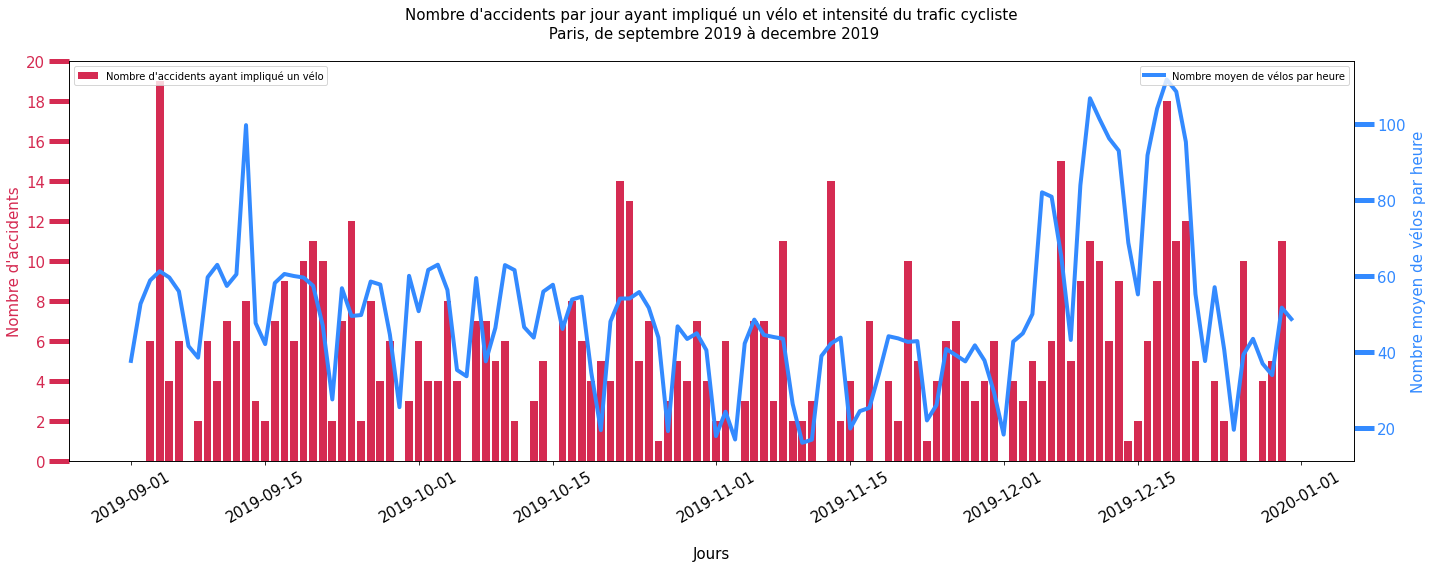

In [104]:
fig = plt.figure(figsize=(20, 8))

ax1 = fig.add_subplot()
ax1.set_xlabel('\nJours', fontsize=15)
ax1.set_ylabel("Nombre d'accidents", color = "#d52b52", fontsize=15)
ax1.bar(df_jrs_2019.Date, df_jrs_2019.Num_Acc, label = "Nombre d'accidents ayant impliqué un vélo", color="#d52b52")
ax1.legend(loc='upper left')
ax1.set_title("Nombre d'accidents par jour ayant impliqué un vélo et intensité du trafic cycliste\n Paris, de septembre 2019 à decembre 2019\n", fontsize=15)
ax1.yaxis.set_tick_params(color = "#d52b52", width = 5, length = 20, labelcolor = "#d52b52", labelsize = 15)
ax1.xaxis.set_tick_params(labelsize = 15, rotation = 30)
ax1.set_yticks(np.arange(0,21,2))

ax2 = ax1.twinx()

ax2.set_ylabel('Nombre moyen de vélos par heure', color = "#338aff", fontsize=15)
ax2.plot(df_jrs_2019.Date, df_jrs_2019['Comptage horaire'], 'b-', linewidth=4, label = "Nombre moyen de vélos par heure", color="#338aff")
ax2.legend(loc='upper right')
ax2.yaxis.set_tick_params(color = "#338aff", width = 5, length = 20, labelcolor = "#338aff", labelsize = 15)


fig.tight_layout()
plt.show()

>Le nombre d’accidents semble, assez logiquement, corrélé à l’intensité du trafic : les creux et pics d’accidents correspondent aux creux et pics d’intensité du trafic. On remarque cependant quelques exceptions :
>- Un pic inexpliqué d’accidents le 2 septembre
>- Le pic de vélos enregistré le 22 septembre n’a pas engendré de hausse des accidents et pour cause : beaucoup de vélos, mais c’est la Journée sans voitures.
>- Mi-septembre et mi-octobre, il semble y avoir une hausse inexpliquée des accidents par rapport à l’intensité du trafic.
>- En décembre, suite à la grève, le nombre de vélo a grimpé, mais les accidents n’ont pas augmenté dans les mêmes proportions.
>
> Regardons en fonction de l’heure de la journée.

In [105]:
#création d'un df permetant de mettre en relation trafic et nombre d'accidents selon l'heure
df_h_acc = df_acc.groupby(["hrmn"], as_index = False).agg({'Num_Acc':'count'})
df_h_acc["Heure"] = df_h_acc["hrmn"].str[:2].astype(int)
df_h_acc = df_h_acc.groupby("Heure").agg({'Num_Acc':'sum'})
df_hrs_2019 = df[df["Année"] == 2019].groupby(["Heure"], as_index=False).agg({'Comptage horaire':'mean'})
df_hrs_2019 = df_hrs_2019.merge(df_h_acc, how='left', on = 'Heure')
df_hrs_2019 = df_hrs_2019.fillna(0)

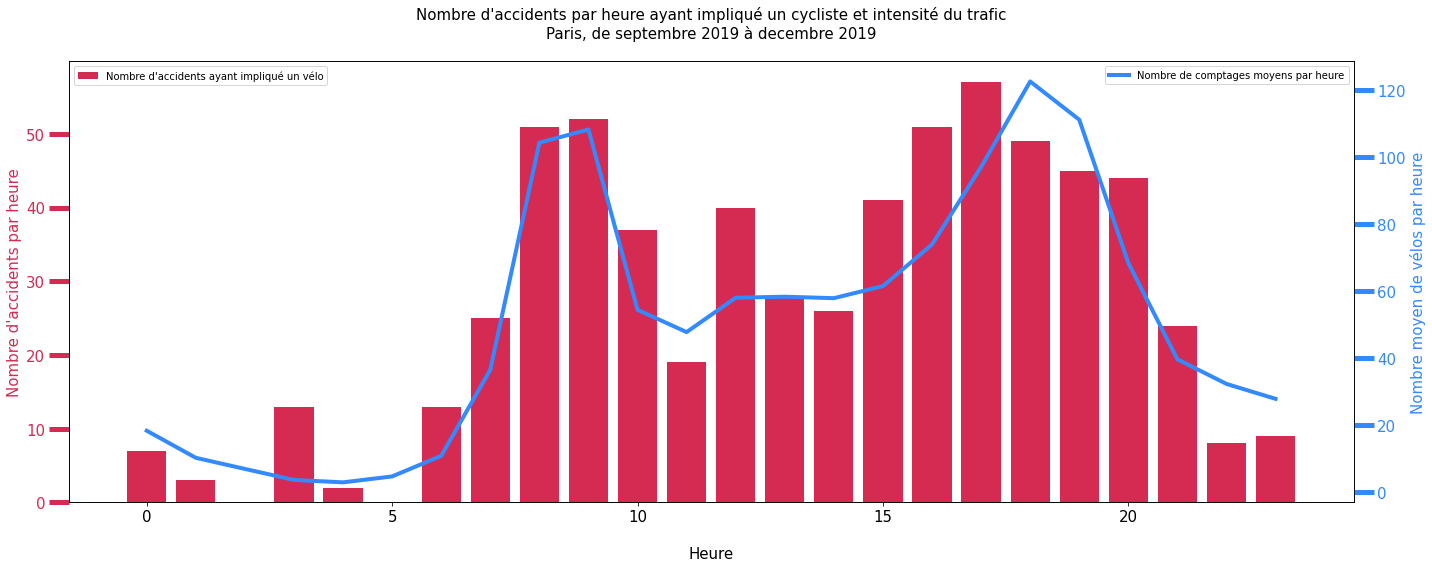

In [106]:
fig = plt.figure(figsize=(20, 8))

ax1 = fig.add_subplot()
ax1.set_xlabel('\nHeure', fontsize=15)
ax1.set_ylabel("Nombre d'accidents par heure", color = "#d52b52", fontsize=15)
ax1.bar(df_hrs_2019.Heure, df_hrs_2019.Num_Acc, label = "Nombre d'accidents ayant impliqué un vélo", color="#d52b52")
ax1.legend(loc='upper left')
ax1.set_title("Nombre d'accidents par heure ayant impliqué un cycliste et intensité du trafic\nParis, de septembre 2019 à decembre 2019\n", fontsize=15)
ax1.yaxis.set_tick_params(color = "#d52b52", width = 5, length = 20, labelcolor = "#d52b52", labelsize = 15)
ax1.xaxis.set_tick_params(labelsize = 15)

ax2 = ax1.twinx()

ax2.set_ylabel('Nombre moyen de vélos par heure', color = "#338aff", fontsize=15)
ax2.plot(df_hrs_2019.Heure, df_hrs_2019['Comptage horaire'], 'b-', linewidth=4, label = "Nombre de comptages moyens par heure", color="#338aff")
ax2.legend(loc='upper right')
ax2.yaxis.set_tick_params(color = "#338aff", width = 5, length = 20, labelcolor = "#338aff", labelsize = 15)


fig.tight_layout()
plt.show()

>Ici encore, les deux tendances se suivent sur les heures creuses et de pointe, avec une exception à 3 heures du matin : l’heure de sortie des bars semble être la plus accidentogène ! Mais nos données ne portent que sur 644 accidents en 4 mois, cette analyse de comptoir est donc sujette à caution ;)
>
>Observons les liens de linéarité entre nombre d’accidents et intensité du trafic.

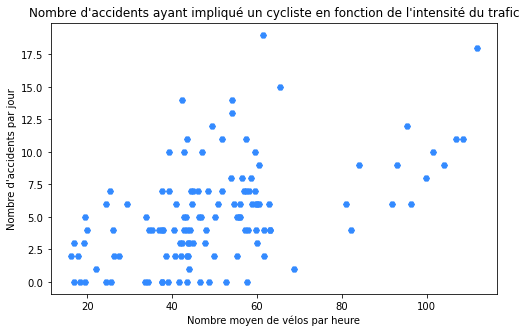

In [107]:
plt.figure(figsize=(8,5))
plt.scatter(df_jrs_2019["Comptage horaire"], df_jrs_2019.Num_Acc, marker = "H", color="#338aff")
plt.xlabel('Nombre moyen de vélos par heure')
plt.ylabel("Nombre d'accidents par jour")
plt.title("Nombre d'accidents ayant impliqué un cycliste en fonction de l'intensité du trafic");

In [108]:
print("Moyenne des comptages horaires sur la période = df_jrs_2019 = ", df_jrs_2019["Comptage horaire"].mean())
print("Médiane des comptages horaires sur la période = df_jrs_2019 = ", df_jrs_2019["Comptage horaire"].median())

Moyenne des comptages horaires sur la période = df_jrs_2019 =  50.16281338135425
Médiane des comptages horaires sur la période = df_jrs_2019 =  46.67857142857143


> On observe une certaine linéarité entre la densité du trafic et les accidents. Cependant la majorité des accidents interviennent lorsque le nombre de vélos par heure est compris entre 40 et 60, soit autour de la moyenne. Au-delà de 60 vélos par heure, le nombre d'accidents ne semble pas augmenter. Regardons par heure.

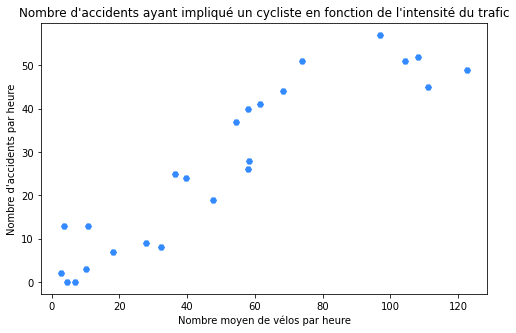

In [109]:
plt.figure(figsize=(8,5))
plt.scatter(df_hrs_2019["Comptage horaire"], df_hrs_2019.Num_Acc, marker = "H", color="#338aff")
plt.xlabel('Nombre moyen de vélos par heure')
plt.ylabel("Nombre d'accidents par heure")
plt.title("Nombre d'accidents ayant impliqué un cycliste en fonction de l'intensité du trafic");

> La linéarité est ici plus flagrante. Vérifions la dépendance statistique entre les deux variables.

### 3.5. Test ANOVA entre le trafic et le nombre d'accidents

In [110]:
# ANOVA entre le trafic (Comptage horaire) et le nombre d'accidents par heure

df_hrs_2019 = df_hrs_2019.rename({'Comptage horaire' : 'Comptage_horaire'}, axis = 1)

result = statsmodels.formula.api.ols('Num_Acc ~ Comptage_horaire', data = df_hrs_2019).fit()
table = statsmodels.api.stats.anova_lm(result)
display(table)

# La p-value (PR(>F) = 1.651967e-10) est inférieure à 5%, donc on rejette l'hypothèse selon laquelle
# l'intensité du trafic n'influe pas sur le nombre d'accidents par heure.

df_jrs_2019 = df_jrs_2019.rename({'Comptage_horaire' : 'Comptage horaire'}, axis = 1)

df       sum_sq      mean_sq           F        PR(>F)
Comptage_horaire   1.0  7179.244037  7179.244037  123.965698  1.651967e-10
Residual          22.0  1274.089296    57.913150         NaN           NaN

## CONCLUSION

> Avec la hausse du trafic cycliste observée à Paris suite au Covid, le nombre d'accidents devrait selon toute logique augmenter. Retenons que lors du pic d’usagers pendant la grève, le nombre d’accidents a moins augmenté qu’attendu. Cette analyse sera à affiner quand les données 2020 seront disponibles.


 # 4. MACHINE LEARNING 

> Dans cette partie nous allons nous atteler à créer un modèle de prédiction du comptage horaire par site.
>
> - La tâche consiste à prédire le comptage horaire (variable cible) à partir de variables explicatives.
> -  La variable cible est numérique. Le type de modèle sera donc une régression linéaire. 
> - Pour évaluer la performance de nos modèles, nous utiliserons les métriques R2 et RMSE.
> - Nous comparerons également les prédictions aux données réelles sur des graphiques.

In [111]:
import scipy.stats as stats
import seaborn as sns

from sklearn import model_selection, preprocessing
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression, SelectFromModel
from sklearn.model_selection import train_test_split

from datetime import timedelta

## 4.1. PREMIER ESSAI

> Pour ses vertus pédagogiques uniquement, nous vous remettons ici notre tout premier essai, qui était très peu concluant, mais duquel nous avons beaucoup appris ;)

In [112]:
df.columns

Index(['Date', 'Identifiant du compteur', 'Nom du compteur',
       'Identifiant du site de comptage', 'Nom du site de comptage',
       'Comptage horaire', 'Date et heure de comptage',
       'Date d'installation du site de comptage',
       'Lien vers photo du site de comptage', 'Coordonnées géographiques',
       'Année', 'Mois', 'Jour', 'Semaine', 'Jour_de_la_semaine', 'Heure',
       'Grève', 'Covid', 'Confinement', 'Jour_férié', 'Vacances', 'vac_noel',
       'vac_fevrier', 'vac_printemps', 'vac_ascension', 'vac_juillet',
       'vac_aout', 'vac_toussaint', 'Pluie', 'Froid', 'Chaud', 'lat', 'long',
       'Weekend', 'sam_dim'],
      dtype='object')

In [113]:
# sélection des variables utiles
variables_utiles = ['Date et heure de comptage',
                    'Identifiant du site de comptage',
                    'Nom du site de comptage',
                    'Année', 
                    'Mois', 
                    'Jour', 
                    'Semaine', 
                    'Jour_de_la_semaine', 
                    'Heure', 
                    'Grève', 
                    'Covid', 
                    'Confinement', 
                    'Jour_férié', 
                    'Vacances', 
                    'vac_fevrier',
                    'vac_printemps',
                    'vac_ascension',
                    'vac_juillet',
                    'vac_aout', 
                    'vac_toussaint', 
                    'vac_noel', 
                    'Pluie', 
                    'Froid', 
                    'Chaud',
                    'lat',
                    'long', 
                    'Weekend',
                    'sam_dim']

In [114]:
df = df.rename({'Comptage horaire' : 'Comptage_horaire'}, axis = 1)
df_ml = df.groupby(variables_utiles, as_index = False).agg({'Comptage_horaire' :'sum'})

In [115]:
df_ml.head()

Date et heure de comptage Identifiant du site de comptage  \
0       2019-09-01 03:00:00                       100003096   
1       2019-09-01 03:00:00                       100003097   
2       2019-09-01 03:00:00                       100003098   
3       2019-09-01 03:00:00                       100003099   
4       2019-09-01 03:00:00                       100006300   

              Nom du site de comptage  Année  Mois  Jour  Semaine  \
0   97 avenue Denfert Rochereau SO-NE   2019     9     1       35   
1              105 rue La Fayette E-O   2019     9     1       35   
2  106 avenue Denfert Rochereau NE-SO   2019     9     1       35   
3              100 rue La Fayette O-E   2019     9     1       35   
4          135 avenue Daumesnil SE-NO   2019     9     1       35   

   Jour_de_la_semaine  Heure  Grève  ...  vac_toussaint  vac_noel  Pluie  \
0                   6      3      0  ...              0         0      0   
1                   6      3      0  ...              0         0      0   
2                   6      3      0  ...              0         0      0   
3                   6      3      0  ...              0         0      0   
4                   6      3      0  ...              0         0      0   

   Froid  Chaud        lat      long  Weekend  sam_dim  Comptage_horaire  
0      0      0  48.835110  2.333380        1        2                 0  
1      0      0  48.877667  2.350556        1        2                18  
2      0      0  48.835210  2.333070        1        2                15  
3      0      0  48.877460  2.350080        1        2                 7  
4      0      0  48.843435  2.383378        1        2                 2  

[5 rows x 29 columns]

In [116]:
# Tri par ordre chronologique
df_ml = df_ml.sort_values(by = ['Année', 'Mois', 'Jour', 'Heure'])

In [117]:
# On standardise toutes les données => aucune différence avec ou sans standardisation
#df_ml_essai[df_ml_essai.columns] = pd.DataFrame(preprocessing.StandardScaler().fit_transform(df_ml_essai))
#df_ml_essai.head()

In [118]:
# Création des ensembles 'train' et 'test'
data = df_ml.drop(columns = ['Comptage_horaire', 'Date et heure de comptage','Identifiant du site de comptage', 'Nom du site de comptage'])
target = df_ml['Comptage_horaire']
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, shuffle = False)

In [119]:
# Modèle de régression linéaire multiple
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [120]:
# Evaluation
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)
print("score R² train = ", lr.score(X_train, y_train), " / score R² test = ", lr.score(X_test, y_test))
print("rmse train = ", np.sqrt(mean_squared_error(y_train, pred_train)), " / rmse test = ", np.sqrt(mean_squared_error(y_test, pred_test)))

score R² train =  0.17421393193932844  / score R² test =  -0.590883053589345
rmse train =  108.48423302927841  / rmse test =  134.5479352006782


>Les scores (R² train/test = 0.17 / -0.59 - rmse train/test =  108.5 / 134.5) étaient très mauvais pour plusieurs raisons :
> - Nous n'avions pas de véritables variables explicatives numériques, nécessaires à un modèle de RL. A part les variables temporelles, toutes les variables sont catégorielles : vacances, Covid, Confinement etc.
> - La régression linéaire suppose des relations linéaires entre variables explicatives et cible. Ce qui n’était pas le cas ici, comme un pairplot nous l’a montré.
> - Les variables avaient très peu de corrélation avec la variable cible, comme nous l’a prouvé une heatmap.
> - La période choisie (16 mois, dont 20% en test), peut-être trop longue.

> Forts de ce premier échec, nous avons décidé :
> - De créer 10 variables explicatives numériques: Comptage horaire à Heure -1, -2, -3, Jour -1, -2, -3, Semaine -1, -2, -3, -4
> - De tester des modèles sur chaque mois : apprentissage jusqu'au 23 et prédictions à partir du 24.
> - Qu'il n'était ps utile de standardiser les données, d'autant que les variables crées sont toutes des comptages horaires, donc du même ordre que la varible cible.

## 4.2. Ajout des variables numériques

>Les étapes pour chaque variable :
> - création d'une fonction pour atteindre l'heure -1 etc.
> - ajout de la variable date/heure heure-1
> - création d'un df h-1 en ne conservant que "date et heure de comptage" et "comptage horaire"
> - renommer la colonne 'Comptage_horaire' en 'Comptage_horaire_h_1'
> - suppression des colonnes inutiles
> - fusion des df
> - suppression de la colonne "h-1"
> - remplacement des valeurs manquantes par 0*
> -mise au format "int" de "Comptage_horaire_h_1"
> \
>
>*Durant la période, certains sites apparaissent (création) et disparaissent (travaux, pannes). La moitié des 69 sites ne sont pas présents sur les 15 mois.
> - Pour les sites présents sur toute la période, nous avons “réservé” septembre 2019 comme historique des variables (qui remontent sur 4 semaines). Les modèles ne seront entraînés qu’à partir d’octobre 2019.
> - Pour les sites qui ont été ajoutés plus tard, nous avons pris le parti de remplacer les valeurs manquantes créées (puisque l’historique n’existe pas) par des 0. Après des tests de prédiction, cela ne semblait pas gêner le modèle. 

### Ajout de la variable heure-1

In [121]:
#création d'une fonction pour atteidre l'heure-1
def date_h_1 (date):
    h_1 = date - timedelta(hours = 1)
    return h_1


#ajout de la variable date/heure heure-1
df_ml["h_1"] = df_ml["Date et heure de comptage"].apply(date_h_1)
df_ml["h_1"] = df_ml["h_1"].map(str) + " " + df_ml["Identifiant du site de comptage"].map(str)


# création d'un df h-1 en ne conservant que "date et heure de comptage" et "comptage horaire"
df_h_1 = df_ml[["Date et heure de comptage", "Comptage_horaire", "Identifiant du site de comptage"]]
df_h_1["h_1"] = df_h_1["Date et heure de comptage"].map(str) + " " + df_h_1["Identifiant du site de comptage"].map(str)

# Renommer la colonne 'Comptage_horaire' en 'Comptage_horaire_h_1'
df_h_1.rename(columns={'Comptage_horaire': 'Comptage_horaire_h_1'}, inplace=True)

# Suppression des colonnes inutiles
df_h_1.drop(columns = ['Date et heure de comptage', 'Identifiant du site de comptage'], inplace=True)

#fusion des df
df_ml = df_ml.merge(right = df_h_1, on = "h_1", how = "left")

#suppression de la colonne "h-1"
df_ml.drop(columns = 'h_1', inplace = True)

#remplacement des valeurs manquantes par 0
df_ml = df_ml.fillna(0)

#mise au format "int" de "Comptage_horaire_h_1"
df_ml['Comptage_horaire_h_1'] = df_ml['Comptage_horaire_h_1'].astype(int)

<ipython-input-121-be1eacb52e1d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_h_1["h_1"] = df_h_1["Date et heure de comptage"].map(str) + " " + df_h_1["Identifiant du site de comptage"].map(str)
/Users/cynthialaboureau/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/Users/cynthialaboureau/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in 

### Ajout de la variable heure-2

In [122]:
#création d'une fonction pour atteidre l'heure-2
def date_h_2 (date):
    h_2 = date - timedelta(hours = 2)
    return h_2

#ajout de la variable date/heure heure-2
df_ml["h_2"] = df_ml["Date et heure de comptage"].apply(date_h_2)
df_ml["h_2"] = df_ml["h_2"].map(str) + " " + df_ml["Identifiant du site de comptage"].map(str)

# création d'un df h-2 en ne conservant que "date et heure de comptage" et "comptage horaire"
df_h_2 = df_ml[["Date et heure de comptage", "Comptage_horaire", "Identifiant du site de comptage"]]

df_h_2["h_2"] = df_h_2["Date et heure de comptage"].map(str) + " " + df_h_2["Identifiant du site de comptage"].map(str)

# Renommer la colonne 'Comptage_horaire' en 'Comptage_horaire_h_2'
df_h_2.rename(columns={'Comptage_horaire': 'Comptage_horaire_h_2'}, inplace=True)

# Suppression des colonnes inutiles
df_h_2.drop(columns = ['Date et heure de comptage', 'Identifiant du site de comptage'], inplace=True)

#fusion des df
df_ml = df_ml.merge(right = df_h_2, on = "h_2", how = "left")

#suppression de la colonne "h-2"
df_ml.drop(columns = 'h_2', inplace = True)

#remplacement des valeurs manquantes par 0
df_ml = df_ml.fillna(0)

#mise au format "int" de "Comptage_horaire_h_2"
df_ml['Comptage_horaire_h_2'] = df_ml['Comptage_horaire_h_2'].astype(int)

<ipython-input-122-59f6643adec4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_h_2["h_2"] = df_h_2["Date et heure de comptage"].map(str) + " " + df_h_2["Identifiant du site de comptage"].map(str)


### Ajout de la variable heure-3

In [123]:
#création d'une fonction pour atteidre l'heure-3
def date_h_3 (date):
    h_3 = date - timedelta(hours = 3)
    return h_3

#ajout de la variable date/heure heure-3
df_ml["h_3"] = df_ml["Date et heure de comptage"].apply(date_h_3)
df_ml["h_3"] = df_ml["h_3"].map(str) + " " + df_ml["Identifiant du site de comptage"].map(str)

# création d'un df h-3 en ne conservant que "date et heure de comptage" et "comptage horaire"
df_h_3 = df_ml[["Date et heure de comptage", "Comptage_horaire", "Identifiant du site de comptage"]]

df_h_3["h_3"] = df_h_3["Date et heure de comptage"].map(str) + " " + df_h_3["Identifiant du site de comptage"].map(str)

# Renommer la colonne 'Comptage_horaire' en 'Comptage_horaire_h_3'
df_h_3.rename(columns={'Comptage_horaire': 'Comptage_horaire_h_3'}, inplace=True)

# Suppression des colonnes inutiles
df_h_3.drop(columns = ['Date et heure de comptage', 'Identifiant du site de comptage'], inplace=True)

#fusion des df
df_ml = df_ml.merge(right = df_h_3, on = "h_3", how = "left")

#suppression de la colonne "h-3"
df_ml.drop(columns = 'h_3', inplace = True)

#remplacement des valeurs manquantes par 0
df_ml = df_ml.fillna(0)

#mise au format "int" de "Comptage_horaire_h_3"
df_ml['Comptage_horaire_h_3'] = df_ml['Comptage_horaire_h_3'].astype(int)

<ipython-input-123-d2fc1c51eb5e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_h_3["h_3"] = df_h_3["Date et heure de comptage"].map(str) + " " + df_h_3["Identifiant du site de comptage"].map(str)


### Ajout de la variable j-1

In [124]:
#création d'une fonction pour atteidre la semaine-1
def date_j_1 (date):
    j_1 = date - timedelta(days = 1)
    return j_1

#ajout de la variable date/heure semaine-1
df_ml["j_1"] = df_ml["Date et heure de comptage"].apply(date_j_1)
df_ml["j_1"] = df_ml["j_1"].map(str) + " " + df_ml["Identifiant du site de comptage"].map(str)

# création d'un df j-1 en ne conservant que "date et heure de comptage" et "comptage horaire"
df_j_1 = df_ml[["Date et heure de comptage", "Comptage_horaire", "Identifiant du site de comptage"]]

df_j_1["j_1"] = df_j_1["Date et heure de comptage"].map(str) + " " + df_j_1["Identifiant du site de comptage"].map(str)

# Renommer la colonne 'Comptage_horaire' en 'Comptage_horaire_j_1'
df_j_1.rename(columns={'Comptage_horaire': 'Comptage_horaire_j_1'}, inplace=True)

# Suppression des colonnes inutiles
df_j_1.drop(columns = ['Date et heure de comptage', 'Identifiant du site de comptage'], inplace=True)

#fusion des df
df_ml = df_ml.merge(right = df_j_1, on = "j_1", how = "left")

#suppression de la colonne "j-1"
df_ml.drop(columns = 'j_1', inplace = True)

#remplacement des valeurs manquantes par 0
df_ml = df_ml.fillna(0)

#mise au format "int" de "Comptage_horaire_j_1"
df_ml['Comptage_horaire_j_1'] = df_ml['Comptage_horaire_j_1'].astype(int)

<ipython-input-124-5f532a10b27a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_j_1["j_1"] = df_j_1["Date et heure de comptage"].map(str) + " " + df_j_1["Identifiant du site de comptage"].map(str)


### Ajout de la variable j-2

In [125]:
#création d'une fonction pour atteidre la jour-2
def date_j_2 (date):
    j_2 = date - timedelta(days = 2)
    return j_2

#ajout de la variable date/heure jour-2
df_ml["j_2"] = df_ml["Date et heure de comptage"].apply(date_j_2)
df_ml["j_2"] = df_ml["j_2"].map(str) + " " + df_ml["Identifiant du site de comptage"].map(str)

# création d'un df j-2 en ne conservant que "date et heure de comptage" et "comptage horaire"
df_j_2 = df_ml[["Date et heure de comptage", "Comptage_horaire", "Identifiant du site de comptage"]]

df_j_2["j_2"] = df_j_2["Date et heure de comptage"].map(str) + " " + df_j_2["Identifiant du site de comptage"].map(str)

# Renommer la colonne 'Comptage_horaire' en 'Comptage_horaire_j_2'
df_j_2.rename(columns={'Comptage_horaire': 'Comptage_horaire_j_2'}, inplace=True)

# Suppression des colonnes inutiles
df_j_2.drop(columns = ['Date et heure de comptage', 'Identifiant du site de comptage'], inplace=True)

#fusion des df
df_ml = df_ml.merge(right = df_j_2, on = "j_2", how = "left")

#suppression de la colonne "j-2"
df_ml.drop(columns = 'j_2', inplace = True)

#remplacement des valeurs manquantes par 0
df_ml = df_ml.fillna(0)

#mise au format "int" de "Comptage_horaire_j_2"
df_ml['Comptage_horaire_j_2'] = df_ml['Comptage_horaire_j_2'].astype(int)

<ipython-input-125-7be7f6351667>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_j_2["j_2"] = df_j_2["Date et heure de comptage"].map(str) + " " + df_j_2["Identifiant du site de comptage"].map(str)


### Ajout de la variable j-3

In [126]:
#création d'une fonction pour atteidre jour-3

def date_j_3 (date):
    j_3 = date - timedelta(days = 3)
    return j_3

#ajout de la variable date/heure jour-3
df_ml["j_3"] = df_ml["Date et heure de comptage"].apply(date_j_3)
df_ml["j_3"] = df_ml["j_3"].map(str) + " " + df_ml["Identifiant du site de comptage"].map(str)

# création d'un df j-3 en ne conservant que "date et heure de comptage" et "comptage horaire"
df_j_3 = df_ml[["Date et heure de comptage", "Comptage_horaire", "Identifiant du site de comptage"]]

df_j_3["j_3"] = df_j_3["Date et heure de comptage"].map(str) + " " + df_j_3["Identifiant du site de comptage"].map(str)

# Renommer la colonne 'Comptage_horaire' en 'Comptage_horaire_j_3'
df_j_3.rename(columns={'Comptage_horaire': 'Comptage_horaire_j_3'}, inplace=True)

# Suppression des colonnes inutiles
df_j_3.drop(columns = ['Date et heure de comptage', 'Identifiant du site de comptage'], inplace=True)

#fusion des df
df_ml = df_ml.merge(right = df_j_3, on = "j_3", how = "left")

#suppression de la colonne "j-3"
df_ml.drop(columns = 'j_3', inplace = True)

#remplacement des valeurs manquantes par 0
df_ml = df_ml.fillna(0)

#mise au format "int" de "Comptage_horaire_j_3"
df_ml['Comptage_horaire_j_3'] = df_ml['Comptage_horaire_j_3'].astype(int)

<ipython-input-126-0325501985af>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_j_3["j_3"] = df_j_3["Date et heure de comptage"].map(str) + " " + df_j_3["Identifiant du site de comptage"].map(str)


### Ajout de la variable s-1

In [127]:
#création d'une fonction pour atteidre la semaine-1

def date_s_1 (date):
    s_1 = date - timedelta(days = 7)
    return s_1

#ajout de la variable date/heure jour-3
df_ml["s_1"] = df_ml["Date et heure de comptage"].apply(date_s_1)
df_ml["s_1"] = df_ml["s_1"].map(str) + " " + df_ml["Identifiant du site de comptage"].map(str)

# création d'un df s-1 en ne conservant que "date et heure de comptage" et "comptage horaire"
df_s_1 = df_ml[["Date et heure de comptage", "Comptage_horaire", "Identifiant du site de comptage"]]

df_s_1["s_1"] = df_s_1["Date et heure de comptage"].map(str) + " " + df_s_1["Identifiant du site de comptage"].map(str)

# Renommer la colonne 'Comptage_horaire' en 'Comptage_horaire_s_1'
df_s_1.rename(columns={'Comptage_horaire': 'Comptage_horaire_s_1'}, inplace=True)

# Suppression des colonnes inutiles
df_s_1.drop(columns = ['Date et heure de comptage', 'Identifiant du site de comptage'], inplace=True)

#fusion des df
df_ml = df_ml.merge(right = df_s_1, on = "s_1", how = "left")

#suppression de la colonne "s-1"
df_ml.drop(columns = 's_1', inplace = True)

#remplacement des valeurs manquantes par 0
df_ml = df_ml.fillna(0)

#mise au format "int" de "Comptage_horaire_s_1"
df_ml['Comptage_horaire_s_1'] = df_ml['Comptage_horaire_s_1'].astype(int)

<ipython-input-127-ebc1d32e275c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s_1["s_1"] = df_s_1["Date et heure de comptage"].map(str) + " " + df_s_1["Identifiant du site de comptage"].map(str)


### Ajout de la variable s-2

In [128]:
def date_s_2 (date):
    s_2 = date - timedelta(days = 14)
    return s_2

#ajout de la variable date/heure semaine-2
df_ml["s_2"] = df_ml["Date et heure de comptage"].apply(date_s_2)
df_ml["s_2"] = df_ml["s_2"].map(str) + " " + df_ml["Identifiant du site de comptage"].map(str)

# création d'un df s-2 en ne conservant que "date et heure de comptage" et "comptage horaire"
df_s_2 = df_ml[["Date et heure de comptage", "Comptage_horaire", "Identifiant du site de comptage"]]

df_s_2["s_2"] = df_s_2["Date et heure de comptage"].map(str) + " " + df_s_2["Identifiant du site de comptage"].map(str)

# Renommer la colonne 'Comptage_horaire' en 'Comptage_horaire_s_2'
df_s_2.rename(columns={'Comptage_horaire': 'Comptage_horaire_s_2'}, inplace=True)

# Suppression des colonnes inutiles
df_s_2.drop(columns = ['Date et heure de comptage', 'Identifiant du site de comptage'], inplace=True)

#fusion des df
df_ml = df_ml.merge(right = df_s_2, on = "s_2", how = "left")

#suppression de la colonne "s-2"
df_ml.drop(columns = 's_2', inplace = True)

#remplacement des valeurs manquantes par 0
df_ml = df_ml.fillna(0)

#mise au format "int" de "Comptage_horaire_s_2"
df_ml['Comptage_horaire_s_2'] = df_ml['Comptage_horaire_s_2'].astype(int)

<ipython-input-128-091e23dd8fed>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s_2["s_2"] = df_s_2["Date et heure de comptage"].map(str) + " " + df_s_2["Identifiant du site de comptage"].map(str)


### Ajout de la variable s-3

In [129]:
def date_s_3 (date):
    s_3 = date - timedelta(days = 21)
    return s_3

#ajout de la variable date/heure semaine-3
df_ml["s_3"] = df_ml["Date et heure de comptage"].apply(date_s_3)
df_ml["s_3"] = df_ml["s_3"].map(str) + " " + df_ml["Identifiant du site de comptage"].map(str)

# création d'un df s-1 en ne conservant que "date et heure de comptage" et "comptage horaire"
df_s_3 = df_ml[["Date et heure de comptage", "Comptage_horaire", "Identifiant du site de comptage"]]

df_s_3["s_3"] = df_s_3["Date et heure de comptage"].map(str) + " " + df_s_3["Identifiant du site de comptage"].map(str)

# Renommer la colonne 'Comptage_horaire' en 'Comptage_horaire_s_3'
df_s_3.rename(columns={'Comptage_horaire': 'Comptage_horaire_s_3'}, inplace=True)

# Suppression des colonnes inutiles
df_s_3.drop(columns = ['Date et heure de comptage', 'Identifiant du site de comptage'], inplace=True)

#fusion des df
df_ml = df_ml.merge(right = df_s_3, on = "s_3", how = "left")

#suppression de la colonne "s-3"
df_ml.drop(columns = 's_3', inplace = True)

#remplacement des valeurs manquantes par 0
df_ml = df_ml.fillna(0)

#mise au format "int" de "Comptage_horaire_s_3"
df_ml['Comptage_horaire_s_3'] = df_ml['Comptage_horaire_s_3'].astype(int)

<ipython-input-129-4133000e08ad>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s_3["s_3"] = df_s_3["Date et heure de comptage"].map(str) + " " + df_s_3["Identifiant du site de comptage"].map(str)


### Ajout de la variable s-4

In [130]:
def date_s_4 (date):
    s_4 = date - timedelta(days = 28)
    return s_4

#ajout de la variable date/heure semaine-4
df_ml["s_4"] = df_ml["Date et heure de comptage"].apply(date_s_4)
df_ml["s_4"] = df_ml["s_4"].map(str) + " " + df_ml["Identifiant du site de comptage"].map(str)

# création d'un df s-4 en ne conservant que "date et heure de comptage" et "comptage horaire"
df_s_4 = df_ml[["Date et heure de comptage", "Comptage_horaire", "Identifiant du site de comptage"]]

df_s_4["s_4"] = df_s_4["Date et heure de comptage"].map(str) + " " + df_s_4["Identifiant du site de comptage"].map(str)

# Renommer la colonne 'Comptage_horaire' en 'Comptage_horaire_s_4'
df_s_4.rename(columns={'Comptage_horaire': 'Comptage_horaire_s_4'}, inplace=True)

# Suppression des colonnes inutiles
df_s_4.drop(columns = ['Date et heure de comptage', 'Identifiant du site de comptage'], inplace=True)

#fusion des df
df_ml = df_ml.merge(right = df_s_4, on = "s_4", how = "left")

#suppression de la colonne "s-4"
df_ml.drop(columns = 's_4', inplace = True)

#remplacement des valeurs manquantes par 0
df_ml = df_ml.fillna(0)

#mise au format "int" de "Comptage_horaire_s_4"
df_ml['Comptage_horaire_s_4'] = df_ml['Comptage_horaire_s_4'].astype(int)

<ipython-input-130-f3dcdd485e94>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s_4["s_4"] = df_s_4["Date et heure de comptage"].map(str) + " " + df_s_4["Identifiant du site de comptage"].map(str)


In [131]:
#Suppression du mois de septembre 2019 du df car pas de j-1, j-2, j-3 et s-1, s-2, s-3, s-4

#Ajout d'une colonne "Année_Mois"
df_ml["Année_Mois"] = df_ml["Année"].map(str) + "_" + df_ml["Mois"].map(str)

#Exclusion du df des lignes  pour lesquelles "Année_mois" = "2019_9"
df_ml = df_ml[df_ml["Année_Mois"] != "2019_9"]

#suppression de la colonne "Année_Mois"
df_ml = df_ml.drop(["Année_Mois"], axis=1)

## 4.3. Analyse de la corrélation / linéarité entre les variables

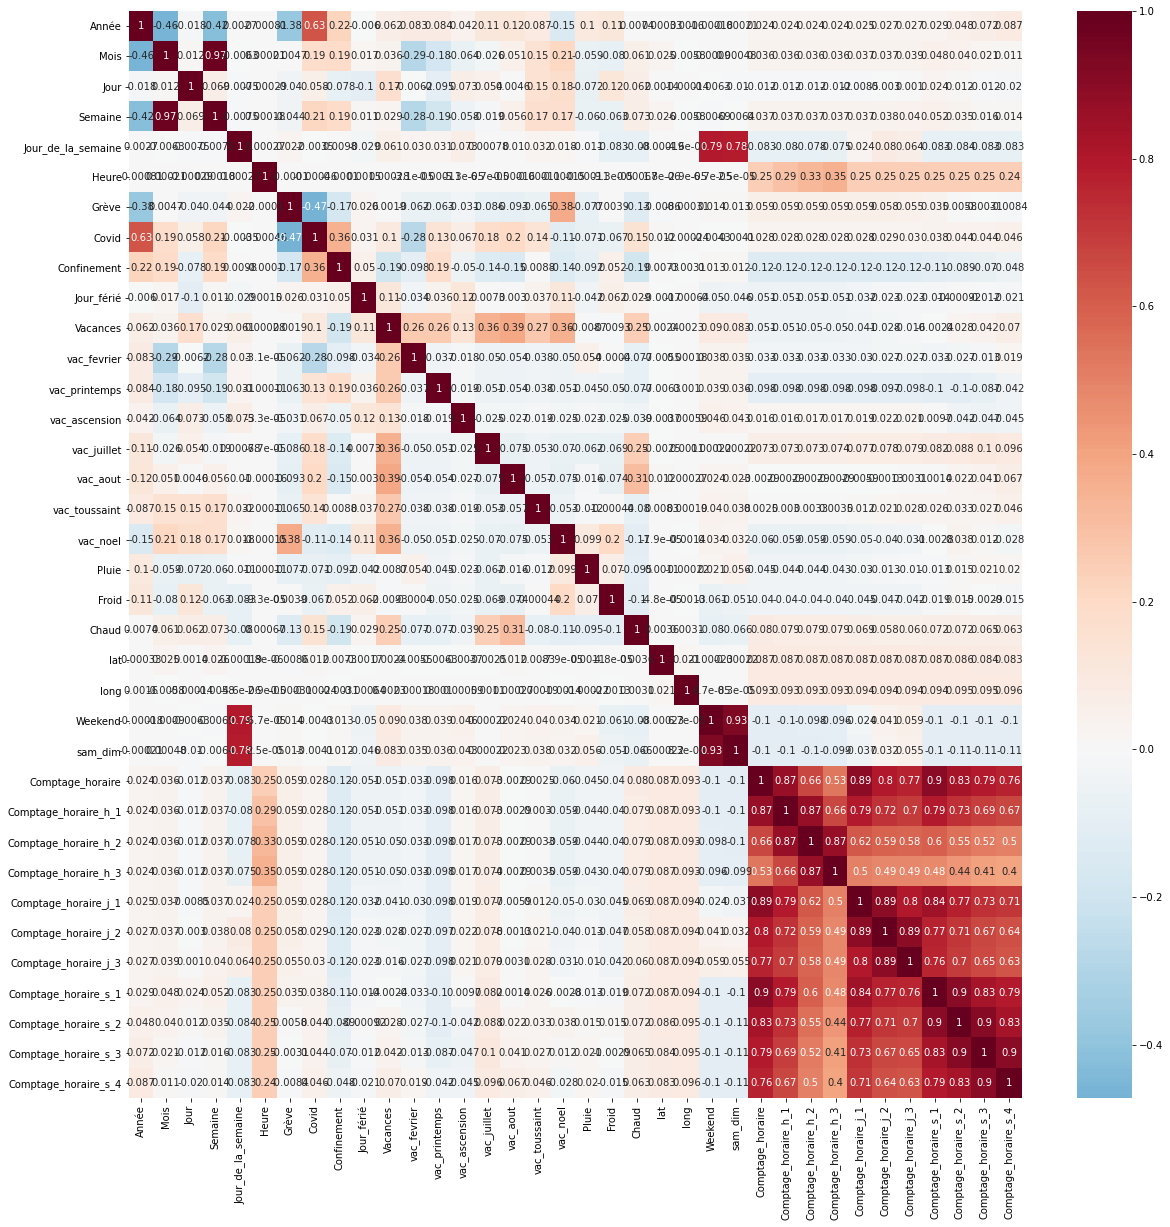

In [132]:
# heatmap des corrélations entre chaque paire de variables de df
plt.figure(figsize=(20,20))
sns.heatmap(df_ml.corr(), annot = True, cmap = "RdBu_r", center = 0);

>Comme nous le montre la heatmap, ce sont sans surprise les variables numériques créés qui sont le plus fortement corrélées avec la variable cible, dans cet ordre :
>- Comptage_horaire_semaine_1 : 0.95
>- Comptage_horaire_jour_1 : 0.89
>- Comptage_horaire_heure_1 : 0.87
>- Comptage_horaire_semaine_2 : 0.83
>- Comptage_horaire_jour_2 : 0.8
>- Comptage_horaire_semaine_3 : 0.79
>- Comptage_horaire_jour_3 : 0.77
>- Comptage_horaire_semaine_4 : 0.76
>- Comptage_horaire_heure_2 : 0.66
>- Comptage_horaire_heure_3 0.53
>
>Les autres variables ont une corrélation négligeable, le maximum étant de 0.25 pour Heure.
> A priori, nous ne retiendrons que les 10 variables numériques crées. Observons leur relations de linéarité.

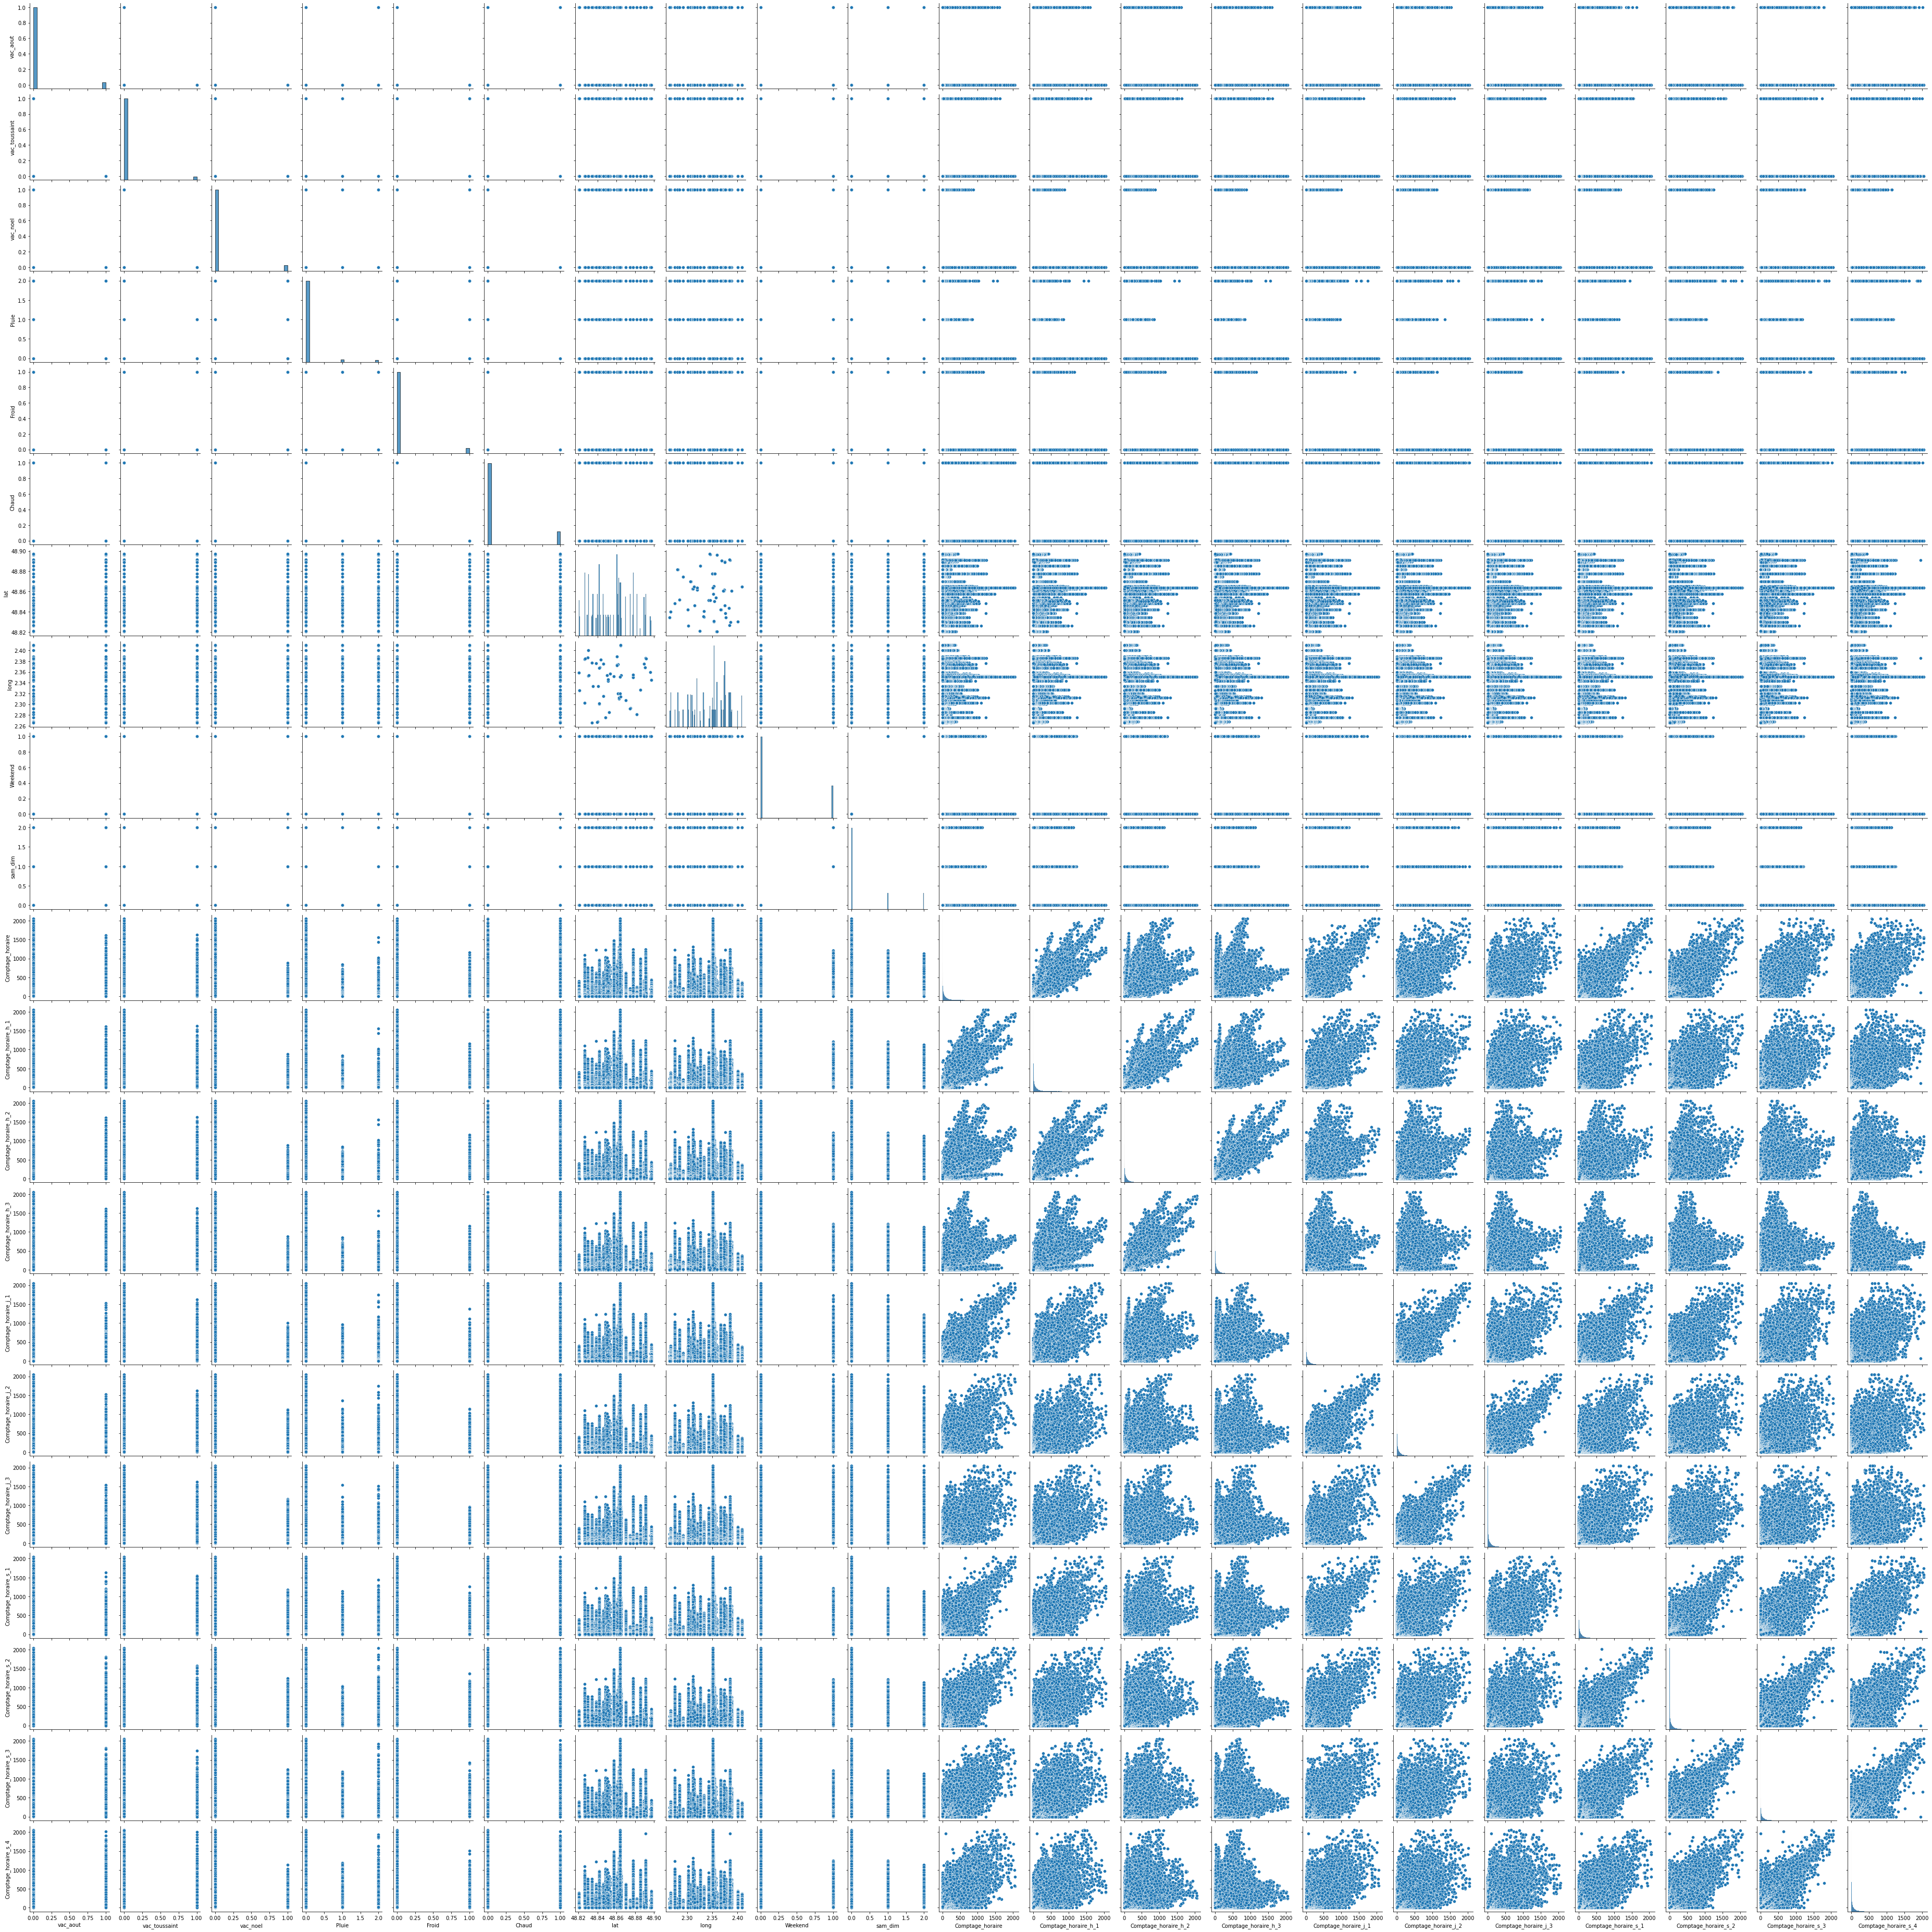

In [133]:
sns.pairplot(df_ml.iloc[:,18:]);

> Toutes les variables numériques créées ont une linéarité plus ou moins évidente avec la cible. Ce qui n’est pas étonnant vu qu’il s’agit de comptage horaire à différents moments.

# 4.4. Prédiction sur les derniers jours de chaque mois

>Nous commencerons par entraîner nos modèles sur le début de chaque mois (du 1er au 23) afin d’en prédire la fin (du 24 à la fin du mois) pour tous les mois d’octobre 2019 à décembre 2020. 

### 4.4.1. Définition de la taille de l'échantillon test

>Les étapes :
>- tri du df en fonction du jour
>- définition d'une variable '1er jour de l'échantillon test' (à corriger pour modifier la taille de l'échantillon)
>- calcul du % à prendre pour la taille de l'échantillon test 

In [134]:
# tri du df en fonction du jour
df_ml = df_ml.sort_values(by = ['Jour'])

In [135]:
# définition d'une variable 1er jour de l'échantillon test

jour_deb_test = 24       ### à corriger pour modifier la taille de l'échantillon test

In [136]:
##calcul du % à prendre pour la taille de l'échantillon test :

#nb de lignes df_ml
len_df_ml = len(df_ml)

#nb de lignes échantillon test
len_df_test = len(df_ml[df_ml["Jour"] >= jour_deb_test])

test_size = len_df_test / len_df_ml
print("taille échantillon de test = ", test_size)

taille échantillon de test =  0.24912519242867456


> Dans cet exemple : si on veut que l’échantillon test démarre le 24 du mois, il faut une taille de 0.249.

### 4.4.2. Choix des variables

>Nous gardons d’abord toutes les variables et créons les 2 échantillons ‘train’ et ‘test’. Pour confirmer notre avis sur le choix des variables, nous créons ensuite un modèle SelectKBest, qui va toutes les tester, avec pour paramètre k = 10. 

In [137]:
df_ml.columns

Index(['Date et heure de comptage', 'Identifiant du site de comptage',
       'Nom du site de comptage', 'Année', 'Mois', 'Jour', 'Semaine',
       'Jour_de_la_semaine', 'Heure', 'Grève', 'Covid', 'Confinement',
       'Jour_férié', 'Vacances', 'vac_fevrier', 'vac_printemps',
       'vac_ascension', 'vac_juillet', 'vac_aout', 'vac_toussaint', 'vac_noel',
       'Pluie', 'Froid', 'Chaud', 'lat', 'long', 'Weekend', 'sam_dim',
       'Comptage_horaire', 'Comptage_horaire_h_1', 'Comptage_horaire_h_2',
       'Comptage_horaire_h_3', 'Comptage_horaire_j_1', 'Comptage_horaire_j_2',
       'Comptage_horaire_j_3', 'Comptage_horaire_s_1', 'Comptage_horaire_s_2',
       'Comptage_horaire_s_3', 'Comptage_horaire_s_4'],
      dtype='object')

In [138]:
# création des ensembles 'train' et 'test'
data = df_ml.drop(columns = ['Comptage_horaire','Date et heure de comptage', 'Identifiant du site de comptage', 'Nom du site de comptage'])
target = df_ml['Comptage_horaire']
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = test_size, shuffle = False)

In [139]:
#Sélection des variables avec "SelectKBest"
from sklearn.feature_selection import SelectKBest, f_regression

sk = SelectKBest(f_regression, k=10)
sk.fit(data, target)

liste_var = data.columns[sk.get_support()].tolist()
liste_var

['Comptage_horaire_h_1',
 'Comptage_horaire_h_2',
 'Comptage_horaire_h_3',
 'Comptage_horaire_j_1',
 'Comptage_horaire_j_2',
 'Comptage_horaire_j_3',
 'Comptage_horaire_s_1',
 'Comptage_horaire_s_2',
 'Comptage_horaire_s_3',
 'Comptage_horaire_s_4']

>Sans surprise, il retient les 10 variables numériques créées, qui sont les plus corrélées. Dans les prochains tests nous allons donc les utiliser. Nous verrons ensuite si nous pouvons en éliminer certaines.

### 4.4.3. Création des échantillons 'train' et 'test'

In [140]:
data = df_ml[liste_var]
target = df_ml['Comptage_horaire']
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = test_size, shuffle = False)

### 4.4.4. Choix du modèle

In [141]:
# Modèles à tester
lr = LinearRegression()
rid = RidgeCV(alphas = (0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100))
las = LassoCV(alphas = (0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100))
en = ElasticNet()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor(n_estimators = 10, criterion = 'mse')
br = BaggingRegressor(n_estimators = 10)
gbr = GradientBoostingRegressor(n_estimators = 100)

#création de 2 listes avec les modèles à tester et leur nom :
modeles = [lr, rid, las, en, dtr, rfr, br, gbr]
noms_modeles =["LinearRegression",
               "RidgeCV",
               "LassoCV",
               "ElasticNet",
               "DecisionTreeRegressor",
               "RandomForestRegressor",
               "BaggingRegressor",
               "GradientBoostingRegressor"]

#Pour chaque modèle afficher le score R² et la rmse : 
for modele, nom in zip(modeles, noms_modeles):
    modele.fit(X_train, y_train)
    pred_train = modele.predict(X_train)
    pred_test = modele.predict(X_test)
    print(nom, " :")
    print("score R² train = ", modele.score(X_train, y_train), " / score R² test = ", modele.score(X_test, y_test))
    print("rmse train = ", np.sqrt(mean_squared_error(y_train, pred_train)), " / rmse test = ", np.sqrt(mean_squared_error(y_test, pred_test)))
    print("\n")

LinearRegression  :
score R² train =  0.9189962817909223  / score R² test =  0.9057989819099553
rmse train =  34.1936822450065  / rmse test =  33.67896824669544


RidgeCV  :
score R² train =  0.9189962817907562  / score R² test =  0.9057989410484892
rmse train =  34.19368224504155  / rmse test =  33.678975551138116


LassoCV  :
score R² train =  0.9189958645588665  / score R² test =  0.9057879540708657
rmse train =  34.193770306902195  / rmse test =  33.68093953841201


ElasticNet  :
score R² train =  0.918996111843483  / score R² test =  0.9057894981011904
rmse train =  34.19371811450619  / rmse test =  33.68066354076981


DecisionTreeRegressor  :
score R² train =  0.9999206586740267  / score R² test =  0.8751642421831992
rmse train =  1.070146219486386  / rmse test =  38.77041780760767


RandomForestRegressor  :
score R² train =  0.9912993398047326  / score R² test =  0.9294981421354598
rmse train =  11.206487170291453  / rmse test =  29.136089399786428


BaggingRegressor  :
score R²

>Le modèle le plus robuste, c’est-à-dire qui overfitte le moins, et qui prend le moins de temps de calcul est tout simplement la Régression Linéaire :
>- R² train/test : 0.92 / 0.91
>- RMSE train/test : 34.2 / 33.7

### 4.4.5. Test sur les variables optimales

>Avec une régression linéaire, nous pouvons utiliser ‘SelectFromModel’ pour voir s’il nous propose de réduire le nombre de variables.

In [142]:
#Sélection des variables avec "SelectFromModel" sur la base d'une régression linéaire "LinearRegression"
lr_var_opt = LinearRegression()
sfm = SelectFromModel(lr_var_opt)

sfm_train = sfm.fit(X_train, y_train)
sfm_test = sfm.transform(X_test)

liste_var = data.columns[sfm.get_support()]
liste_var

Index(['Comptage_horaire_h_1', 'Comptage_horaire_h_2', 'Comptage_horaire_j_1',
       'Comptage_horaire_s_1'],
      dtype='object')

>Résultats : 'Comptage_horaire_h_1', 'Comptage_horaire_h_2', 'Comptage_horaire_j_1', 'Comptage_horaire_s_1'\
>Nous retentons la RL avec ces 4 variables.

In [143]:
data = df_ml[liste_var]
target = df_ml['Comptage_horaire']
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = test_size, shuffle = False)

In [144]:
lr_var_opt.fit(X_train, y_train)
pred_train = lr_var_opt.predict(X_train)
pred_test = lr_var_opt.predict(X_test)
print("score R² train = ", lr_var_opt.score(X_train, y_train), " / score R² test = ", lr_var_opt.score(X_test, y_test))
print("rmse train = ", np.sqrt(mean_squared_error(y_train, pred_train)), " / rmse test = ", np.sqrt(mean_squared_error(y_test, pred_test)))

score R² train =  0.9136878857218648  / score R² test =  0.8996554739364788
rmse train =  35.296307311873264  / rmse test =  34.75984436314168


> Ca n’améliore pas le modèle, nous les gardons toutes.

### 4.4.6. Représentation graphique des prédictions

> On définit des variables à remplir pour les prédictions : année, mois, identifiant_site. Il ne reste qu’à remplir ces champs pour afficher les prédictions de n’importe quel site (ou tous) pour un mois donné. On propose ensuite 2 graphiques : un à l’échelle du mois avec comptage journalier, l’autre à l’échelle de la dernière semaine avec un comptage horaire.

In [145]:
#lr.fit(X_train, y_train)
liste_var = ['Comptage_horaire_h_1',
             'Comptage_horaire_h_2',
            'Comptage_horaire_h_3',
             'Comptage_horaire_j_1',
             'Comptage_horaire_j_2',
             'Comptage_horaire_j_3',
             'Comptage_horaire_s_1',
             'Comptage_horaire_s_2',
             'Comptage_horaire_s_3',
             'Comptage_horaire_s_4']
data = df_ml[liste_var]
target = df_ml['Comptage_horaire']
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = test_size, shuffle = False)
best_model_train = lr.predict(X_train)
best_model_test = lr.predict(X_test)

In [146]:
#lr.fit(X_train, y_train)
best_model_train = lr.predict(X_train)
best_model_test = lr.predict(X_test)

In [147]:
# Définition des variables à remplir pour les prédictions :

mois = 11                             # saisir le mois
année = 2020                         # saisir l'année
identifiant_site = '100049407'       # saisir un identifiant ou tous_les_sites

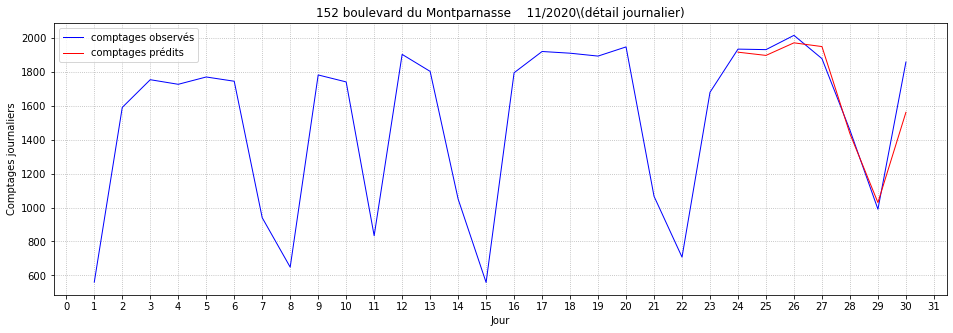

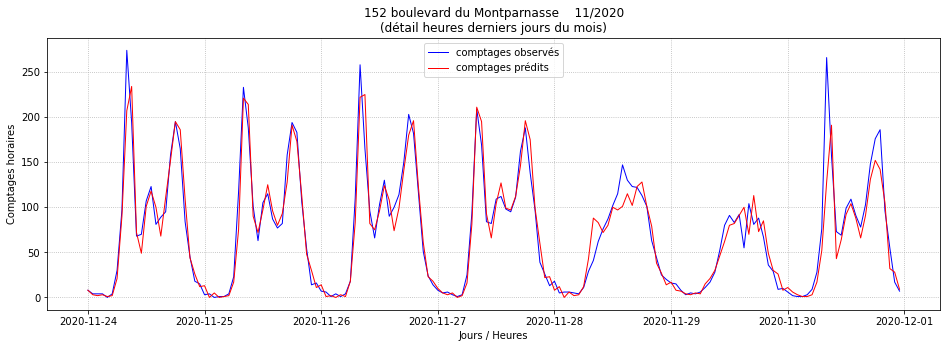

In [148]:
# graphe mensuel détail jours
df_test = pd.DataFrame({'Comptages_prédits' : best_model_test.round(0).astype('int32')}, index = X_test.index)
df_pred = df_ml.join(df_test)

df_graphe = df_pred[(df_pred["Mois"] == mois) &
                    
                    (df_pred["Année"] == année) &
                    (df_pred["Identifiant du site de comptage"] == identifiant_site)]

df_graphe = df_graphe.groupby(['Jour','Identifiant du site de comptage','Nom du site de comptage'],
                              as_index = False).agg({'Comptage_horaire':'sum', 'Comptages_prédits':'sum'})

titre = str(df_graphe['Nom du site de comptage'][0]) + "    " + str(mois) + "/" + str(année) + "\(détail journalier)"

plt.figure(figsize = (16, 5))
plt.plot(df_graphe['Jour'], df_graphe['Comptage_horaire'], label= "comptages observés", color ="blue", lw = 1)
plt.plot(df_graphe['Jour'][df_graphe['Jour'] >= jour_deb_test],
            df_graphe['Comptages_prédits'][df_graphe['Jour'] >= jour_deb_test],
            color = "red",
            label= "comptages prédits",
            lw = 1)
plt.xlabel("Jour")
plt.ylabel("Comptages journaliers")
plt.xticks(np.arange(0, 32, 1))
plt.title(titre)
plt.grid(True, linestyle = ':')
plt.legend();

###################################################################

# graphe derniers jours du mois détail heures
df_graphe_h = df_pred[(df_pred["Mois"] == mois) &
                     (df_pred["Année"] == année) &
                     (df_pred["Identifiant du site de comptage"] == identifiant_site)]

df_graphe_h = df_graphe_h.groupby(['Date et heure de comptage','Identifiant du site de comptage',
                               'Jour','Nom du site de comptage'], as_index = False).agg({'Comptage_horaire':'sum', 'Comptages_prédits':'sum'})

titre = str(df_graphe_h['Nom du site de comptage'][0]) + "    " + str(mois) + "/" + str(année) + "\n(détail heures derniers jours du mois)"

plt.figure(figsize = (16, 5))
plt.plot(df_graphe_h['Date et heure de comptage'][df_graphe_h['Jour'] >= jour_deb_test],
         df_graphe_h['Comptage_horaire'][df_graphe_h['Jour'] >= jour_deb_test],
         label= "comptages observés",
         color ="blue", lw = 1)
plt.plot(df_graphe_h['Date et heure de comptage'][df_graphe_h['Jour'] >= jour_deb_test],
            df_graphe_h['Comptages_prédits'][df_graphe_h['Jour'] >= jour_deb_test],
            color = "red",
            label= "comptages prédits",
            lw = 1)
plt.xlabel("Jours / Heures")
plt.ylabel("Comptages horaires")

plt.title(titre)
plt.grid(True, linestyle = ':')
plt.legend();

 > RESULTATS SUR QUELQUES EXEMPLES
 > - Pour  le site du 152 bd Montparnasse ('100049407') en novembre 2020 : Dans cet exemple, les prédictions sont très justes, autant à l’heure qu’à la journée. 
 > - Mais qu’en est-il pour l’un des sites les plus fréquentés : 73 boulevard Sébastopol (‘100057445’), toujours en novembre ? Les prédictions à l’heure sont toujours fiables. A la journée l’écart se prononce un peu, car les erreurs s’accumulent.
 > - Et le même site en décembre ? Le modèle prédit toujours très bien le comptage à l’heure. La surestimation du début de semaine est due aux fêtes de Noël, dont nous connaissons maintenant l’importance.
 > - Qu’en est-il pour les sites créés en cours d’année, comme le 90 rue de Sèvres ( '100060178') en juillet 2020 ? Même sans l’historique sur les 3 premières semaines, le modèle se trompe un peu en début de semaine. Pour la fin juillet, c’est encore sûrement un effet des vacances.
> 
> 
 > CONCLUSION 1ER MODELE
 >
 > Les comptages horaires sont très fiables. Le modèle comprend bien les tendances quotidiennes et hebdomadaires, mais est sensible aux imprévus comme les vacances. Or, nous avons vu dans la partie Data Viz l’importance qu’elles ont sur le trafic (- 57%). 
>
> Entraînons maintenant notre modèle sur une année complète (octobre 2019 - novembre 2020) pour prédire les 3 derniers (octobre - décembre 2020).

## 4.5. Prédiction sur les 3 derniers mois

### 4.5.1. Définition de la taille de l'échantillon test

> On définit la taille de l’échantillon ‘test’ selon le mois à partir duquel on veut prédire. Ici, novembre 2020.

In [149]:
# tri du df en fonction du mois
df_ml = df_ml.sort_values(by = ['Année', 'Mois', 'Jour'])

In [150]:
# définition d'une variable 1er mois de l'échantillon test

mois_deb_test = 10       ### à corriger pour modifier la taille de l'échantillon test
année_deb_test = 2020    ### à corriger pour modifier la taille de l'échantillon test

In [151]:
##calcul du % à prendre pour la taille de l'échantillon test :

#nb de lignes df_ml
len_df_ml = len(df_ml)

#nb de lignes échantillon test
len_df_test2 = len(df_ml[(df_ml["Mois"] >= mois_deb_test) & (df_ml["Année"] >= année_deb_test)])

test_size2 = len_df_test2 / len_df_ml
print("taille échantillon de test = ", test_size2)

taille échantillon de test =  0.21896861129552694


### 4.5.2. Création des échantillons d'entraînement et de test

In [152]:
# création des ensembles 'train' et 'test'
data2 = df_ml[['Comptage_horaire_h_1',
               'Comptage_horaire_h_2',
               'Comptage_horaire_h_3',
               'Comptage_horaire_j_1',
               'Comptage_horaire_j_2',
               'Comptage_horaire_j_3',
               'Comptage_horaire_s_1',
               'Comptage_horaire_s_2',
               'Comptage_horaire_s_3',
               'Comptage_horaire_s_4']]
target2 = df_ml['Comptage_horaire']
X_train2, X_test2, y_train2, y_test2 = train_test_split(data2, target2, test_size = test_size2, shuffle = False)

### 4.5.3. 2e modèle et évaluation

In [153]:
lr2 = LinearRegression()
lr2.fit(X_train2, y_train2)
pred_train2 = lr2.predict(X_train2)
pred_test2 = lr2.predict(X_test2)
print("score R² train = ", lr2.score(X_train2, y_train2), " / score R² test = ", lr2.score(X_test2, y_test2))
print("rmse train = ", np.sqrt(mean_squared_error(y_train2, pred_train2)), " / rmse test = ", np.sqrt(mean_squared_error(y_test2, pred_test2)))

score R² train =  0.9178091398730881  / score R² test =  0.9097949874993712
rmse train =  34.52460875491912  / rmse test =  32.16153914689707


> Scores sur les 3 derniers mois : R² train/test =  0.92 / 0.91 - rmse train/test =  34.5 / 32.2
>
> (Scores sur les derniers jours : R² train/test : 0.92 / 0.91 - rmse train/test : 34.2 / 33.7)
>
> Le nouveau modèle est presqu'aussi performant que le précédent, avec un écart un peu plus important sur les erreurs.

### 4.5.4. Représentation graphique des prédictions

### Octobre 2020

In [154]:
#lr2.fit(X_train2, y_train2)
best_model_train2 = lr2.predict(X_train2)
best_model_test2 = lr2.predict(X_test2)

In [155]:
#Définition des variables pour représenter les prévisions :

mois = 10                             # saisir le mois
année = 2020                         # saisir l'année
identifiant_site = '100049407'      # saisir un identifiant ou tous_les_sites

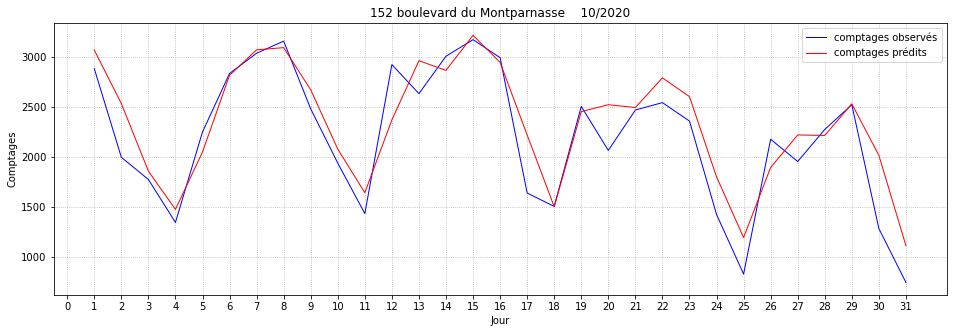

In [156]:
df_test2 = pd.DataFrame({'Comptages_prédits' : best_model_test2.round(0).astype('int32')}, index = X_test2.index)
df_pred2 = df_ml.join(df_test2)

df_graphe2 = df_pred2[(df_pred2["Mois"] == mois) &
                    (df_pred2["Année"] == année) &
                    (df_pred2["Identifiant du site de comptage"] == identifiant_site)]

df_graphe2 = df_graphe2.groupby(['Jour','Identifiant du site de comptage','Nom du site de comptage'],
                              as_index = False).agg({'Comptage_horaire':'sum', 'Comptages_prédits':'sum'})

titre2 = str(df_graphe2['Nom du site de comptage'][0]) + "    " + str(mois) + "/" + str(année)

plt.figure(figsize = (16, 5))
plt.plot(df_graphe2['Jour'], df_graphe2['Comptage_horaire'], label= "comptages observés", color ="blue", lw = 1)
plt.plot(df_graphe2['Jour'],df_graphe2['Comptages_prédits'],
                              color = "red",
                              label= "comptages prédits",
                              lw = 1)
plt.xlabel("Jour")
plt.ylabel("Comptages")
plt.xticks(np.arange(0, 32, 1))
plt.title(titre2)
plt.grid(True, linestyle = ':')
plt.legend();

### Novembre 2020

In [157]:
#Définition des variables pour représenter les prévisions :

mois = 11                             # saisir le mois
année = 2020                         # saisir l'année
identifiant_site = '100049407'      # saisir un identifiant ou tous_les_sites

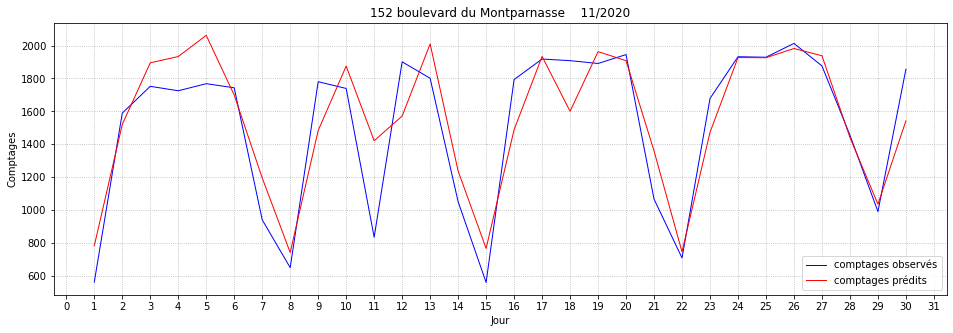

In [158]:
df_test2 = pd.DataFrame({'Comptages_prédits' : best_model_test2.round(0).astype('int32')}, index = X_test2.index)
df_pred2 = df_ml.join(df_test2)

df_graphe2 = df_pred2[(df_pred2["Mois"] == mois) &
                    (df_pred2["Année"] == année) &
                    (df_pred2["Identifiant du site de comptage"] == identifiant_site)]

df_graphe2 = df_graphe2.groupby(['Jour','Identifiant du site de comptage','Nom du site de comptage'],
                              as_index = False).agg({'Comptage_horaire':'sum', 'Comptages_prédits':'sum'})

titre2 = str(df_graphe2['Nom du site de comptage'][0]) + "    " + str(mois) + "/" + str(année)

plt.figure(figsize = (16, 5))
plt.plot(df_graphe2['Jour'], df_graphe2['Comptage_horaire'], label= "comptages observés", color ="blue", lw = 1)
plt.plot(df_graphe2['Jour'],df_graphe2['Comptages_prédits'],
                              color = "red",
                              label= "comptages prédits",
                              lw = 1)
plt.xlabel("Jour")
plt.ylabel("Comptages")
plt.xticks(np.arange(0, 32, 1))
plt.title(titre2)
plt.grid(True, linestyle = ':')
plt.legend();

### Décembre 2020

In [159]:
#Définition des variables pour représenter les prévisions :

mois = 12                             # saisir le mois
année = 2020                         # saisir l'année
identifiant_site = '100049407'      # saisir un identifiant ou tous_les_sites

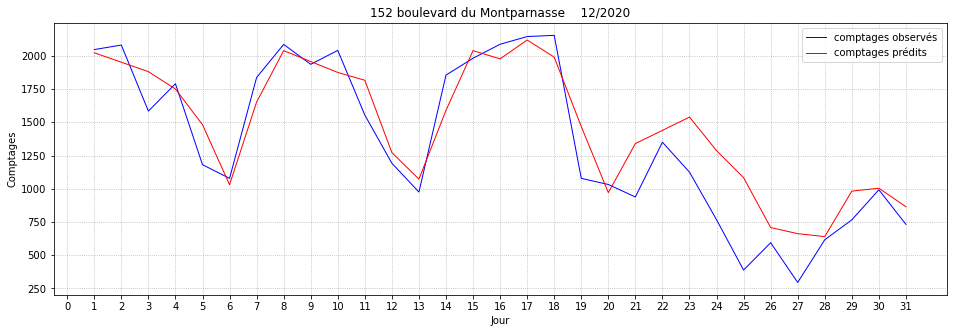

In [160]:
df_test2 = pd.DataFrame({'Comptages_prédits' : best_model_test2.round(0).astype('int32')}, index = X_test2.index)
df_pred2 = df_ml.join(df_test2)

df_graphe2 = df_pred2[(df_pred2["Mois"] == mois) &
                    (df_pred2["Année"] == année) &
                    (df_pred2["Identifiant du site de comptage"] == identifiant_site)]

df_graphe2 = df_graphe2.groupby(['Jour','Identifiant du site de comptage','Nom du site de comptage'],
                              as_index = False).agg({'Comptage_horaire':'sum', 'Comptages_prédits':'sum'})

titre2 = str(df_graphe2['Nom du site de comptage'][0]) + "    " + str(mois) + "/" + str(année)

plt.figure(figsize = (16, 5))
plt.plot(df_graphe2['Jour'], df_graphe2['Comptage_horaire'], label= "comptages observés", color ="blue", lw = 1)
plt.plot(df_graphe2['Jour'],df_graphe2['Comptages_prédits'],
                              color = "red",
                              label= "comptages prédits",
                              lw = 1)
plt.xlabel("Jour")
plt.ylabel("Comptages")
plt.xticks(np.arange(0, 32, 1))
plt.title(titre2)
plt.grid(True, linestyle = ':')
plt.legend();

> CONCLUSION 2E MODELE
>
> Les prédictions sur les derniers mois sont très fiables. Encore une fois, c’est sur la période de Noël que le modèle surestime le trafic. Nous allons donc rajouter des variables catégorielles liées aux événements récurrents (vacances, jours fériés etc.) ou exceptionnels (grève, confinement etc.) pour voir si cela l’aide à s’ajuster.

### 4.5.4. Ajout de variables catégorielles

> Après plusieurs essais que nous n'avons pas laissés ici, les prédictions les plus justes se font avec l’ajout des variables : vac_noel, jours_fériés, jour_de_la_semaine.

In [161]:
# création des ensembles 'train' et 'test'
data3 = df_ml[['Jour_de_la_semaine', 
               'Jour_férié',  'vac_noel',
               'Comptage_horaire_h_1',
               'Comptage_horaire_h_2',
               'Comptage_horaire_h_3',
               'Comptage_horaire_j_1',
               'Comptage_horaire_j_2',
               'Comptage_horaire_j_3',
               'Comptage_horaire_s_1',
               'Comptage_horaire_s_2',
               'Comptage_horaire_s_3',
               'Comptage_horaire_s_4']]
target3 = df_ml['Comptage_horaire']
X_train3, X_test3, y_train3, y_test3 = train_test_split(data3, target3, test_size = test_size2, shuffle = False)

### 4.5.5. 3e modèle et évaluation

In [162]:
lr3 = LinearRegression()
lr3.fit(X_train3, y_train3)
pred_train3 = lr3.predict(X_train3)
pred_test3 = lr3.predict(X_test3)
print("score R² train = ", lr3.score(X_train3, y_train3), " / score R² test = ", lr3.score(X_test3, y_test3))
print("rmse train = ", np.sqrt(mean_squared_error(y_train3, pred_train3)), " / rmse test = ", np.sqrt(mean_squared_error(y_test3, pred_test3)))

score R² train =  0.9192226251595906  / score R² test =  0.9126023122466356
rmse train =  34.22645114367518  / rmse test =  31.657124222194707


>Scores sur les derniers mois avec les variables numériques  + catégorielles: R² train/test =  0.92  /  0.91 - rmse train/test =  34.2  /  31.7 
>
>(Scores sur les derniers mois avec les seules variables numériques : R² train/test =  0.92  /  0.91 - rmse train/test =  34.5  /  32.2)
>
> Les performances se valent. Regardons s’il y a une différence dans la représentation graphique du mois de décembre 2020.

### 4.5.6. Décembre 2020

In [163]:
#lr3.fit(X_train3, y_train3)
best_model_train3 = lr3.predict(X_train3)
best_model_test3 = lr3.predict(X_test3)

In [164]:
#Définition des variables pour représenter les prévisions :

mois = 12                             # saisir le mois
année = 2020                         # saisir l'année
identifiant_site = '100049407'      # saisir un identifiant ou tous_les_sites

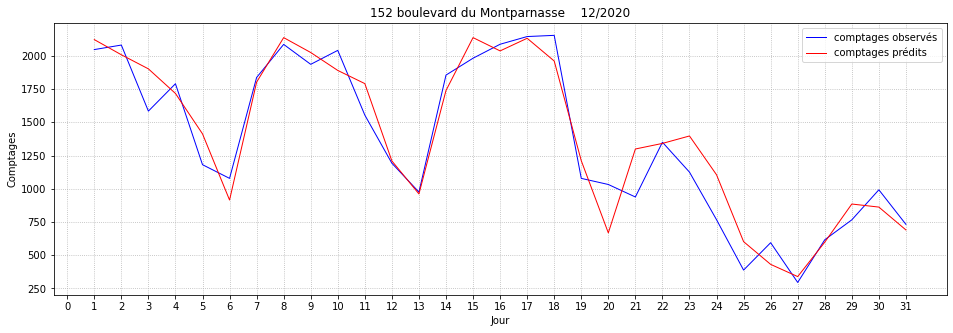

In [165]:
df_test3 = pd.DataFrame({'Comptages_prédits' : best_model_test3.round(0).astype('int32')}, index = X_test3.index)
df_pred3 = df_ml.join(df_test3)

df_graphe3 = df_pred3[(df_pred3["Mois"] == mois) &
                    (df_pred3["Année"] == année) &
                    (df_pred3["Identifiant du site de comptage"] == identifiant_site)]

df_graphe3 = df_graphe3.groupby(['Jour','Identifiant du site de comptage','Nom du site de comptage'],
                              as_index = False).agg({'Comptage_horaire':'sum', 'Comptages_prédits':'sum'})

titre3 = str(df_graphe3['Nom du site de comptage'][0]) + "    " + str(mois) + "/" + str(année)

plt.figure(figsize = (16, 5))
plt.plot(df_graphe3['Jour'], df_graphe3['Comptage_horaire'], label= "comptages observés", color ="blue", lw = 1)
plt.plot(df_graphe3['Jour'],df_graphe3['Comptages_prédits'],
                              color = "red",
                              label= "comptages prédits",
                              lw = 1)
plt.xlabel("Jour")
plt.ylabel("Comptages")
plt.xticks(np.arange(0, 32, 1))
plt.title(titre3)
plt.grid(True, linestyle = ':')
plt.legend();

> CONCLUSION 3E MODELE
>
> Pour décembre 2020, l’ajout des variables catégorielles liées aux vacances de Noël, jours fériés et jours de la semaine corrigent les erreurs. Sur les 3 derniers mois de l’année, les prédictions sont très justes.\
>
> L’étape suivante serait de tester des modèles permettant de faire des prévisions, comme les Réseaux de neurones par exemple.